# Loading Packages

In [1]:
# Set working directory to the default path
setwd("/content")

# Function to install packages with error handling
install_packages <- function(package, depth = 0) {
  if (depth > 10) { # To prevent infinite recursion
    cat("Maximum recursion depth reached for package:", package, "\n")
    return(FALSE)
  }
  success <- TRUE
  tryCatch({
    install.packages(package)
    cat(package, "installed successfully.\n")
  }, error = function(e) {
    success <- FALSE
    cat("Error installing", package, ":", e$message, "\n")

    # Parse the error message to find missing dependencies
    missing_deps <- unique(stringr::str_match_all(e$message, "package ‘(.*?)’")[[1]][,2])
    if (length(missing_deps) > 0) {
      cat("Missing dependencies for", package, ":", paste(missing_deps, collapse = ", "), "\n")
      # Install missing dependencies
      dep_success <- sapply(missing_deps, function(dep) install_packages(dep, depth + 1))

      # Re-try installing the original package with dependencies
      if (all(dep_success)) {
        tryCatch({
          install.packages(package, dependencies = TRUE)
          cat(package, "installed successfully after installing missing dependencies.\n")
          success <- TRUE
        }, error = function(e) {
          cat("Error re-installing", package, "after installing dependencies:", e$message, "\n")
          success <- FALSE
        })
      }
    }
  })
  return(success)
}

# Function to install special packages with error handling
install_special_package <- function(package, depth = 0) {
  if (depth > 10) { # To prevent infinite recursion
    cat("Maximum recursion depth reached for package:", package, "\n")
    return(FALSE)
  }
  success <- TRUE
  tryCatch({
    remotes::install_github(package)
    cat(package, "installed successfully.\n")
  }, error = function(e) {
    success <- FALSE
    cat("Error installing", package, ":", e$message, "\n")

    # Parse the error message to find missing dependencies
    missing_deps <- unique(stringr::str_match_all(e$message, "package ‘(.*?)’")[[1]][,2])
    if (length(missing_deps) > 0) {
      cat("Missing dependencies for", package, ":", paste(missing_deps, collapse = ", "), "\n")
      # Install missing dependencies
      dep_success <- sapply(missing_deps, function(dep) install_packages(dep, depth + 1))

      # Re-try installing the original package with dependencies
      if (all(dep_success)) {
        tryCatch({
          remotes::install_github(package, dependencies = TRUE)
          cat(package, "installed successfully after installing missing dependencies.\n")
          success <- TRUE
        }, error = function(e) {
          cat("Error re-installing", package, "after installing dependencies:", e$message, "\n")
          success <- FALSE
        })
      }
    }
  })
  return(success)
}

# Ensure system dependencies are installed
cat("Updating system dependencies...\n")
system("apt-get update", intern = TRUE)
system("apt-get install -y build-essential cmake g++ binutils", intern = TRUE)
cat("System dependencies installed.\n")

# Install remotes package
cat("Installing remotes package...\n")
install.packages("remotes")
library(remotes)
cat("Remotes package installed.\n")

# List of primary packages to install
packages <- c("httpuv", "xtable", "tidyverse", "sourcetools", "later",
              "promises", "shiny", "downlit", "rmarkdown", "htmlwidgets",
              "miniUI", "pkgdown", "profvis", "urlchecker", "ggplot2",
              "posterior", "bayesplot", "broom.mixed", "brms", "lme4")

# Install primary packages
cat("Installing primary packages...\n")
sapply(packages, function(pkg) {
  if (!install_packages(pkg)) {
    cat("Failed to install package:", pkg, "\n")
  }
})
cat("Primary packages installed.\n")

# Install special packages
cat("Installing special packages...\n")
special_packages <- c("GeoBosh/rbibutils", "GeoBosh/Rdpack", "venpopov/chkptstanr")
sapply(special_packages, function(pkg) {
  if (!install_special_package(pkg)) {
    cat("Failed to install special package:", pkg, "\n")
  }
})
cat("Special packages installed.\n")

# Install rstan
cat("Installing rstan...\n")
tryCatch({
  install.packages("rstan", repos = c('https://stan-dev.r-universe.dev', getOption("repos")))
  cat("rstan installed successfully.\n")
}, error = function(e) {
  cat("Failed to install/update rstan. Error:", e$message, "\n")
})

# Load all packages
cat("Loading all installed packages...\n")
sapply(packages, function(pkg) {
  tryCatch({
    library(pkg, character.only = TRUE)
    cat(pkg, "loaded successfully.\n")
  }, error = function(e) {
    cat("Failed to load package:", pkg, "Error:", e$message, "\n")
  })
})

# Load special packages
sapply(basename(special_packages), function(pkg) {
  tryCatch({
    library(pkg, character.only = TRUE)
    cat(pkg, "loaded successfully.\n")
  }, error = function(e) {
    cat("Failed to load package:", pkg, "Error:", e$message, "\n")
  })
})

# Load rstan
tryCatch({
  library(rstan)
  cat("rstan package loaded successfully.\n")
}, error = function(e) {
  cat("Failed to load rstan. Error:", e$message, "\n")
})

# Install and load cmdstanr
cat("Installing cmdstanr package...\n")
tryCatch({
  install.packages("cmdstanr", repos = c('https://stan-dev.r-universe.dev', getOption("repos")))
  cat("cmdstanr package installed.\n")
}, error = function(e) {
  cat("Failed to install cmdstanr. Error:", e$message, "\n")
})

# Load cmdstanr and install CmdStan
tryCatch({
  library(cmdstanr)
  cmdstanr::check_cmdstan_toolchain()
  cmdstanr::install_cmdstan(cores = 2)
  cat("CmdStan installed.\n")
  cmdstan_path()
  cmdstan_version()
  cat("cmdstanr setup complete.\n")
}, error = function(e) {
  cat("Failed to load/install CmdStan. Error:", e$message, "\n")
})

Updating system dependencies...


[1] "Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]"                 
 [2] "Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]"
 [3] "Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [973 kB]"  
 [4] "Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease"                                               
 [5] "Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]"                              
 [6] "Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]"                            
 [7] "Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease"                   
 [8] "Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]"               
 [9] "Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease"                   
[10] "Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]"                           
[11] "Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease"                         
[12] "Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,994 kB]"               
[13] "Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [2,664 kB]"           
[14] "Get:14 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 Packages [27.8 kB]"    
[15] "Get:15 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,258 kB]"                 
[16] "Get:16 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,125 kB]"           
[17] "Get:17 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,409 kB]"             
[18] "Get:18 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [2,591 kB]"         
[19] "Fetched 13.4 MB in 3s (3,909 kB/s)"                                                                   
[20] "Reading package lists..."

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "build-essential is already the newest version (12.9ubuntu3)."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [5] "g++ is already the newest version (4:11.2.0-1ubuntu1)."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
 [6] "g++ set to manually installed."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
 [7] "cmake is already the newest version (3.22.1-1ubuntu1.22.04.2)."                                                        

System dependencies installed.
Installing remotes package...


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Remotes package installed.
Installing primary packages...


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘later’, ‘promises’, ‘Rcpp’




httpuv installed successfully.


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



xtable installed successfully.


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



tidyverse installed successfully.


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



sourcetools installed successfully.


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



later installed successfully.


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



promises installed successfully.


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



shiny installed successfully.


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



downlit installed successfully.


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



rmarkdown installed successfully.


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



htmlwidgets installed successfully.


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



miniUI installed successfully.


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



pkgdown installed successfully.


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



profvis installed successfully.


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



urlchecker installed successfully.


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



ggplot2 installed successfully.


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘abind’, ‘checkmate’, ‘tensorA’, ‘distributional’, ‘matrixStats’




posterior installed successfully.


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘ggridges’, ‘reshape2’




bayesplot installed successfully.


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘coda’, ‘furrr’




broom.mixed installed successfully.


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘StanHeaders’, ‘inline’, ‘gridExtra’, ‘RcppParallel’, ‘QuickJSR’, ‘RcppEigen’, ‘BH’, ‘mvtnorm’, ‘Brobdingnag’, ‘rstan’, ‘loo’, ‘rstantools’, ‘bridgesampling’, ‘future.apply’, ‘nleqslv’




brms installed successfully.


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘minqa’, ‘nloptr’




lme4 installed successfully.


$httpuv
NULL

$xtable
NULL

$tidyverse
NULL

$sourcetools
NULL

$later
NULL

$promises
NULL

$shiny
NULL

$downlit
NULL

$rmarkdown
NULL

$htmlwidgets
NULL

$miniUI
NULL

$pkgdown
NULL

$profvis
NULL

$urlchecker
NULL

$ggplot2
NULL

$posterior
NULL

$bayesplot
NULL

$broom.mixed
NULL

$brms
NULL

$lme4
NULL

Primary packages installed.
Installing special packages...


── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpCy8r5q/remotesc1f14f28875/GeoBosh-rbibutils-b456ae1/DESCRIPTION’ ... OK
* preparing ‘rbibutils’:
* checking DESCRIPTION meta-information ... OK
* cleaning src
* installing the package to process help pages
* saving partial Rd database
* cleaning src
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘rbibutils_2.2.16.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



GeoBosh/rbibutils installed successfully.



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpCy8r5q/remotesc1f6c38a7a7/GeoBosh-Rdpack-6334cf1/DESCRIPTION’ ... OK
* preparing ‘Rdpack’:
* checking DESCRIPTION meta-information ... OK
* installing the package to process help pages
Loading required package: Rdpack
* saving partial Rd database
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘Rdpack_2.6.9000.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



GeoBosh/Rdpack installed successfully.


rlang      (1.1.3  -> 1.1.4 ) [CRAN]
cli        (3.6.2  -> 3.6.3 ) [CRAN]
crayon     (1.5.2  -> 1.5.3 ) [CRAN]
munsell    (0.5.0  -> 0.5.1 ) [CRAN]
farver     (2.1.1  -> 2.1.2 ) [CRAN]
isoband    (0.2.6  -> 0.2.7 ) [CRAN]
gtable     (0.3.4  -> 0.3.5 ) [CRAN]
ps         (1.7.6  -> 1.7.7 ) [CRAN]
processx   (3.8.3  -> 3.8.4 ) [CRAN]
callr      (3.7.3  -> 3.7.6 ) [CRAN]
backports  (1.4.1  -> 1.5.0 ) [CRAN]
digest     (0.6.34 -> 0.6.36) [CRAN]
stringi    (1.8.3  -> 1.8.4 ) [CRAN]
tidyselect (1.2.0  -> 1.2.1 ) [CRAN]
pkgbuild   (1.4.3  -> 1.4.4 ) [CRAN]
fs         (1.6.3  -> 1.6.4 ) [CRAN]


Installing 16 packages: rlang, cli, crayon, munsell, farver, isoband, gtable, ps, processx, callr, backports, digest, stringi, tidyselect, pkgbuild, fs

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpCy8r5q/remotesc1f2cea3bca/venpopov-chkptstanr-94eea9a/DESCRIPTION’ ... OK
* preparing ‘chkptstanr’:
* checking DESCRIPTION meta-information ... OK
* installing the package to process help pages
Loading required namespace: chkptstanr
* saving partial Rd database
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘chkptstanr_0.2.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



venpopov/chkptstanr installed successfully.


$`GeoBosh/rbibutils`
NULL

$`GeoBosh/Rdpack`
NULL

$`venpopov/chkptstanr`
NULL

Special packages installed.
Installing rstan...


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘StanHeaders’




rstan installed successfully.
Loading all installed packages...
httpuv loaded successfully.
xtable loaded successfully.


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


tidyverse loaded successfully.



Attaching package: ‘sourcetools’


The following objects are masked from ‘package:readr’:

    read_lines, tokenize




sourcetools loaded successfully.
later loaded successfully.
promises loaded successfully.
shiny loaded successfully.
downlit loaded successfully.
rmarkdown loaded successfully.
htmlwidgets loaded successfully.
miniUI loaded successfully.



Attaching package: ‘pkgdown’


The following object is masked from ‘package:rmarkdown’:

    clean_site




pkgdown loaded successfully.
profvis loaded successfully.
urlchecker loaded successfully.
ggplot2 loaded successfully.


This is posterior version 1.6.0


Attaching package: ‘posterior’


The following objects are masked from ‘package:stats’:

    mad, sd, var


The following objects are masked from ‘package:base’:

    %in%, match




posterior loaded successfully.


This is bayesplot version 1.11.1

- Online documentation and vignettes at mc-stan.org/bayesplot

- bayesplot theme set to bayesplot::theme_default()

   * Does _not_ affect other ggplot2 plots

   * See ?bayesplot_theme_set for details on theme setting


Attaching package: ‘bayesplot’


The following object is masked from ‘package:posterior’:

    rhat




bayesplot loaded successfully.
broom.mixed loaded successfully.


Loading required package: Rcpp

Loading 'brms' package (version 2.21.0). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').


Attaching package: ‘brms’


The following object is masked from ‘package:bayesplot’:

    rhat


The following object is masked from ‘package:stats’:

    ar




brms loaded successfully.


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘lme4’


The following object is masked from ‘package:brms’:

    ngrps




lme4 loaded successfully.


$httpuv
NULL

$xtable
NULL

$tidyverse
NULL

$sourcetools
NULL

$later
NULL

$promises
NULL

$shiny
NULL

$downlit
NULL

$rmarkdown
NULL

$htmlwidgets
NULL

$miniUI
NULL

$pkgdown
NULL

$profvis
NULL

$urlchecker
NULL

$ggplot2
NULL

$posterior
NULL

$bayesplot
NULL

$broom.mixed
NULL

$brms
NULL

$lme4
NULL

rbibutils loaded successfully.
Rdpack loaded successfully.
chkptstanr loaded successfully.


$rbibutils
NULL

$Rdpack
NULL

$chkptstanr
NULL

Loading required package: StanHeaders


rstan version 2.35.0.9000 (Stan version 2.35.0)


For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For within-chain threading using `reduce_sum()` or `map_rect()` Stan functions,
change `threads_per_chain` option:
rstan_options(threads_per_chain = 1)



Attaching package: ‘rstan’


The following objects are masked from ‘package:posterior’:

    ess_bulk, ess_tail


The following object is masked from ‘package:tidyr’:

    extract




rstan package loaded successfully.
Installing cmdstanr package...


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



cmdstanr package installed.


This is cmdstanr version 0.8.1

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- Use set_cmdstan_path() to set the path to CmdStan

- Use install_cmdstan() to install CmdStan

The C++ toolchain required for CmdStan is setup properly!

The C++ toolchain required for CmdStan is setup properly!

* Latest CmdStan release is v2.35.0

* Installing CmdStan v2.35.0 in /root/.cmdstan/cmdstan-2.35.0

* Downloading cmdstan-2.35.0.tar.gz from GitHub...

* Download complete

* Unpacking archive...

* Building CmdStan binaries...



cp bin/linux-stanc bin/stanc
g++ -pipe   -pthread -D_REENTRANT  -O3 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1/src/sundials -DNO_FPRINTF_OUTPUT     -O3  -c -x c -include stan/lib/stan_math/lib/sundials_6.1.1/include/stan_sundials_printf_override.hpp stan/lib/stan_math/lib/sundials_6.1.1/src/nvector/serial/nvector_serial.c -o stan/lib/stan_math/lib/sundials_6.1.1/src/nvector/serial/nvector_serial.o
chmod +x bin/stanc
g++ -pipe   -pthread -D_REENTRANT  -O3 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1/src/sundials -DNO_FPRINTF_OUTPUT     -O3  -c -x c -include stan/lib/stan_math/lib/sundials_6.1.1/include/stan_sundials_printf_override.hpp stan/lib/stan_math/lib/sundials_6.1.1/src/sundials/sundials_math.c -o stan/lib/stan_math/lib/sundials_6.1.1/src/sundials/sundials_math.o
g++ -pipe   -pthread -D_REENTRANT  -O3 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1

* Finished installing CmdStan to /root/.cmdstan/cmdstan-2.35.0


CmdStan path set to: /root/.cmdstan/cmdstan-2.35.0



CmdStan installed.
cmdstanr setup complete.


In [2]:
# Set options to show more columns
options(repr.matrix.max.cols = 150, repr.matrix.max.rows = 200)

# Set plot size
options(repr.plot.width = 14, repr.plot.height = 8)

# Set color scheme
color_scheme_set("brightblue")

# Reading in the Data

In [3]:
# Read in the data
data <- read_csv("centered_data.csv")

# Convert to dataframe
data <- as.data.frame(data)

# Print the data
head(data)

Rows: 66770 Columns: 87
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (6): PWS_ID, OWNER_TYPE, COUNTY, PWS_TYPE, SOURCE, WHOLESALER
dbl (81): YEAR_FULL, POPULATION, SERV_CON, FACILITIES, VIOLATIONS, SITE_VISI...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


PWS_ID    OWNER_TYPE YEAR_FULL COUNTY  PWS_TYPE POPULATION SERV_CON SOURCE
1 CA0103040 Private    2013      Alameda CWS      0.10       19       GW    
2 CA0103040 Private    2014      Alameda CWS      0.10       19       GW    
3 CA0103040 Private    2015      Alameda CWS      0.10       19       GW    
4 CA0103040 Private    2016      Alameda CWS      0.10       19       GW    
5 CA0103040 Private    2017      Alameda CWS      0.05       19       GW    
6 CA0103040 Private    2018      Alameda CWS      0.05       19       GW    
  WHOLESALER FACILITIES VIOLATIONS SITE_VISITS MED_INCOME POV_RATE AVG_PRECIP
1 No         1.6         2         4           72112      12.5     1.016     
2 No         0.8         2         5           73775      12.9     3.976     
3 No         0.8         2         5           75619      12.5     2.078     
4 No         0.8         2         5           79831      12.0     4.510     
5 No         0.8        54         5           85743      11.3     4.994     
6 No         0.8        54         6           92574      10.6     3.314     
  AVG_TEMP PERCENT_REP PERCENT_DEM PERCENT_OTH YEAR_FAC YEAR YEAR_C
1 11.90    7.025       0.5643      0.2952      2013     1    0     
2 12.40    6.860       0.5606      0.3022      2014     2    1     
3 12.22    6.680       0.5523      0.3141      2015     3    2     
4 12.08    6.485       0.5626      0.3077      2016     4    3     
5 12.10    6.035       0.5760      0.3033      2017     5    4     
6 11.96    5.865       0.5718      0.3110      2018     6    5     
  POPULATION_L2 FACILITIES_L2 POPULATION_L3 FACILITIES_L3 POPULATION_CWC1
1 0.07          0.88          102.4378      1.309048       0.03          
2 0.07          0.88          102.4378      1.309048       0.03          
3 0.07          0.88          102.4378      1.309048       0.03          
4 0.07          0.88          102.4378      1.309048       0.03          
5 0.07          0.88          102.4378      1.309048      -0.02          
6 0.07          0.88          102.4378      1.309048      -0.02          
  FACILITIES_CWC1 POPULATION_CWC2 FACILITIES_CWC2 POPULATION_L2_CGM
1  0.72           -102.3678       -0.4290476      -6.29381         
2 -0.08           -102.3678       -0.4290476      -6.29381         
3 -0.08           -102.3678       -0.4290476      -6.29381         
4 -0.08           -102.3678       -0.4290476      -6.29381         
5 -0.08           -102.3678       -0.4290476      -6.29381         
6 -0.08           -102.3678       -0.4290476      -6.29381         
  FACILITIES_L2_CGM POPULATION_L3_CGM FACILITIES_L3_CGM POV_RATE_CGM
1 -0.01465628       96.07402          0.4143913         -3.284174   
2 -0.01465628       96.07402          0.4143913         -2.884174   
3 -0.01465628       96.07402          0.4143913         -3.284174   
4 -0.01465628       96.07402          0.4143913         -3.784174   
5 -0.01465628       96.07402          0.4143913         -4.484174   
6 -0.01465628       96.07402          0.4143913         -5.184174   
  AVG_PRECIP_CGM AVG_TEMP_CGM PERCENT_REP_CGM OWNER_TYPE_D1 OWNER_TYPE_D2
1 -3.2098368     -0.11822675   -8.991346      1             0            
2 -0.2498368      0.38177325   -9.156346      1             0            
3 -2.1478368      0.20177325   -9.336346      1             0            
4  0.2841632      0.06177325   -9.531346      1             0            
5  0.7681632      0.08177325   -9.981346      1             0            
6 -0.9118368     -0.05822675  -10.151346      1             0            
  PWS_TYPE_D1 PWS_TYPE_D2 SOURCE_D1 SOURCE_D2 WHOLESALER_D1 OWNER_TYPE_D1_L2
1 0           0           0         0         0             1               
2 0           0           0         0         0             1               
3 0           0           0         0         0             1               
4 0           0           0         0         0             1               
5 0           0           0         0         0             1

In [4]:
# Check data structure
str(data)

'data.frame':	66770 obs. of  87 variables:
 $ PWS_ID              : chr  "CA0103040" "CA0103040" "CA0103040" "CA0103040" ...
 $ OWNER_TYPE          : chr  "Private" "Private" "Private" "Private" ...
 $ YEAR_FULL           : num  2013 2014 2015 2016 2017 ...
 $ COUNTY              : chr  "Alameda" "Alameda" "Alameda" "Alameda" ...
 $ PWS_TYPE            : chr  "CWS" "CWS" "CWS" "CWS" ...
 $ POPULATION          : num  0.1 0.1 0.1 0.1 0.05 0.05 0.05 0.05 0.05 0.05 ...
 $ SERV_CON            : num  19 19 19 19 19 19 19 19 19 19 ...
 $ SOURCE              : chr  "GW" "GW" "GW" "GW" ...
 $ WHOLESALER          : chr  "No" "No" "No" "No" ...
 $ FACILITIES          : num  1.6 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 ...
 $ VIOLATIONS          : num  2 2 2 2 54 54 54 54 54 54 ...
 $ SITE_VISITS         : num  4 5 5 5 5 6 6 6 6 7 ...
 $ MED_INCOME          : num  72112 73775 75619 79831 85743 ...
 $ POV_RATE            : num  12.5 12.9 12.5 12 11.3 10.6 9.9 9.3 8.9 9.2 ...
 $ AVG_PRECIP          : num

# Subset Sampling

In [5]:
# Function to sample a subset of water systems
sample_water_systems <- function(data, num_systems) {
  # Set seed for reproducibility
  set.seed(123)

  # Sample unique PWS_IDs
  sampled_pws_ids <- data %>%
    distinct(PWS_ID) %>%
    sample_n(num_systems) %>%
    pull(PWS_ID)

  # Filter the data to include only the sampled PWS_IDs
  sampled_data <- data %>%
    filter(PWS_ID %in% sampled_pws_ids)

  # Print the number of sampled PWS_IDs
  cat("Number of sampled water systems (PWS_ID):", num_systems, "\n")

  # Return the sampled data
  return(sampled_data)
}

In [6]:
# Sample systems
num_sampled_systems <- 15
data <- sample_water_systems(data, num_sampled_systems)

# Check the sampled data
head(data)

Number of sampled water systems (PWS_ID): 15 


PWS_ID    OWNER_TYPE YEAR_FULL COUNTY PWS_TYPE POPULATION SERV_CON SOURCE
1 CA1000016 Private    2013      Fresno CWS      0.070      16       GW    
2 CA1000016 Private    2014      Fresno CWS      0.070      16       GW    
3 CA1000016 Private    2015      Fresno CWS      0.070      18       GW    
4 CA1000016 Private    2016      Fresno CWS      0.070      18       GW    
5 CA1000016 Private    2017      Fresno CWS      0.070      18       GW    
6 CA1000016 Private    2018      Fresno CWS      0.072      18       GW    
  WHOLESALER FACILITIES VIOLATIONS SITE_VISITS MED_INCOME POV_RATE AVG_PRECIP
1 No         0.7        12         4           45563      26.0     1.058     
2 No         0.3        12         5           45201      27.4     2.488     
3 No         0.3        12         5           45233      26.8     2.446     
4 No         0.3        12         5           45963      26.9     3.920     
5 No         0.3        12         5           48730      25.4     5.432     
6 No         0.3        12         6           51261      24.1     3.374     
  AVG_TEMP PERCENT_REP PERCENT_DEM PERCENT_OTH YEAR_FAC YEAR YEAR_C
1 11.36    19.085      0.4019      0.2164      2013     1    0     
2 11.80    18.695      0.3953      0.2308      2014     2    1     
3 11.52    18.465      0.3968      0.2339      2015     3    2     
4 11.46    18.475      0.3887      0.2418      2016     4    3     
5 11.46    17.735      0.3941      0.2512      2017     5    4     
6 11.48    17.280      0.3901      0.2642      2018     6    5     
  POPULATION_L2 FACILITIES_L2 POPULATION_L3 FACILITIES_L3 POPULATION_CWC1
1 0.1194        0.34          3.19285       1.010686      -0.0494        
2 0.1194        0.34          3.19285       1.010686      -0.0494        
3 0.1194        0.34          3.19285       1.010686      -0.0494        
4 0.1194        0.34          3.19285       1.010686      -0.0494        
5 0.1194        0.34          3.19285       1.010686      -0.0494        
6 0.1194        0.34          3.19285       1.010686      -0.0474        
  FACILITIES_CWC1 POPULATION_CWC2 FACILITIES_CWC2 POPULATION_L2_CGM
1  0.36           -3.07345        -0.6706863      -6.24441         
2 -0.04           -3.07345        -0.6706863      -6.24441         
3 -0.04           -3.07345        -0.6706863      -6.24441         
4 -0.04           -3.07345        -0.6706863      -6.24441         
5 -0.04           -3.07345        -0.6706863      -6.24441         
6 -0.04           -3.07345        -0.6706863      -6.24441         
  FACILITIES_L2_CGM POPULATION_L3_CGM FACILITIES_L3_CGM POV_RATE_CGM
1 -0.5546563        -3.170959         0.11603           10.215826   
2 -0.5546563        -3.170959         0.11603           11.615826   
3 -0.5546563        -3.170959         0.11603           11.015826   
4 -0.5546563        -3.170959         0.11603           11.115826   
5 -0.5546563        -3.170959         0.11603            9.615826   
6 -0.5546563        -3.170959         0.11603            8.315826   
  AVG_PRECIP_CGM AVG_TEMP_CGM PERCENT_REP_CGM OWNER_TYPE_D1 OWNER_TYPE_D2
1 -3.1678368     -0.6582267   3.068654        1             0            
2 -1.7378368     -0.2182267   2.678654        1             0            
3 -1.7798368     -0.4982267   2.448654        1             0            
4 -0.3058368     -0.5582267   2.458654        1             0            
5  1.2061632     -0.5582267   1.718654        1             0            
6 -0.8518368     -0.5382267   1.263654        1             0            
  PWS_TYPE_D1 PWS_TYPE_D2 SOURCE_D1 SOURCE_D2 WHOLESALER_D1 OWNER_TYPE_D1_L2
1 0           0           0         0         0             1               
2 0           0           0         0         0             1               
3 0           0           0         0         0             1               
4 0           0           0         0         0             1               
5 0           0           0         0         0             1       

In [7]:
# Check data structure
str(data)

'data.frame':	150 obs. of  87 variables:
 $ PWS_ID              : chr  "CA1000016" "CA1000016" "CA1000016" "CA1000016" ...
 $ OWNER_TYPE          : chr  "Private" "Private" "Private" "Private" ...
 $ YEAR_FULL           : num  2013 2014 2015 2016 2017 ...
 $ COUNTY              : chr  "Fresno" "Fresno" "Fresno" "Fresno" ...
 $ PWS_TYPE            : chr  "CWS" "CWS" "CWS" "CWS" ...
 $ POPULATION          : num  0.07 0.07 0.07 0.07 0.07 0.072 0.286 0.286 0.1 0.1 ...
 $ SERV_CON            : num  16 16 18 18 18 18 18 18 18 18 ...
 $ SOURCE              : chr  "GW" "GW" "GW" "GW" ...
 $ WHOLESALER          : chr  "No" "No" "No" "No" ...
 $ FACILITIES          : num  0.7 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 ...
 $ VIOLATIONS          : num  12 12 12 12 12 12 12 12 12 12 ...
 $ SITE_VISITS         : num  4 5 5 5 5 6 6 6 6 6 ...
 $ MED_INCOME          : num  45563 45201 45233 45963 48730 ...
 $ POV_RATE            : num  26 27.4 26.8 26.9 25.4 24.1 22.5 20.8 20.2 19.5 ...
 $ AVG_PRECIP        

# Min-Max Scaling

In [8]:
# Specify the relevant variables
predictor_vars <- c("POPULATION_CWC1", "FACILITIES_CWC1",
                    "POPULATION_CWC2", "FACILITIES_CWC2",
                    "POPULATION_L3_CGM", "FACILITIES_L3_CGM",
                    "OWNER_TYPE_D1_CWC1", "OWNER_TYPE_D2_CWC1",
                    "OWNER_TYPE_D1_CWC2", "OWNER_TYPE_D2_CWC2",
                    "OWNER_TYPE_D1_L3_CGM", "OWNER_TYPE_D2_L3_CGM",
                    "PWS_TYPE_D1_CWC1", "PWS_TYPE_D2_CWC1",
                    "PWS_TYPE_D1_CWC2", "PWS_TYPE_D2_CWC2",
                    "PWS_TYPE_D1_L3_CGM", "PWS_TYPE_D2_L3_CGM",
                    "SOURCE_D1_CWC1", "SOURCE_D2_CWC1",
                    "SOURCE_D1_CWC2", "SOURCE_D2_CWC2",
                    "SOURCE_D1_L3_CGM", "SOURCE_D2_L3_CGM",
                    "POV_RATE_CGM", "PERCENT_REP_CGM", "AVG_PRECIP_CGM")
grouping_vars <- c("PWS_ID", "COUNTY")
time_var <- "YEAR_C"
response_var <- "VIOLATIONS"

# Compute the min and max for each predictor (including YEAR_C)
scaling_params <- data %>%
  summarize(across(all_of(c(predictor_vars, time_var)), list(min = min, max = max)))

# Save scaling params for later use
write.csv(scaling_params, "scaling_params.csv", row.names = FALSE)

# Function to compute min-max normalization
min_max_normalize <- function(x, min, max) {
  if (min == max) {
    return(0) # If min and max are the same, return 0 to avoid NaNs
  } else {
    return((x - min) / (max - min))
  }
}

# Apply the min-max normalization to predictors and YEAR_C
data_normalized <- data %>%
  mutate(across(all_of(c(predictor_vars, time_var)),
                ~ min_max_normalize(.,
                                    scaling_params[[paste0(cur_column(), "_min")]],
                                    scaling_params[[paste0(cur_column(), "_max")]])))

# Keep only the relevant variables
data_normalized <- data_normalized %>%
  select(all_of(c(time_var, response_var, grouping_vars, predictor_vars)))

# Save new dataframe
write.csv(data_normalized, "data_normalized.csv", row.names = FALSE)

In [9]:
# View the data
head(data_normalized)

YEAR_C    VIOLATIONS PWS_ID    COUNTY POPULATION_CWC1 FACILITIES_CWC1
1 0.0000000 12         CA1000016 Fresno 0.2954618       0.2706897      
2 0.1111111 12         CA1000016 Fresno 0.2954618       0.2017241      
3 0.2222222 12         CA1000016 Fresno 0.2954618       0.2017241      
4 0.3333333 12         CA1000016 Fresno 0.2954618       0.2017241      
5 0.4444444 12         CA1000016 Fresno 0.2954618       0.2017241      
6 0.5555556 12         CA1000016 Fresno 0.2957177       0.2017241      
  POPULATION_CWC2 FACILITIES_CWC2 POPULATION_L3_CGM FACILITIES_L3_CGM
1 0.2441099       0.2528508       0.03083121        0.2142877        
2 0.2441099       0.2528508       0.03083121        0.2142877        
3 0.2441099       0.2528508       0.03083121        0.2142877        
4 0.2441099       0.2528508       0.03083121        0.2142877        
5 0.2441099       0.2528508       0.03083121        0.2142877        
6 0.2441099       0.2528508       0.03083121        0.2142877        
  OWNER_TYPE_D1_CWC1 OWNER_TYPE_D2_CWC1 OWNER_TYPE_D1_CWC2 OWNER_TYPE_D2_CWC2
1 0                  0                  0.9023514          0.769028          
2 0                  0                  0.9023514          0.769028          
3 0                  0                  0.9023514          0.769028          
4 0                  0                  0.9023514          0.769028          
5 0                  0                  0.9023514          0.769028          
6 0                  0                  0.9023514          0.769028          
  OWNER_TYPE_D1_L3_CGM OWNER_TYPE_D2_L3_CGM PWS_TYPE_D1_CWC1 PWS_TYPE_D2_CWC1
1 0.6667746            0.230972             0                0               
2 0.6667746            0.230972             0                0               
3 0.6667746            0.230972             0                0               
4 0.6667746            0.230972             0                0               
5 0.6667746            0.230972             0                0               
6 0.6667746            0.230972             0                0               
  PWS_TYPE_D1_CWC2 PWS_TYPE_D2_CWC2 PWS_TYPE_D1_L3_CGM PWS_TYPE_D2_L3_CGM
1 0.05302725       0.3535685        0.8105444          0.5078061         
2 0.05302725       0.3535685        0.8105444          0.5078061         
3 0.05302725       0.3535685        0.8105444          0.5078061         
4 0.05302725       0.3535685        0.8105444          0.5078061         
5 0.05302725       0.3535685        0.8105444          0.5078061         
6 0.05302725       0.3535685        0.8105444          0.5078061         
  SOURCE_D1_CWC1 SOURCE_D2_CWC1 SOURCE_D1_CWC2 SOURCE_D2_CWC2 SOURCE_D1_L3_CGM
1 0              0              0.2609954      0.9723455      0.1298224       
2 0              0              0.2609954      0.9723455      0.1298224       
3 0              0              0.2609954      0.9723455      0.1298224       
4 0              0              0.2609954      0.9723455      0.1298224       
5 0              0              0.2609954      0.9723455      0.1298224       
6 0              0              0.2609954      0.9723455      0.1298224       
  SOURCE_D2_L3_CGM POV_RATE_CGM PERCENT_REP_CGM AVG_PRECIP_CGM
1 0.02765446       0.9323671    0.8066443       0.02206266    
2 0.02765446       1.0000000    0.7775289       0.11540470    
3 0.02765446       0.9710145    0.7603583       0.11266319    
4 0.02765446       0.9758454    0.7611049       0.20887728    
5 0.02765446       0.9033816    0.7058604       0.30757180    
6 0.02765446       0.8405797    0.6718925       0.17323760

In [10]:
# Check the structure
str(data_normalized)

'data.frame':	150 obs. of  31 variables:
 $ YEAR_C              : num  0 0.111 0.222 0.333 0.444 ...
 $ VIOLATIONS          : num  12 12 12 12 12 12 12 12 12 12 ...
 $ PWS_ID              : chr  "CA1000016" "CA1000016" "CA1000016" "CA1000016" ...
 $ COUNTY              : chr  "Fresno" "Fresno" "Fresno" "Fresno" ...
 $ POPULATION_CWC1     : num  0.295 0.295 0.295 0.295 0.295 ...
 $ FACILITIES_CWC1     : num  0.271 0.202 0.202 0.202 0.202 ...
 $ POPULATION_CWC2     : num  0.244 0.244 0.244 0.244 0.244 ...
 $ FACILITIES_CWC2     : num  0.253 0.253 0.253 0.253 0.253 ...
 $ POPULATION_L3_CGM   : num  0.0308 0.0308 0.0308 0.0308 0.0308 ...
 $ FACILITIES_L3_CGM   : num  0.214 0.214 0.214 0.214 0.214 ...
 $ OWNER_TYPE_D1_CWC1  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ OWNER_TYPE_D2_CWC1  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ OWNER_TYPE_D1_CWC2  : num  0.902 0.902 0.902 0.902 0.902 ...
 $ OWNER_TYPE_D2_CWC2  : num  0.769 0.769 0.769 0.769 0.769 ...
 $ OWNER_TYPE_D1_L3_CGM: num  0.667 0.667 0.667 0.667 0.66

# Fitting the Model

In [11]:
# Define weakly informative priors
priors <- c(
  set_prior("normal(0, 1)", class = "b"),
  set_prior("normal(0, 1)", class = "Intercept"),
  set_prior("inv_gamma(0.4, 0.3)", class = "shape")
)

# Fit the model
rifs_model4_brms <- brm(
  formula = VIOLATIONS ~ 1 + YEAR_C +
    POPULATION_CWC1 + FACILITIES_CWC1 +
    POPULATION_CWC2 + FACILITIES_CWC2 +
    POPULATION_L3_CGM + FACILITIES_L3_CGM +
    OWNER_TYPE_D1_CWC1 + OWNER_TYPE_D2_CWC1 +
    OWNER_TYPE_D1_CWC2 + OWNER_TYPE_D2_CWC2 +
    OWNER_TYPE_D1_L3_CGM + OWNER_TYPE_D2_L3_CGM +
    PWS_TYPE_D1_CWC1 + PWS_TYPE_D2_CWC1 +
    PWS_TYPE_D1_CWC2 + PWS_TYPE_D2_CWC2 +
    PWS_TYPE_D1_L3_CGM + PWS_TYPE_D2_L3_CGM +
    SOURCE_D1_CWC1 + SOURCE_D2_CWC1 +
    SOURCE_D1_CWC2 + SOURCE_D2_CWC2 +
    SOURCE_D1_L3_CGM + SOURCE_D2_L3_CGM +
    POV_RATE_CGM + PERCENT_REP_CGM + AVG_PRECIP_CGM +
    (1 | COUNTY / PWS_ID),
  data = data_normalized,
  family = negbinomial(link = "log"),
  prior = priors,
  iter = 2000,
  warmup = 1000,
  chains = 4,
  cores = 4,
  control = list(adapt_delta = 0.99, max_treedepth = 20),
  seed = 1234,
  backend = "cmdstanr"
)

# Print a message after fitting the model
print("Model fitting completed.")

Start sampling



Running MCMC with 4 parallel chains...

Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 2 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 3 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 4 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 3 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 2 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 4 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 1 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 2 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 3 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 1 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 4 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 2 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 1 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 2 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 3 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 4 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 3 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 1 Iteration:  500 / 200

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.




[1] "Model fitting completed."


In [15]:
# Save the model object to a file
saveRDS(rifs_model4_brms, file = "rifs_model4_brms.rds")
cat("Model saved successfully.\n")

# Load the saved model object
rifs_model4_brms <- readRDS("rifs_model4_brms.rds")
cat("Model loaded successfully.\n")

Model saved successfully.
Model loaded successfully.


In [16]:
# # Load the saved model object
# rifs_model4_brms <- readRDS("rifs_model4_brms.rds")
# cat("Model loaded successfully.\n")

# Post-Fitting Results

In [26]:
# Fixed effects summary
fe_summary <- summary(rifs_model4_brms)$fixed
fe_summary

Warning message:
“Parts of the model have not converged (some Rhats are > 1.05). Be careful when analysing the results! We recommend running more iterations and/or setting stronger priors.”
Warning message:
“There were 490 divergent transitions after warmup. Increasing adapt_delta above 0.99 may help. See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”


Estimate     Est.Error l-95% CI   u-95% CI  Rhat    
Intercept             1.740305868 1.5438022 -1.7923197 4.5869023 1.132541
YEAR_C               -0.007952341 0.1346699 -0.2899020 0.2748305 1.529207
POPULATION_CWC1      -0.267272211 0.3731870 -0.8797011 0.5743915 1.363634
FACILITIES_CWC1      -0.492519082 0.3967148 -1.2959967 0.4101704 1.670228
POPULATION_CWC2       0.090176013 0.7247230 -1.5022207 1.7009863 1.648676
FACILITIES_CWC2       0.447437901 0.7269661 -1.2637185 1.7691905 1.598809
POPULATION_L3_CGM    -0.185153657 0.9289049 -1.9903972 1.4240600 1.315486
FACILITIES_L3_CGM    -0.110675636 0.9191727 -2.0427045 1.2783325 1.199035
OWNER_TYPE_D1_CWC1    0.058555509 0.8371769 -1.6659490 1.7151003 1.119843
OWNER_TYPE_D2_CWC1   -0.275926172 0.8948997 -1.7597435 1.7800655 1.311030
OWNER_TYPE_D1_CWC2    0.360780765 0.8615251 -0.6692510 2.0503765 1.452978
OWNER_TYPE_D2_CWC2   -0.394699957 0.9713757 -1.4333167 1.6580592 1.396345
OWNER_TYPE_D1_L3_CGM -0.292233822 1.4136581 -2.1730100 1.7065358 1.764639
OWNER_TYPE_D2_L3_CGM -0.216545075 0.8195794 -1.6972095 1.3955693 1.386735
PWS_TYPE_D1_CWC1      0.200687562 0.8935911 -1.7674725 1.8552705 1.524652
PWS_TYPE_D2_CWC1     -0.068420980 0.1752635 -0.4269821 0.2450281 1.630349
PWS_TYPE_D1_CWC2     -1.135635465 0.5912319 -2.3698502 0.2348915 1.552289
PWS_TYPE_D2_CWC2      0.146646303 0.5008359 -0.9818170 1.1235145 1.113842
PWS_TYPE_D1_L3_CGM   -0.295271177 0.7891472 -1.6526750 1.3206905 1.127950
PWS_TYPE_D2_L3_CGM    0.230568763 0.7238342 -1.4028330 1.8039073 1.595940
SOURCE_D1_CWC1       -0.538435047 1.0656018 -1.6956600 1.6982478 1.395496
SOURCE_D2_CWC1       -0.095064287 0.8543725 -1.7680300 1.7223508 1.534024
SOURCE_D1_CWC2        0.432942628 0.7575214 -0.9624467 1.4460293 1.313111
SOURCE_D2_CWC2        0.241255315 0.7414769 -1.5245452 1.6098813 1.601955
SOURCE_D1_L3_CGM     -0.036744718 0.8877142 -2.0526370 1.2954980 1.586036
SOURCE_D2_L3_CGM      0.153194788 1.0354137 -1.7094262 1.3805298 1.404982
POV_RATE_CGM         -0.201157006 0.3711921 -0.9250401 0.5518314 1.116928
PERCENT_REP_CGM      -0.271023717 0.5199205 -1.1497517 0.5996804 1.250171
AVG_PRECIP_CGM        0.012769877 0.1489193 -0.3182611 0.2535863 1.536036
                     Bulk_ESS   Tail_ESS   
Intercept             34.975682  538.151094
YEAR_C                48.675607  521.172580
POPULATION_CWC1       24.370389 1399.511212
FACILITIES_CWC1       38.317496  252.736227
POPULATION_CWC2      342.592373  431.458090
FACILITIES_CWC2       42.687195  507.093319
POPULATION_L3_CGM     16.021533  306.915378
FACILITIES_L3_CGM     13.878638  358.014322
OWNER_TYPE_D1_CWC1    33.820328  351.100186
OWNER_TYPE_D2_CWC1    20.563319  411.787573
OWNER_TYPE_D1_CWC2     7.871112    4.340042
OWNER_TYPE_D2_CWC2     8.544600    4.564563
OWNER_TYPE_D1_L3_CGM   5.983579    4.127706
OWNER_TYPE_D2_L3_CGM  16.969699  892.490335
PWS_TYPE_D1_CWC1      26.038335  302.633732
PWS_TYPE_D2_CWC1      21.022565  403.658785
PWS_TYPE_D1_CWC2     105.121033  508.610787
PWS_TYPE_D2_CWC2      22.980889  321.077829
PWS_TYPE_D1_L3_CGM    20.763379  454.928619
PWS_TYPE_D2_L3_CGM   286.335567  359.528258
SOURCE_D1_CWC1         8.505425    4.521792
SOURCE_D2_CWC1        43.410066  244.505939
SOURCE_D1_CWC2         9.926273  362.542098
SOURCE_D2_CWC2        34.795285  267.337852
SOURCE_D1_L3_CGM      14.790006  317.216079
SOURCE_D2_L3_CGM       8.389851  817.766198
POV_RATE_CGM          27.476417  242.882569
PERCENT_REP_CGM       11.709340   39.655825
AVG_PRECIP_CGM        16.313097  425.574216

In [28]:
# Random effects summary
re_summary <- summary(rifs_model4_brms)$random
re_summary

Warning message:
“Parts of the model have not converged (some Rhats are > 1.05). Be careful when analysing the results! We recommend running more iterations and/or setting stronger priors.”
Warning message:
“There were 490 divergent transitions after warmup. Increasing adapt_delta above 0.99 may help. See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”


$COUNTY
              Estimate Est.Error  l-95% CI u-95% CI     Rhat Bulk_ESS Tail_ESS
sd(Intercept) 2.203238   1.47607 0.2824342  4.59813 1.542082 7.250992 685.0259

$`COUNTY:PWS_ID`
               Estimate Est.Error   l-95% CI u-95% CI    Rhat Bulk_ESS Tail_ESS
sd(Intercept) 0.6479294 0.4270957 0.03087309 1.704373 1.67652 51.22486 713.0898

In [40]:
# Load scaling parameters
scaling_params <- read.csv("scaling_params.csv")
cat("Scaling parameters loaded.\n")

# Extract coefficients, standard errors, and confidence intervals from the model summary
coef_summary <- summary(rifs_model4_brms)$fixed[, c("Estimate", "Est.Error", "l-95% CI", "u-95% CI")]
colnames(coef_summary)[3:4] <- c("CI_Lower", "CI_Upper")

# Function to unscale coefficients, standard errors, and confidence intervals
unscale_coefs <- function(coef, std_error, ci_lower, ci_upper, var) {
  min <- scaling_params[[paste0(var, "_min")]]
  max <- scaling_params[[paste0(var, "_max")]]
  if (is.null(min) | is.null(max)) {
    print(paste("Scaling parameters not found for variable:", var, ". Using original values."))
    return(list(Coef = coef, Std_Error = std_error, CI_Lower = ci_lower, CI_Upper = ci_upper))
  }
  print(paste("Unscaling coefficient for variable:", var, "with min:", min, "and max:", max))
  unscaled_coef <- coef * (max - min)
  unscaled_std_error <- std_error * (max - min)
  unscaled_ci_lower <- ci_lower * (max - min)
  unscaled_ci_upper <- ci_upper * (max - min)
  return(list(Coef = unscaled_coef, Std_Error = unscaled_std_error, CI_Lower = unscaled_ci_lower, CI_Upper = unscaled_ci_upper))
}

# Function to compute IRRs and confidence intervals
compute_irr <- function(coef, std_error, ci_lower, ci_upper) {
  irr <- exp(coef)
  irr_std_error <- irr * std_error
  irr_ci_lower <- exp(ci_lower)
  irr_ci_upper <- exp(ci_upper)
  return(list(IRR = irr, Std_Error = irr_std_error, CI_Lower = irr_ci_lower, CI_Upper = irr_ci_upper))
}

# Initialize lists to store the coefficients
scaled_coefs <- list()
scaled_std_errors <- list()
scaled_ci_lower <- list()
scaled_ci_upper <- list()
unscaled_coefs <- list()
unscaled_std_errors <- list()
unscaled_ci_lower <- list()
unscaled_ci_upper <- list()
irr_coefs <- list()
irr_std_errors <- list()
irr_ci_lower <- list()
irr_ci_upper <- list()

# Process each predictor variable, including YEAR_C
predictor_vars <- c(predictor_vars, "YEAR_C")
for (var in predictor_vars) {
  if (!var %in% rownames(coef_summary)) {
    stop(paste("Variable", var, "not found in model coefficients"))
  }
  coef_normalized <- coef_summary[var, "Estimate"]
  std_error <- coef_summary[var, "Est.Error"]
  ci_lower <- coef_summary[var, "CI_Lower"]
  ci_upper <- coef_summary[var, "CI_Upper"]
  print(paste("Normalized coefficient for", var, ":", coef_normalized, "Std. Error:", std_error, "CI_Lower:", ci_lower, "CI_Upper:", ci_upper))

  scaled_coefs[[var]] <- coef_normalized
  scaled_std_errors[[var]] <- std_error
  scaled_ci_lower[[var]] <- ci_lower
  scaled_ci_upper[[var]] <- ci_upper

  # Unscale the coefficient, standard error, and confidence intervals
  unscaled_result <- unscale_coefs(coef_normalized, std_error, ci_lower, ci_upper, var)
  unscaled_coefs[[var]] <- unscaled_result$Coef
  unscaled_std_errors[[var]] <- unscaled_result$Std_Error
  unscaled_ci_lower[[var]] <- unscaled_result$CI_Lower
  unscaled_ci_upper[[var]] <- unscaled_result$CI_Upper

  # Compute IRR, standard error, and confidence intervals
  irr_result <- compute_irr(unscaled_result$Coef, unscaled_result$Std_Error, unscaled_result$CI_Lower, unscaled_result$CI_Upper)
  irr_coefs[[var]] <- irr_result$IRR
  irr_std_errors[[var]] <- irr_result$Std_Error
  irr_ci_lower[[var]] <- irr_result$CI_Lower
  irr_ci_upper[[var]] <- irr_result$CI_Upper
}

# Create dataframe from the coefficients
coef_df <- data.frame(
  Scaled_Coefficient = unlist(scaled_coefs),
  Scaled_Std_Error = unlist(scaled_std_errors),
  Scaled_CI_Lower = unlist(scaled_ci_lower),
  Scaled_CI_Upper = unlist(scaled_ci_upper),
  Unscaled_Coefficient = unlist(unscaled_coefs),
  Unscaled_Std_Error = unlist(unscaled_std_errors),
  Unscaled_CI_Lower = unlist(unscaled_ci_lower),
  Unscaled_CI_Upper = unlist(unscaled_ci_upper),
  IRR = unlist(irr_coefs),
  IRR_Std_Error = unlist(irr_std_errors),
  IRR_CI_Lower = unlist(irr_ci_lower),
  IRR_CI_Upper = unlist(irr_ci_upper)
)
rownames(coef_df) <- names(scaled_coefs)

print("Coefficients dataframe:")
coef_df

# Save dataframe as CSV
write.csv(coef_df, "coefficients.csv")

Scaling parameters loaded.


Warning message:
“Parts of the model have not converged (some Rhats are > 1.05). Be careful when analysing the results! We recommend running more iterations and/or setting stronger priors.”
Warning message:
“There were 490 divergent transitions after warmup. Increasing adapt_delta above 0.99 may help. See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”


[1] "Normalized coefficient for POPULATION_CWC1 : -0.26727221118035 Std. Error: 0.373187003975951 CI_Lower: -0.87970115 CI_Upper: 0.574391475"
[1] "Unscaling coefficient for variable: POPULATION_CWC1 with min: -2.3587 and max: 5.4572"
[1] "Normalized coefficient for FACILITIES_CWC1 : -0.4925190823945 Std. Error: 0.396714821241867 CI_Lower: -1.29599675 CI_Upper: 0.410170425"
[1] "Unscaling coefficient for variable: FACILITIES_CWC1 with min: -1.21 and max: 4.59"
[1] "Normalized coefficient for POPULATION_CWC2 : 0.09017601343775 Std. Error: 0.724723034918551 CI_Lower: -1.50222075 CI_Upper: 1.70098625"
[1] "Unscaling coefficient for variable: POPULATION_CWC2 with min: -37.70828 and max: 104.173841304348"
[1] "Normalized coefficient for FACILITIES_CWC2 : 0.447437901411225 Std. Error: 0.726966129535836 CI_Lower: -1.2637185 CI_Upper: 1.7691905"
[1] "Unscaling coefficient for variable: FACILITIES_CWC2 with min: -1.47457142857143 and max: 1.70471502590674"
[1] "Normalized coefficient for POPULA

Scaled_Coefficient Scaled_Std_Error Scaled_CI_Lower
POPULATION_CWC1      -0.267272211       0.3731870        -0.8797011     
FACILITIES_CWC1      -0.492519082       0.3967148        -1.2959967     
POPULATION_CWC2       0.090176013       0.7247230        -1.5022207     
FACILITIES_CWC2       0.447437901       0.7269661        -1.2637185     
POPULATION_L3_CGM    -0.185153657       0.9289049        -1.9903972     
FACILITIES_L3_CGM    -0.110675636       0.9191727        -2.0427045     
OWNER_TYPE_D1_CWC1    0.058555509       0.8371769        -1.6659490     
OWNER_TYPE_D2_CWC1   -0.275926172       0.8948997        -1.7597435     
OWNER_TYPE_D1_CWC2    0.360780765       0.8615251        -0.6692510     
OWNER_TYPE_D2_CWC2   -0.394699957       0.9713757        -1.4333167     
OWNER_TYPE_D1_L3_CGM -0.292233822       1.4136581        -2.1730100     
OWNER_TYPE_D2_L3_CGM -0.216545075       0.8195794        -1.6972095     
PWS_TYPE_D1_CWC1      0.200687562       0.8935911        -1.7674725     
PWS_TYPE_D2_CWC1     -0.068420980       0.1752635        -0.4269821     
PWS_TYPE_D1_CWC2     -1.135635465       0.5912319        -2.3698502     
PWS_TYPE_D2_CWC2      0.146646303       0.5008359        -0.9818170     
PWS_TYPE_D1_L3_CGM   -0.295271177       0.7891472        -1.6526750     
PWS_TYPE_D2_L3_CGM    0.230568763       0.7238342        -1.4028330     
SOURCE_D1_CWC1       -0.538435047       1.0656018        -1.6956600     
SOURCE_D2_CWC1       -0.095064287       0.8543725        -1.7680300     
SOURCE_D1_CWC2        0.432942628       0.7575214        -0.9624467     
SOURCE_D2_CWC2        0.241255315       0.7414769        -1.5245452     
SOURCE_D1_L3_CGM     -0.036744718       0.8877142        -2.0526370     
SOURCE_D2_L3_CGM      0.153194788       1.0354137        -1.7094262     
POV_RATE_CGM         -0.201157006       0.3711921        -0.9250401     
PERCENT_REP_CGM      -0.271023717       0.5199205        -1.1497517     
AVG_PRECIP_CGM        0.012769877       0.1489193        -0.3182611     
YEAR_C               -0.007952341       0.1346699        -0.2899020     
                     Scaled_CI_Upper Unscaled_Coefficient Unscaled_Std_Error
POPULATION_CWC1      0.5743915        -2.088972875          2.91679230      
FACILITIES_CWC1      0.4101704        -2.856610678          2.30094596      
POPULATION_CWC2      1.7009863        12.794364077        102.82524155      
FACILITIES_CWC2      1.7691905         1.422533259          2.31123357      
POPULATION_L3_CGM    1.4240600       -17.888059892         89.74333606      
FACILITIES_L3_CGM    1.2783325        -0.347430069          2.88544285      
OWNER_TYPE_D1_CWC1   1.7151003         0.000000000          0.00000000      
OWNER_TYPE_D2_CWC1   1.7800655         0.000000000          0.00000000      
OWNER_TYPE_D1_CWC2   2.0503765         0.465294074          1.11109725      
OWNER_TYPE_D2_CWC2   1.6580592        -0.011727507          0.02886196      
OWNER_TYPE_D1_L3_CGM 1.7065358        -0.174558397          0.84441249      
OWNER_TYPE_D2_L3_CGM 1.3955693        -0.006434087          0.02435172      
PWS_TYPE_D1_CWC1     1.8552705         0.000000000          0.00000000      
PWS_TYPE_D2_CWC1     0.2450281        -0.068420980          0.17526355      
PWS_TYPE_D1_CWC2     0.2348915        -1.284158449          0.66855563      
PWS_TYPE_D2_CWC2     1.1235145         0.179772042          0.61396904      
PWS_TYPE_D1_L3_CGM   1.3206905        -0.093452830          0.24976375      
PWS_TYPE_D2_L3_CGM   1.8039073         0.159059031          0.49934069      
SOURCE_D1_CWC1       1.6982478         0.000000000          0.00000000      
SOURCE_D2_CWC1       1.7223508         0.000000000          0.00000000      
SOURCE_D1_CWC2       1.4460293         0.480254359          0.84030287      
SOURCE_D2_CWC2       1.6098813         0.017105728          0.05257295      
SOURCE_D1_L3_CGM     1.2954980        -0.026113588          0.63087717      
SOURCE_D2_L3_CGM     1.3805298         0.010861972      

In [36]:
# Prior summary
prior_summary(rifs_model4_brms)

prior                class     coef                 group         resp dpar
1  normal(0, 1)         b                                                     
2                       b         AVG_PRECIP_CGM                              
3                       b         FACILITIES_CWC1                             
4                       b         FACILITIES_CWC2                             
5                       b         FACILITIES_L3_CGM                           
6                       b         OWNER_TYPE_D1_CWC1                          
7                       b         OWNER_TYPE_D1_CWC2                          
8                       b         OWNER_TYPE_D1_L3_CGM                        
9                       b         OWNER_TYPE_D2_CWC1                          
10                      b         OWNER_TYPE_D2_CWC2                          
11                      b         OWNER_TYPE_D2_L3_CGM                        
12                      b         PERCENT_REP_CGM                             
13                      b         POPULATION_CWC1                             
14                      b         POPULATION_CWC2                             
15                      b         POPULATION_L3_CGM                           
16                      b         POV_RATE_CGM                                
17                      b         PWS_TYPE_D1_CWC1                            
18                      b         PWS_TYPE_D1_CWC2                            
19                      b         PWS_TYPE_D1_L3_CGM                          
20                      b         PWS_TYPE_D2_CWC1                            
21                      b         PWS_TYPE_D2_CWC2                            
22                      b         PWS_TYPE_D2_L3_CGM                          
23                      b         SOURCE_D1_CWC1                              
24                      b         SOURCE_D1_CWC2                              
25                      b         SOURCE_D1_L3_CGM                            
26                      b         SOURCE_D2_CWC1                              
27                      b         SOURCE_D2_CWC2                              
28                      b         SOURCE_D2_L3_CGM                            
29                      b         YEAR_C                                      
30 normal(0, 1)         Intercept                                             
31 student_t(3, 0, 2.5) sd                                                    
32                      sd                             COUNTY                 
33                      sd        Intercept            COUNTY                 
34                      sd                             COUNTY:PWS_ID          
35                      sd        Intercept            COUNTY:PWS_ID          
36 inv_gamma(0.4, 0.3)  shape                                                 
   nlpar lb ub source 
1              user   
2              default
3              default
4              default
5              default
6              default
7              default
8              default
9              default
10             default
11             default
12             default
13             default
14             default
15             default
16             default
17             default
18             default
19             default
20             default
21             default
22             default
23             default
24             default
25             default
26             default
27             default
28             default
29             default
30             user   
31       0     default
32             default
33             default
34             default
35             default
36       0     user

In [18]:
# Model summary
summary(rifs_model4_brms, waic = TRUE)

Warning message:
“Parts of the model have not converged (some Rhats are > 1.05). Be careful when analysing the results! We recommend running more iterations and/or setting stronger priors.”
Warning message:
“There were 490 divergent transitions after warmup. Increasing adapt_delta above 0.99 may help. See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”


 Family: negbinomial 
  Links: mu = log; shape = identity 
Formula: VIOLATIONS ~ 1 + YEAR_C + POPULATION_CWC1 + FACILITIES_CWC1 + POPULATION_CWC2 + FACILITIES_CWC2 + POPULATION_L3_CGM + FACILITIES_L3_CGM + OWNER_TYPE_D1_CWC1 + OWNER_TYPE_D2_CWC1 + OWNER_TYPE_D1_CWC2 + OWNER_TYPE_D2_CWC2 + OWNER_TYPE_D1_L3_CGM + OWNER_TYPE_D2_L3_CGM + PWS_TYPE_D1_CWC1 + PWS_TYPE_D2_CWC1 + PWS_TYPE_D1_CWC2 + PWS_TYPE_D2_CWC2 + PWS_TYPE_D1_L3_CGM + PWS_TYPE_D2_L3_CGM + SOURCE_D1_CWC1 + SOURCE_D2_CWC1 + SOURCE_D1_CWC2 + SOURCE_D2_CWC2 + SOURCE_D1_L3_CGM + SOURCE_D2_L3_CGM + POV_RATE_CGM + PERCENT_REP_CGM + AVG_PRECIP_CGM + (1 | COUNTY/PWS_ID) 
   Data: data_normalized (Number of observations: 150) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Multilevel Hyperparameters:
~COUNTY (Number of levels: 12) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     2.20      1.48     0.28     4.60 1.54        7      6

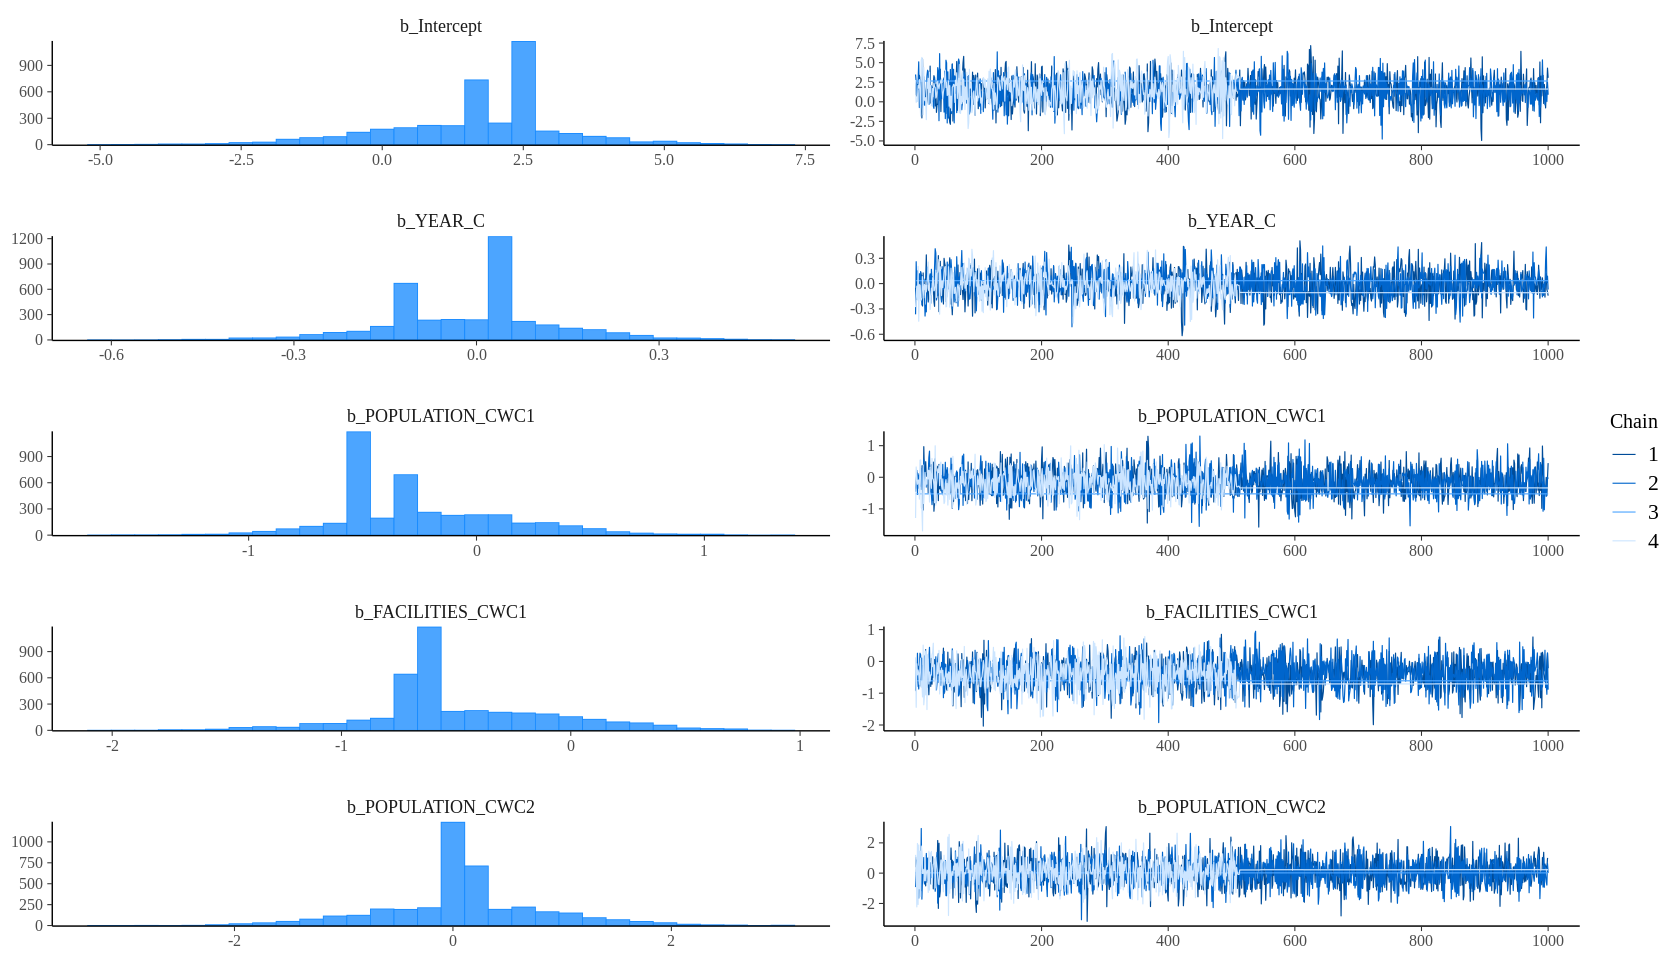

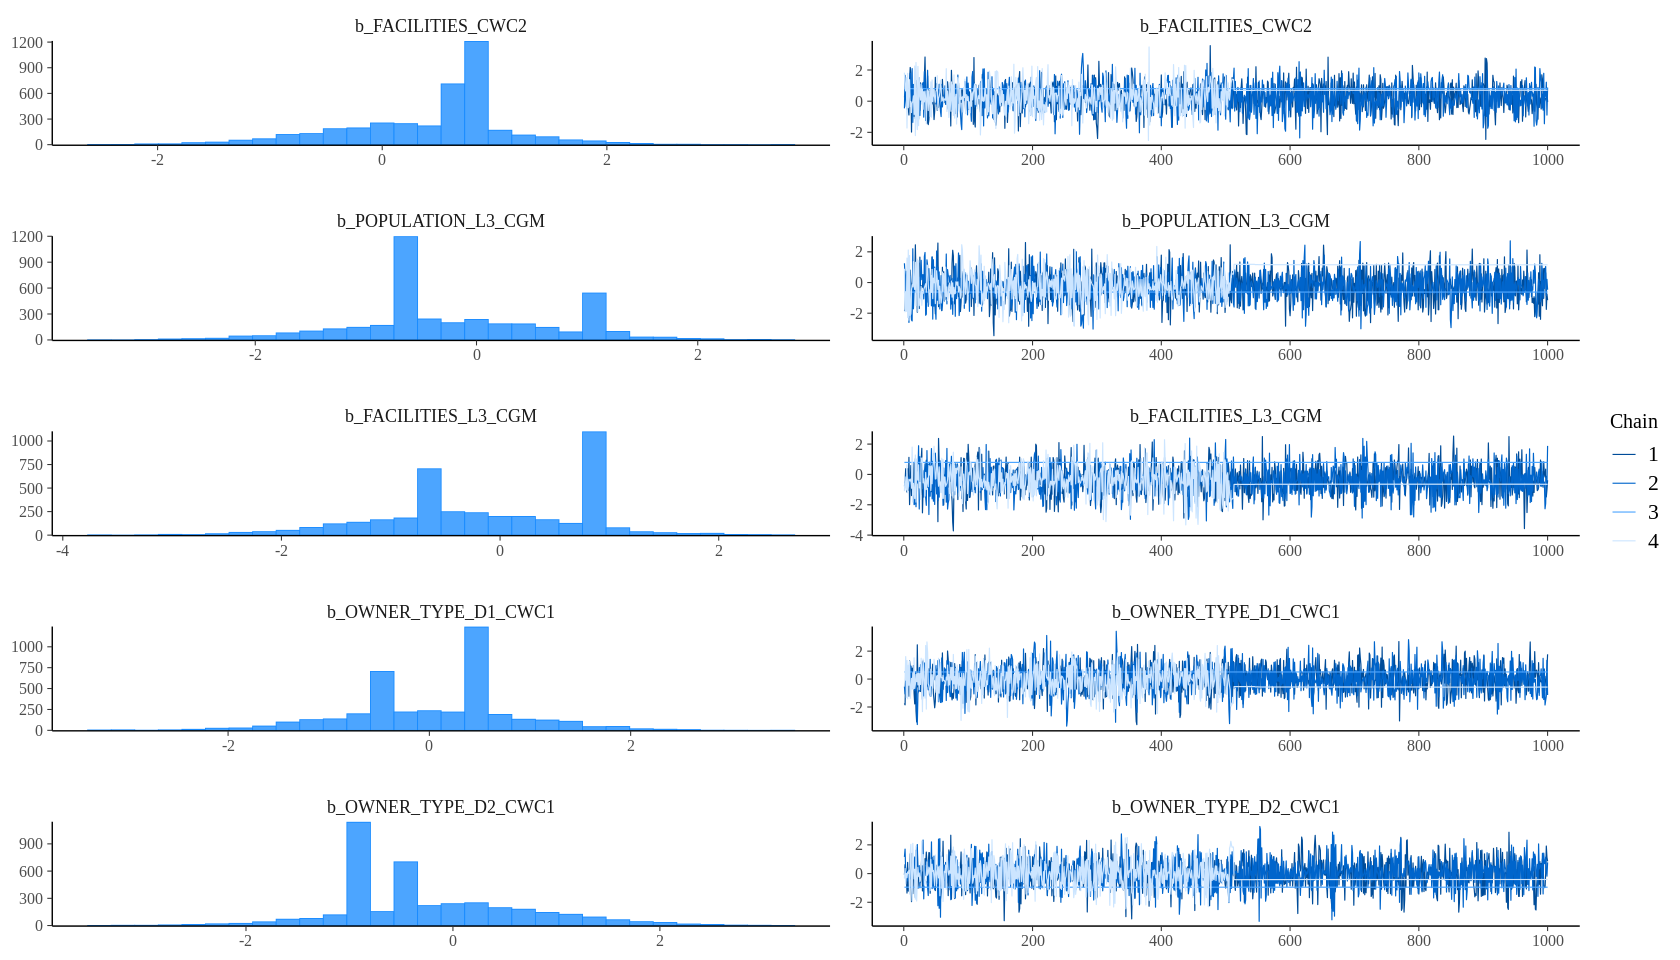

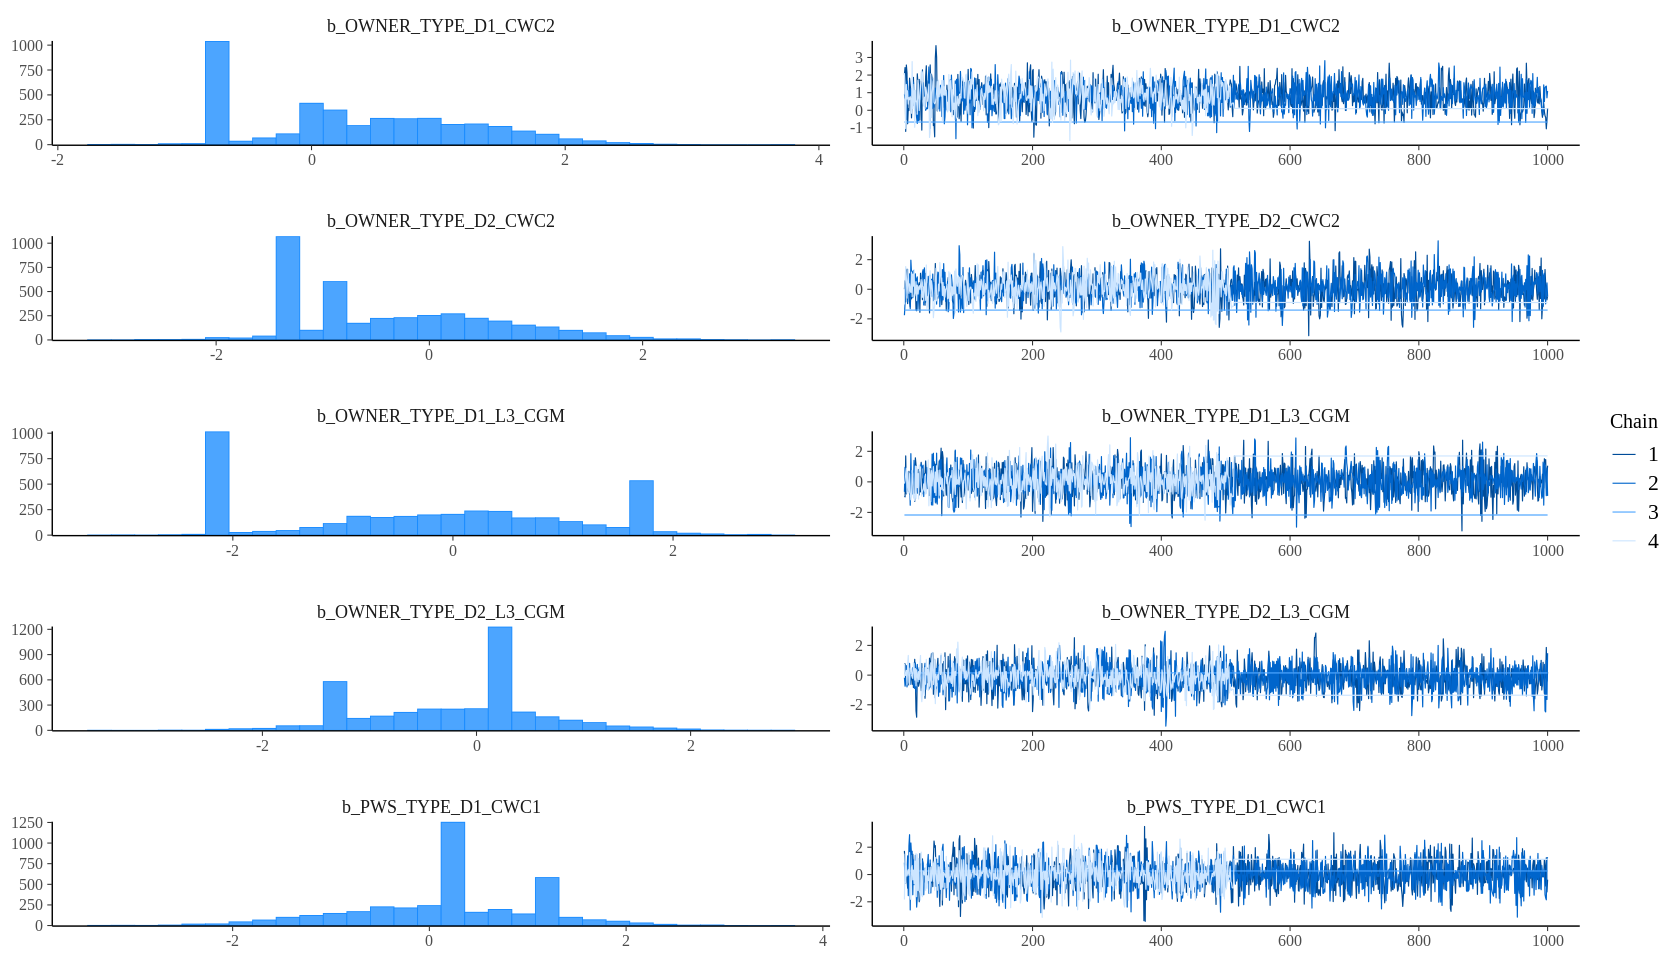

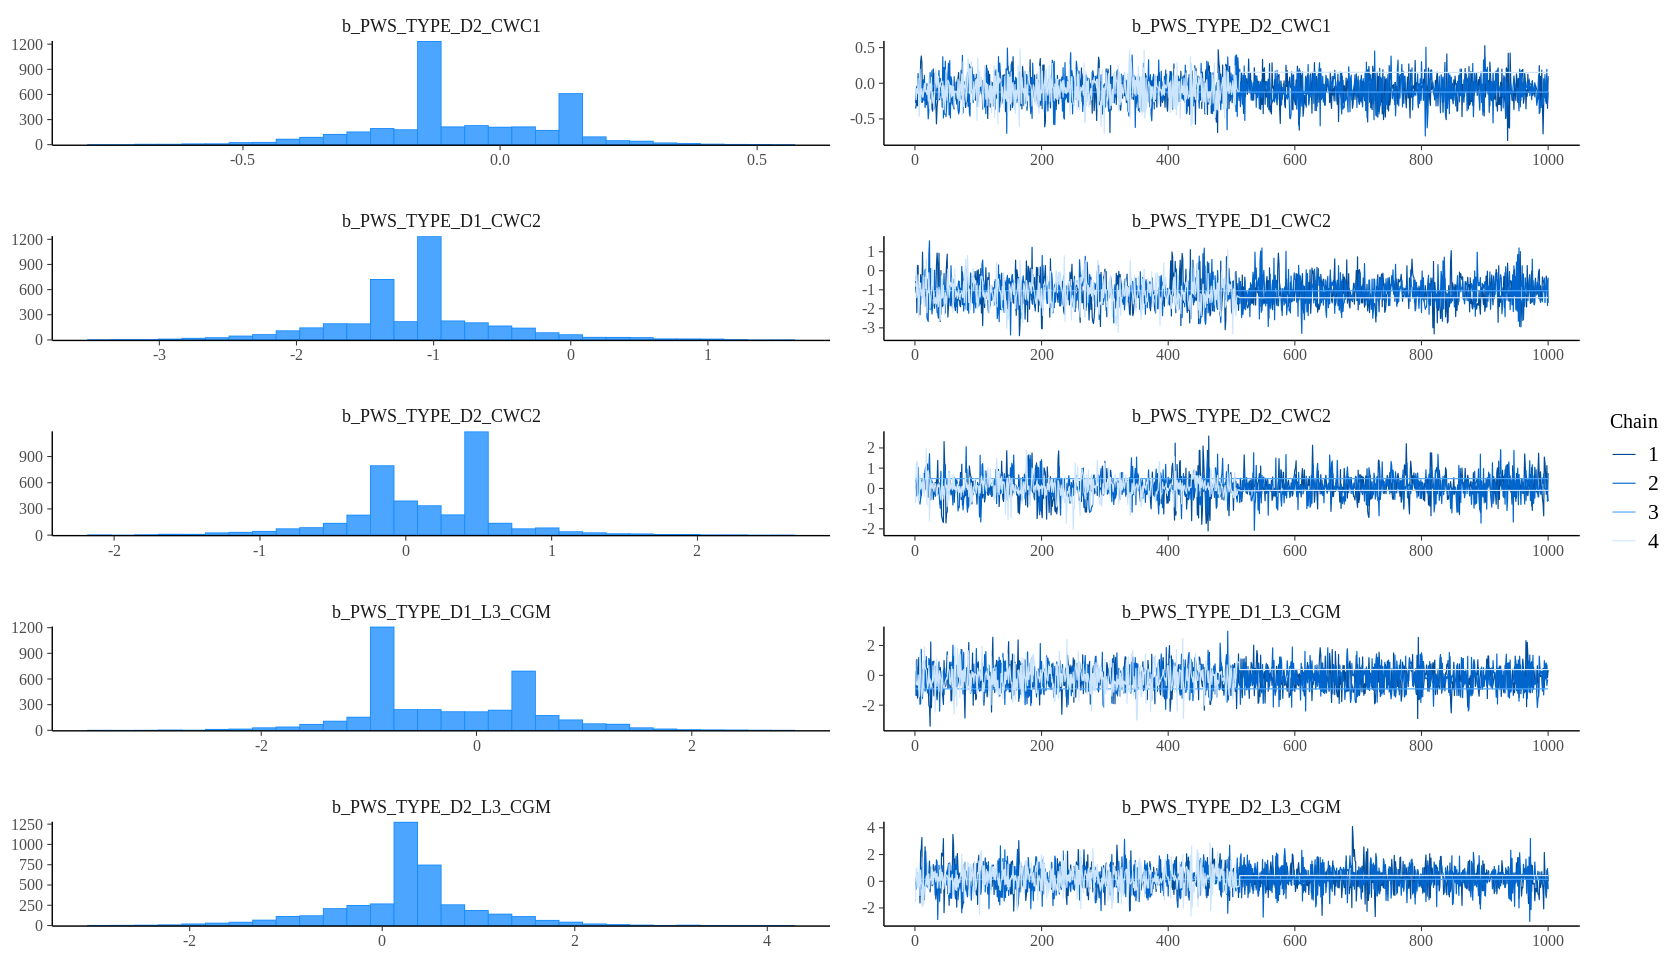

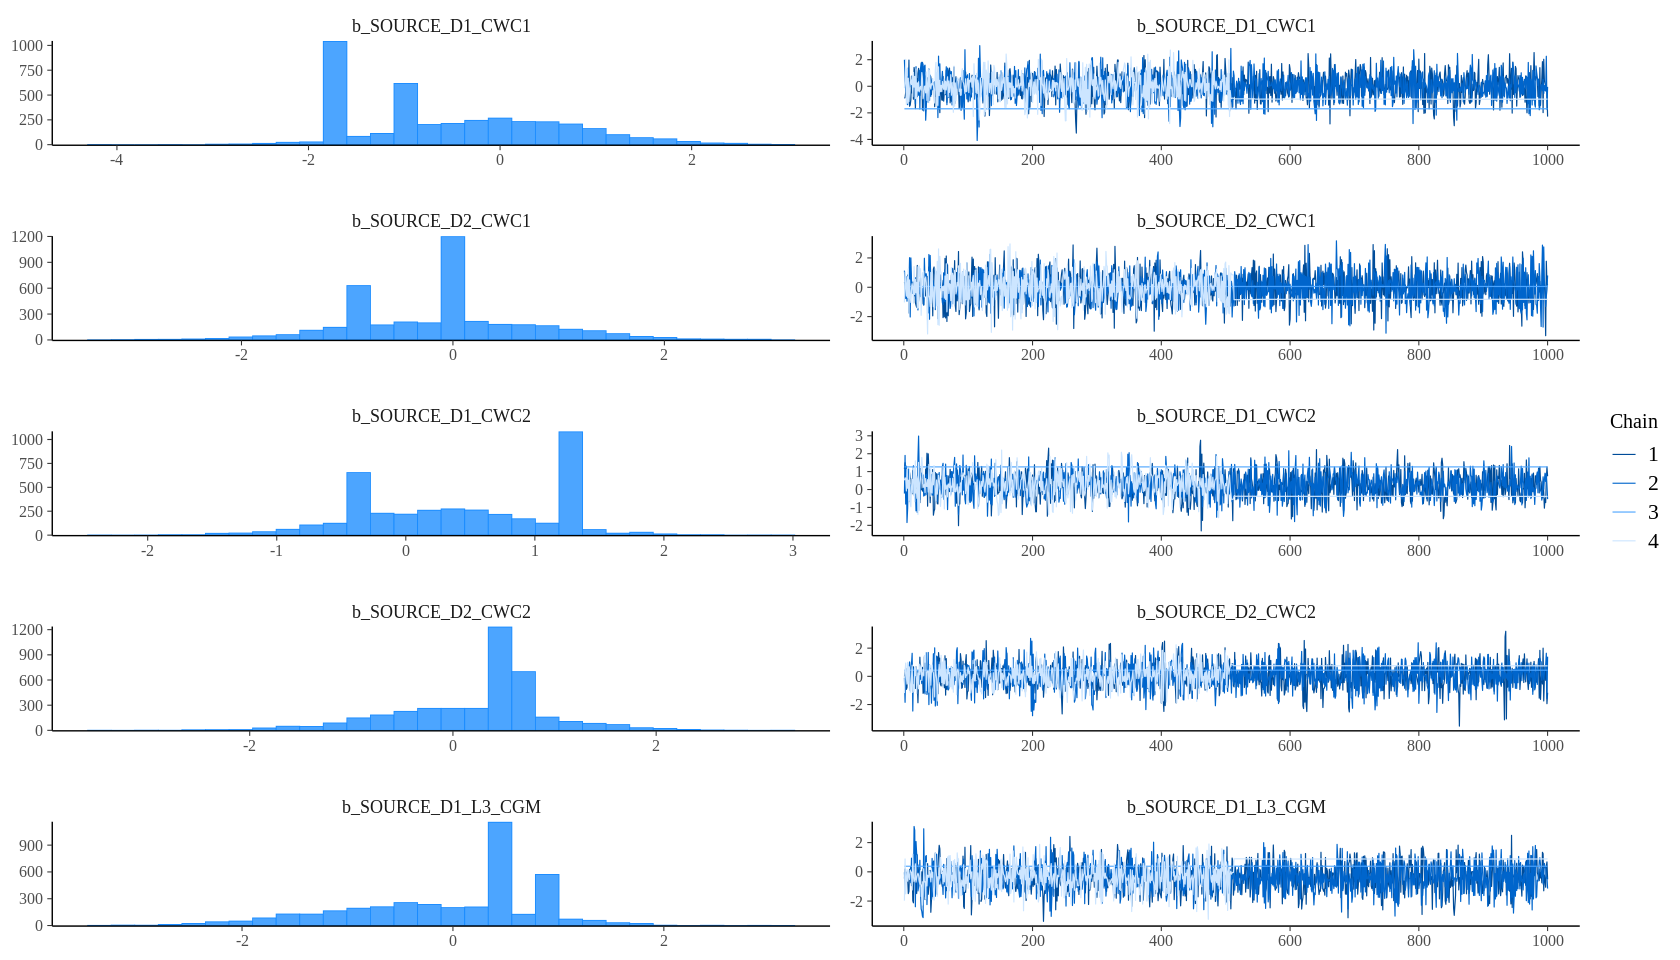

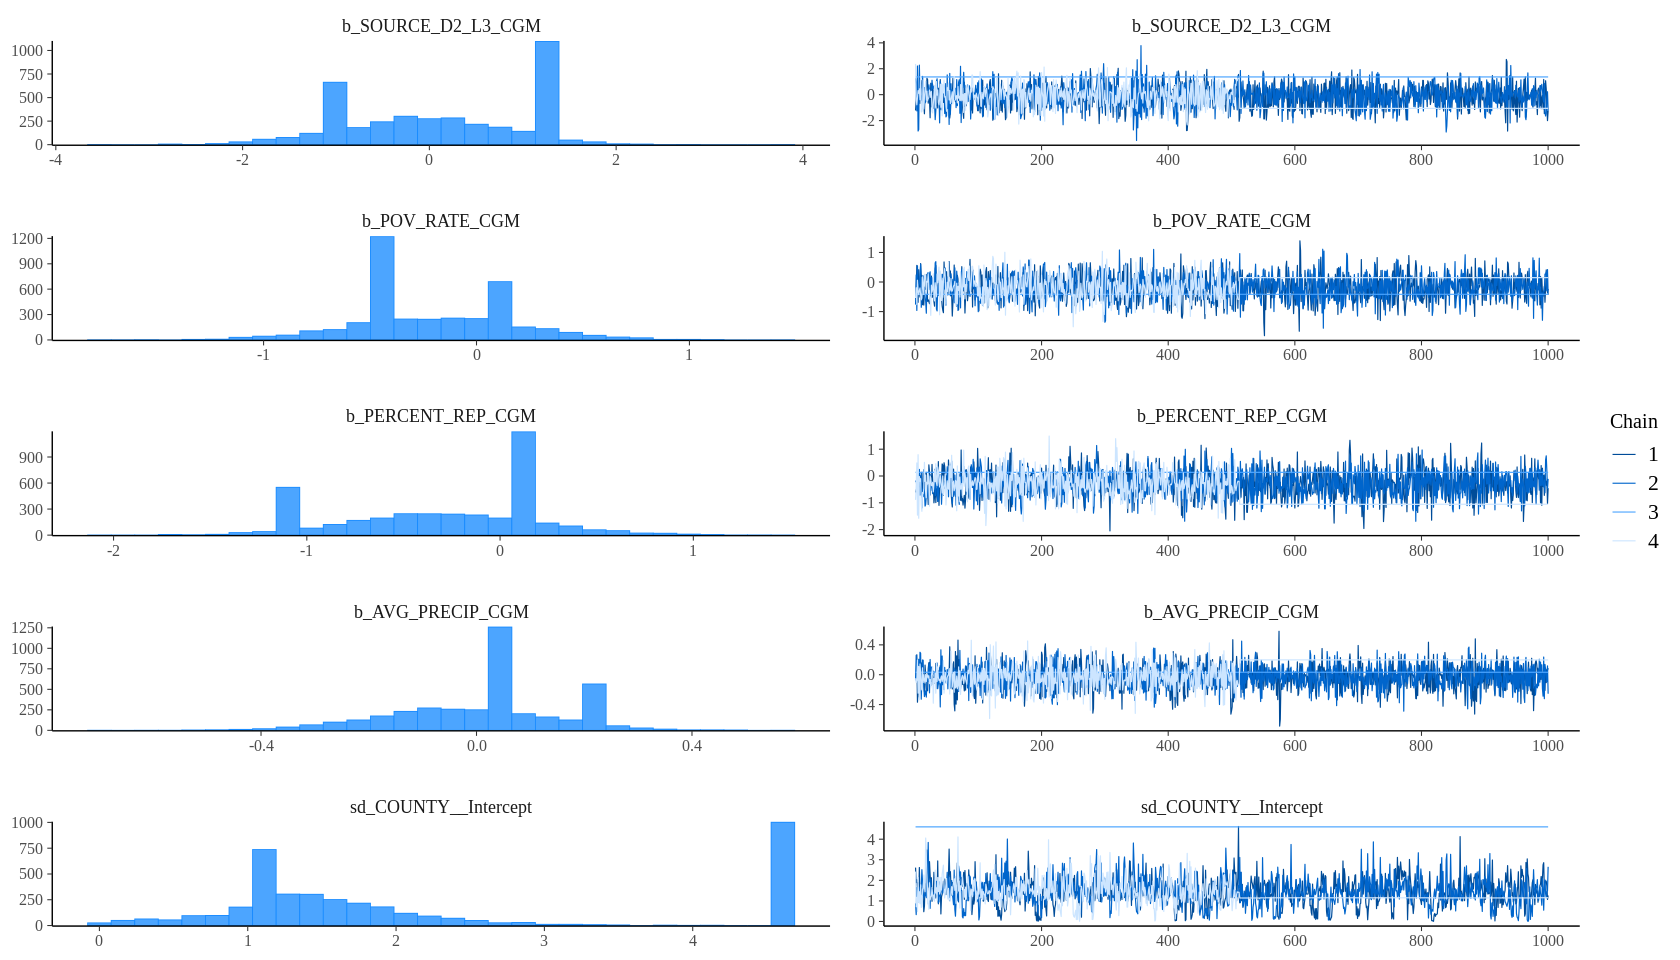

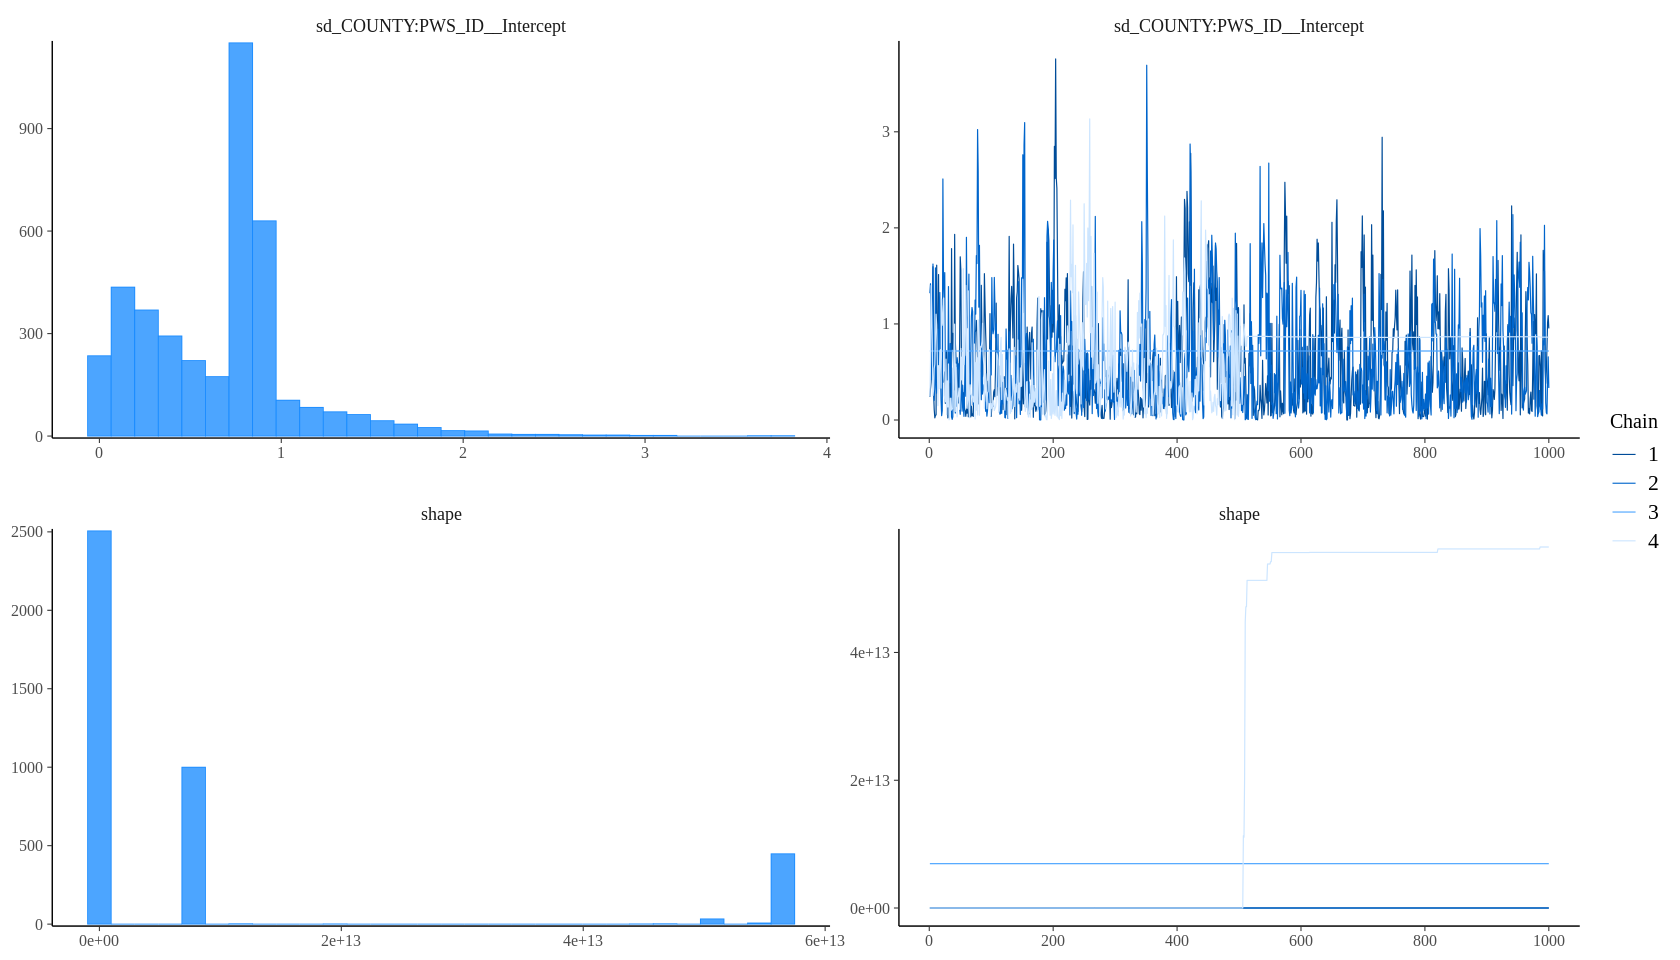

In [19]:
# Model plot
plot(rifs_model4_brms)

Using 10 posterior draws for ppc type 'dens_overlay' by default.



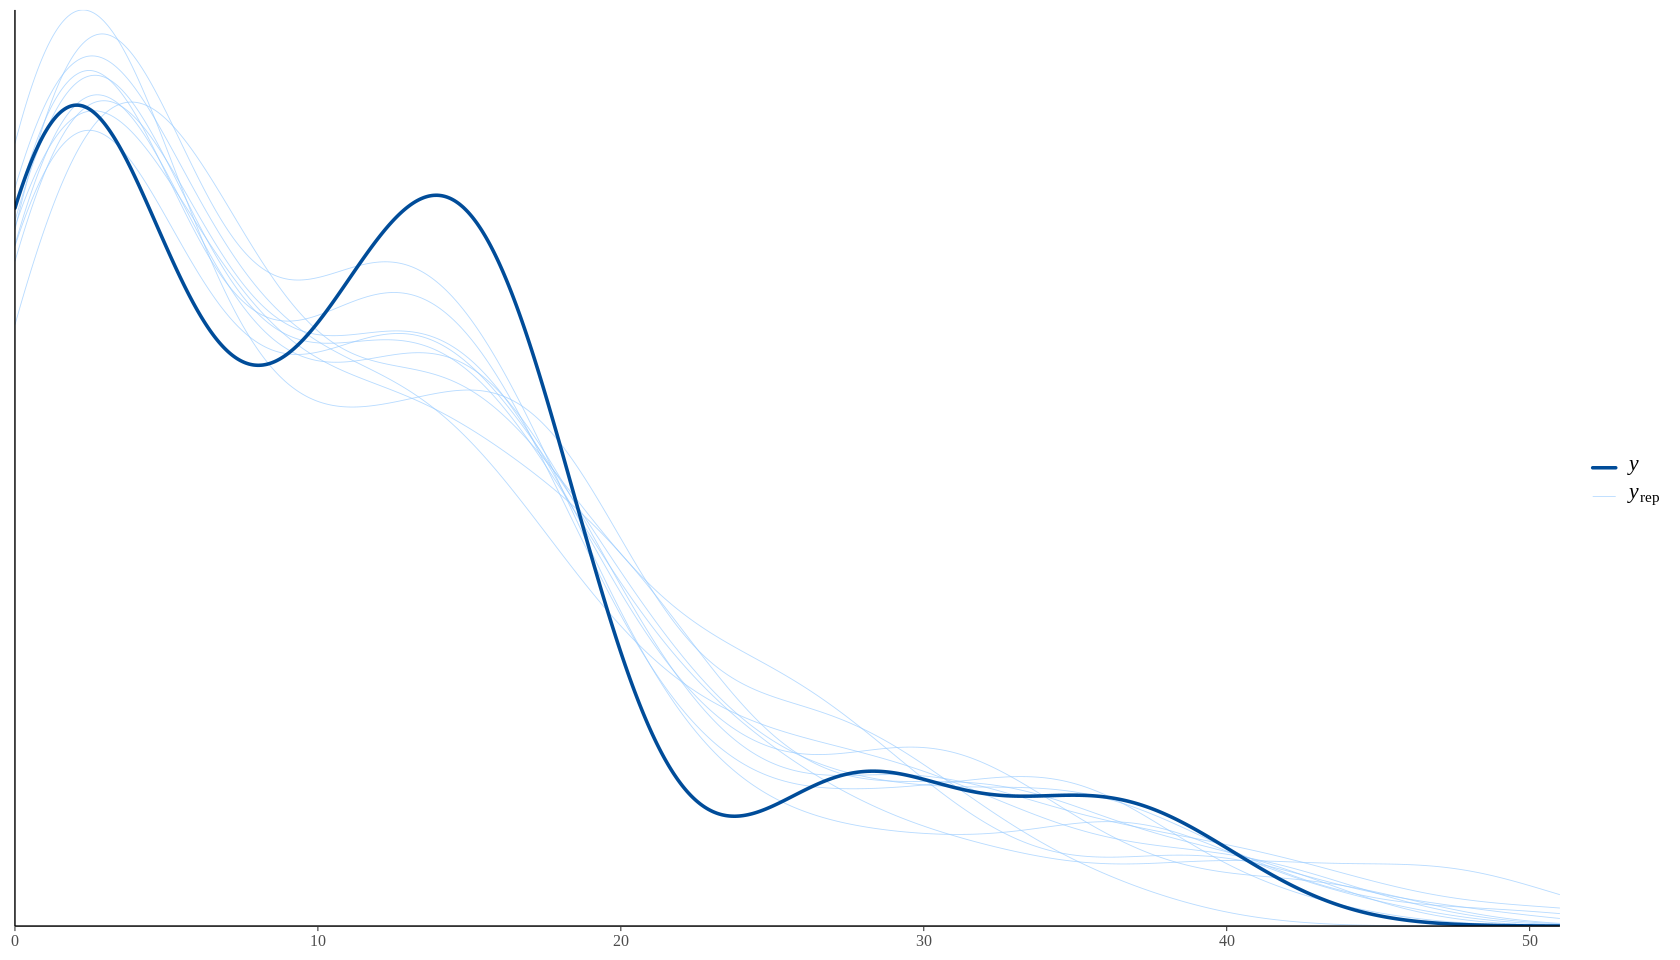

In [20]:
# Posterior predictive check
pp_check(rifs_model4_brms)

In [21]:
# Bayesian R2
bayes_R2(rifs_model4_brms)

# LOO cross-validation
loo(rifs_model4_brms)

Estimate  Est.Error   Q2.5      Q97.5   
R2 0.9675849 0.005469181 0.9537604 0.977159

Warning message:
“Found 38 observations with a pareto_k > 0.7 in model 'rifs_model4_brms'. We recommend to set 'moment_match = TRUE' in order to perform moment matching for problematic observations. ”



Computed from 4000 by 150 log-likelihood matrix.

         Estimate   SE
elpd_loo   -311.5 12.9
p_loo         7.6  2.4
looic       623.0 25.7
------
MCSE of elpd_loo is NA.
MCSE and ESS estimates assume MCMC draws (r_eff in [0.0, 0.8]).

Pareto k diagnostic values:
                         Count Pct.    Min. ESS
(-Inf, 0.7]   (good)     112   74.7%   4       
   (0.7, 1]   (bad)        9    6.0%   <NA>    
   (1, Inf)   (very bad)  29   19.3%   <NA>    
See help('pareto-k-diagnostic') for details.

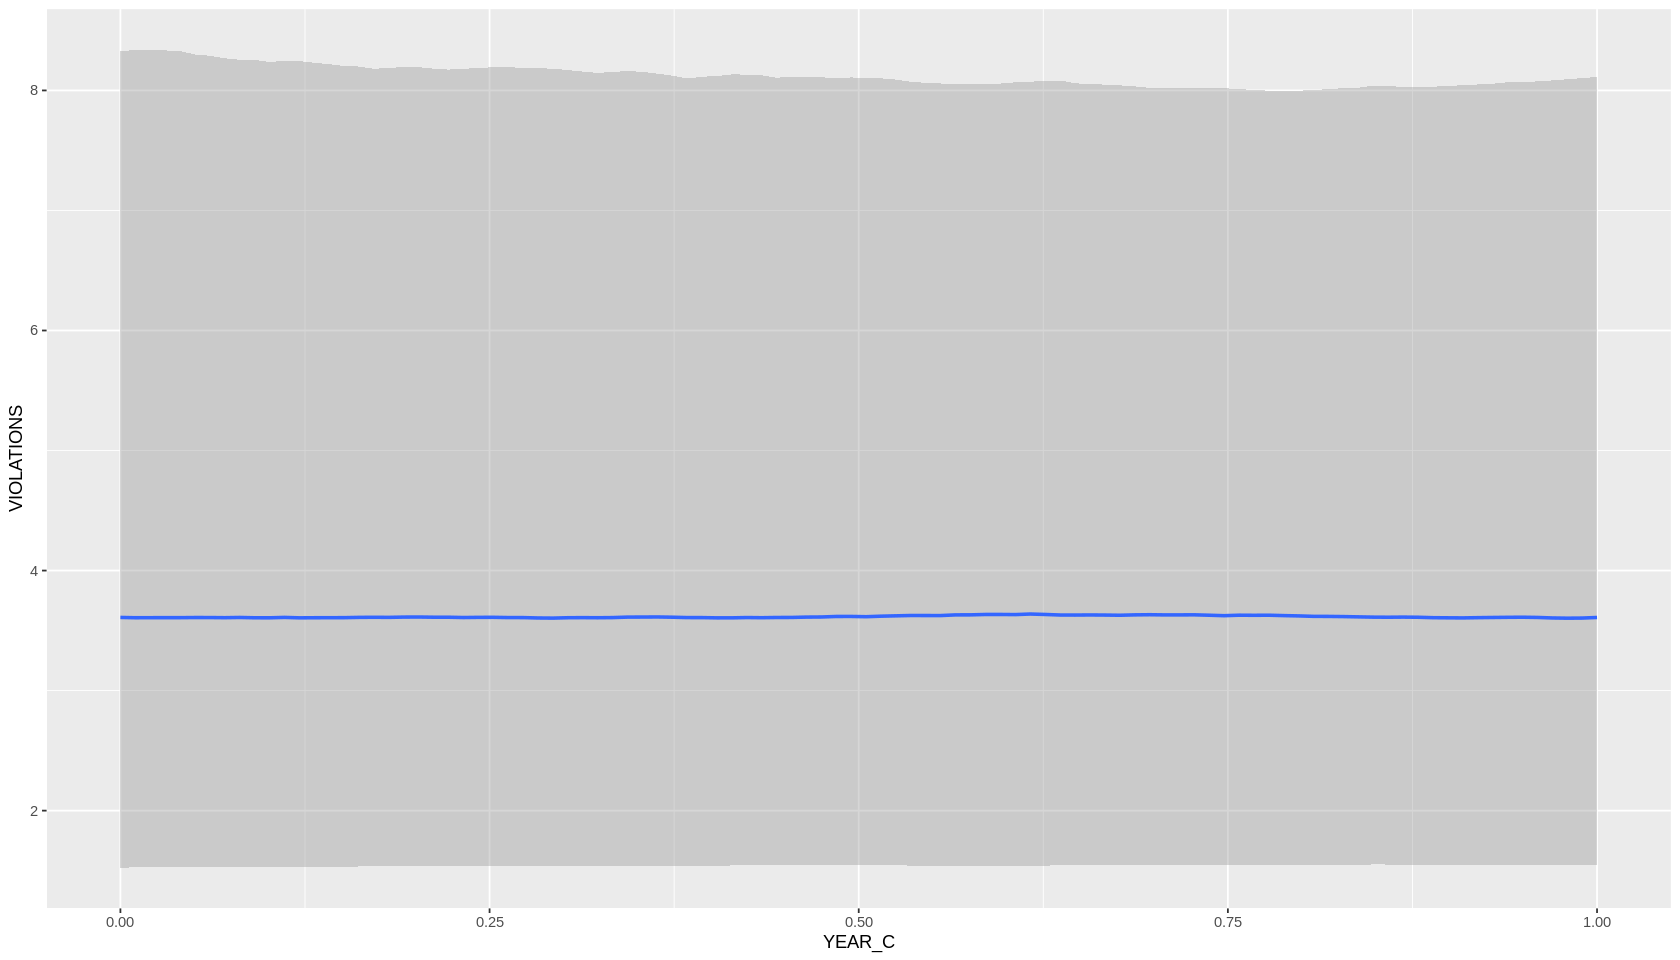

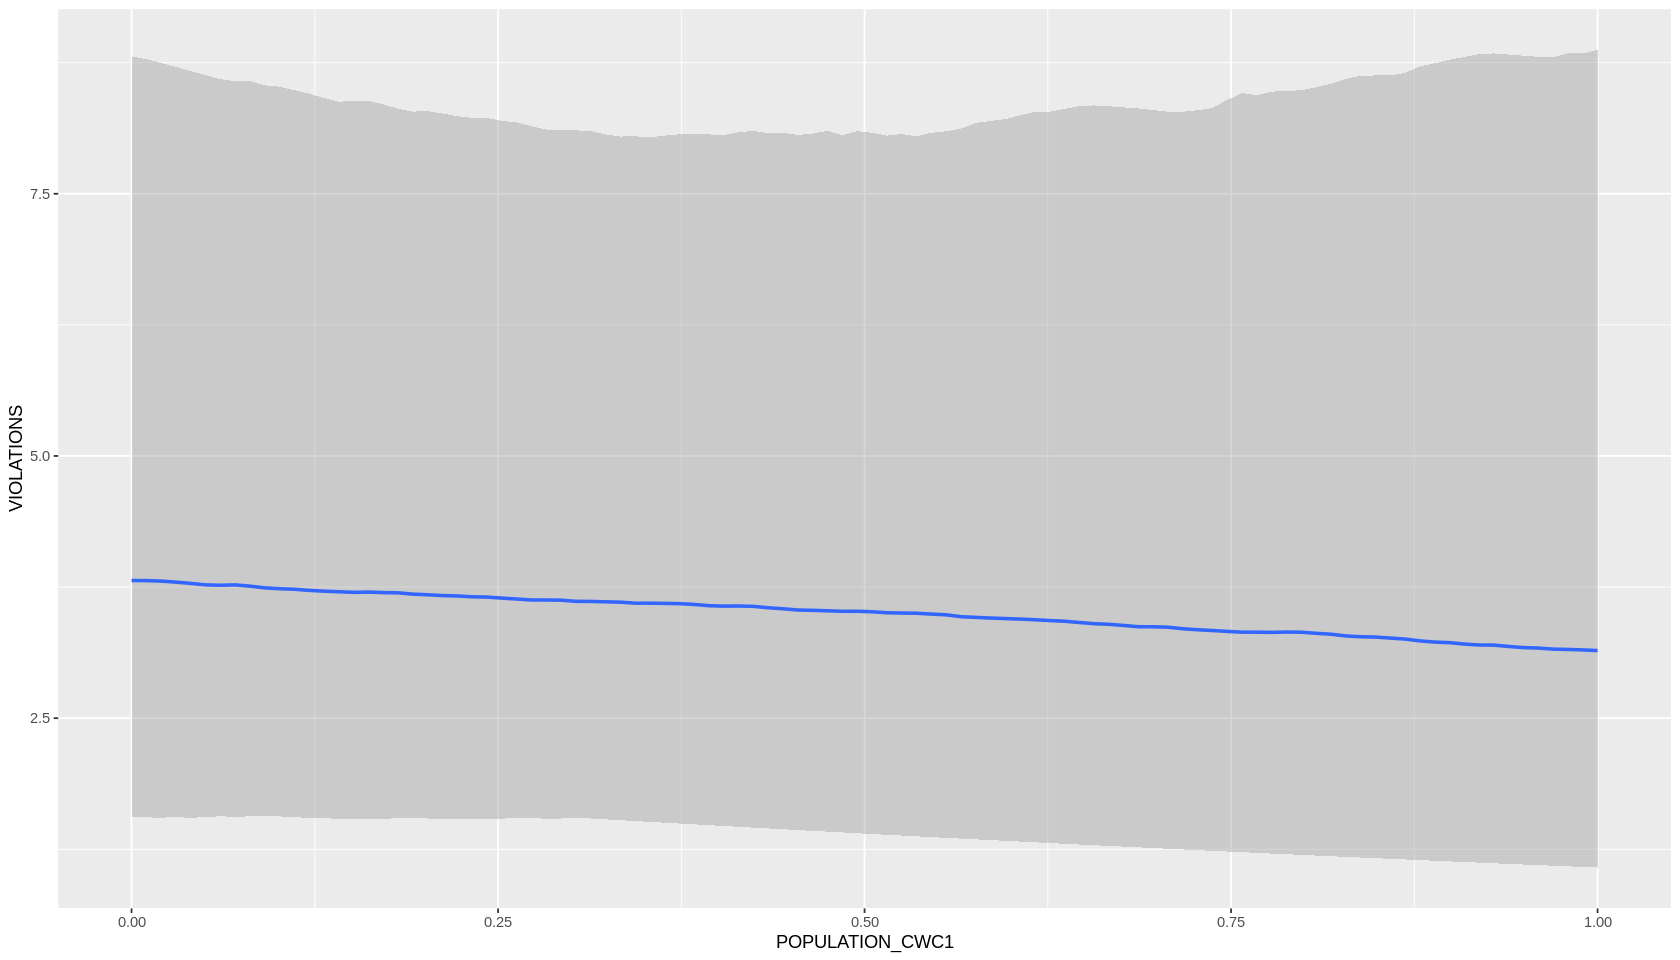

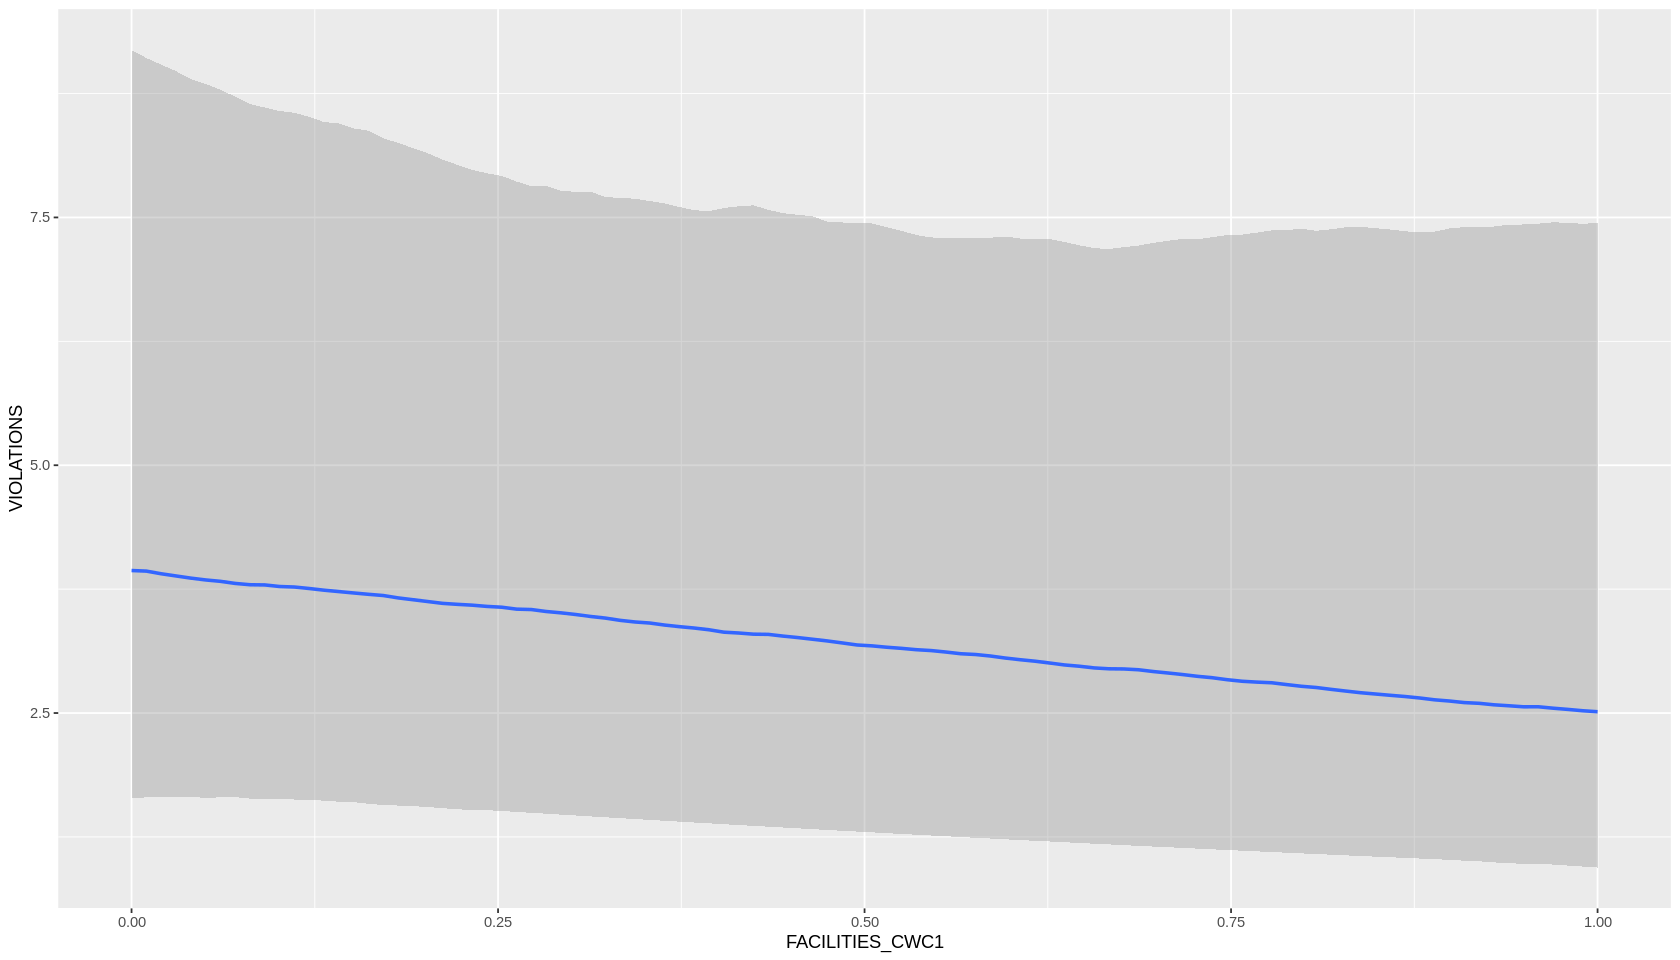

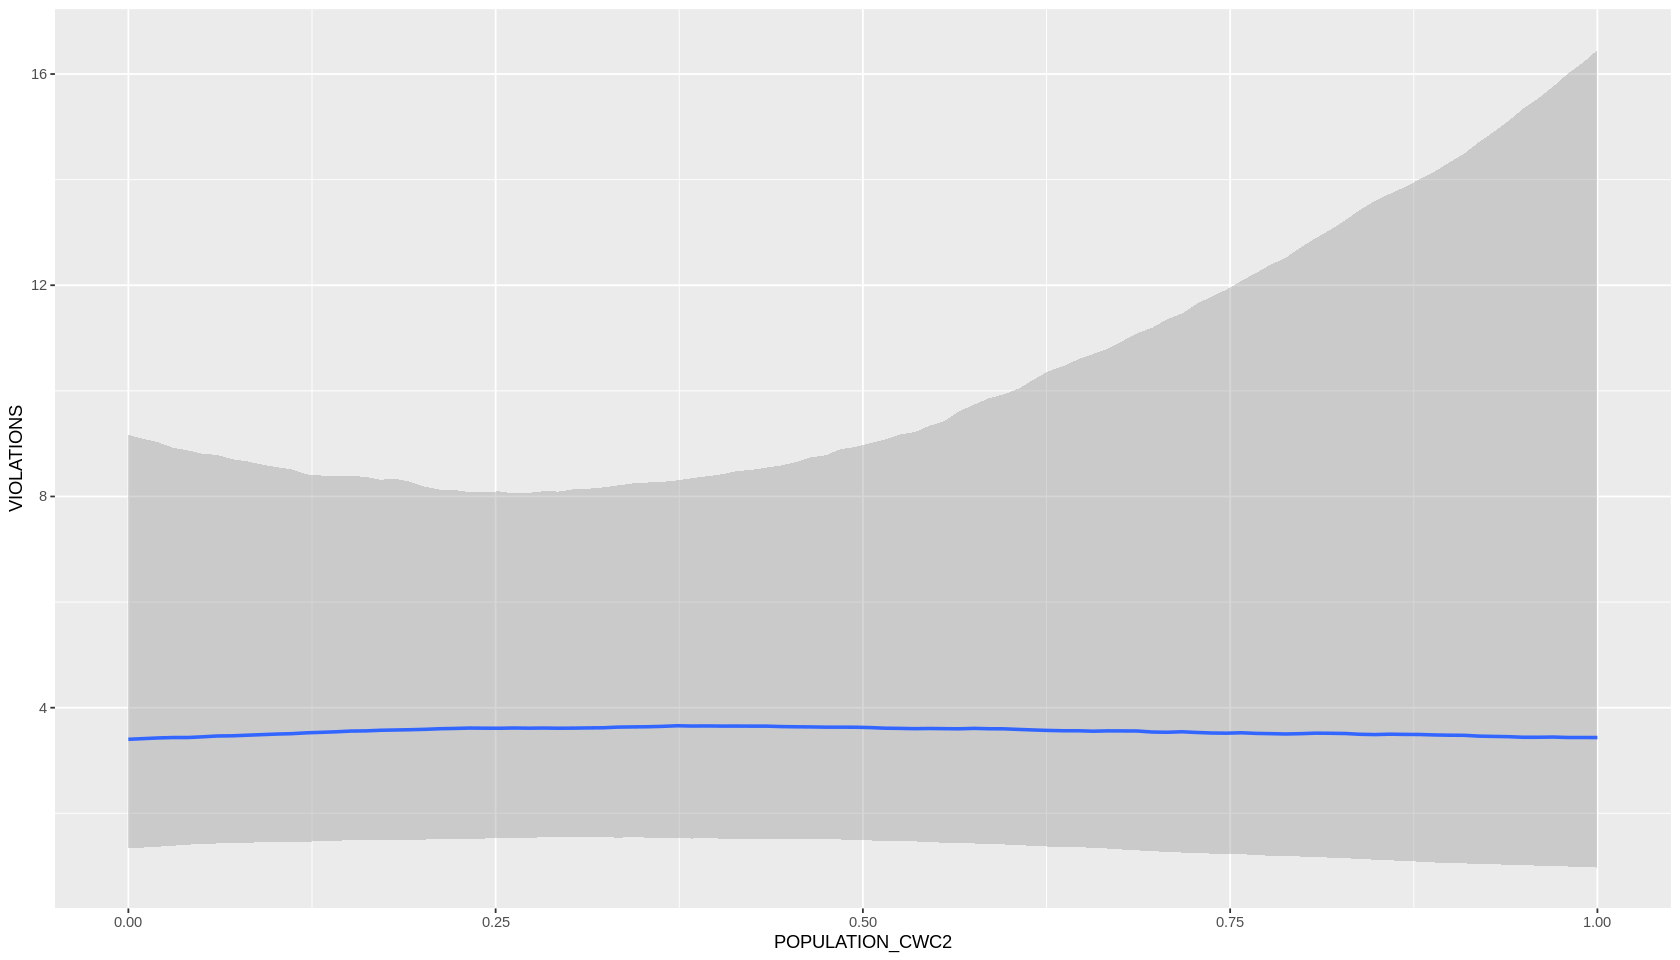

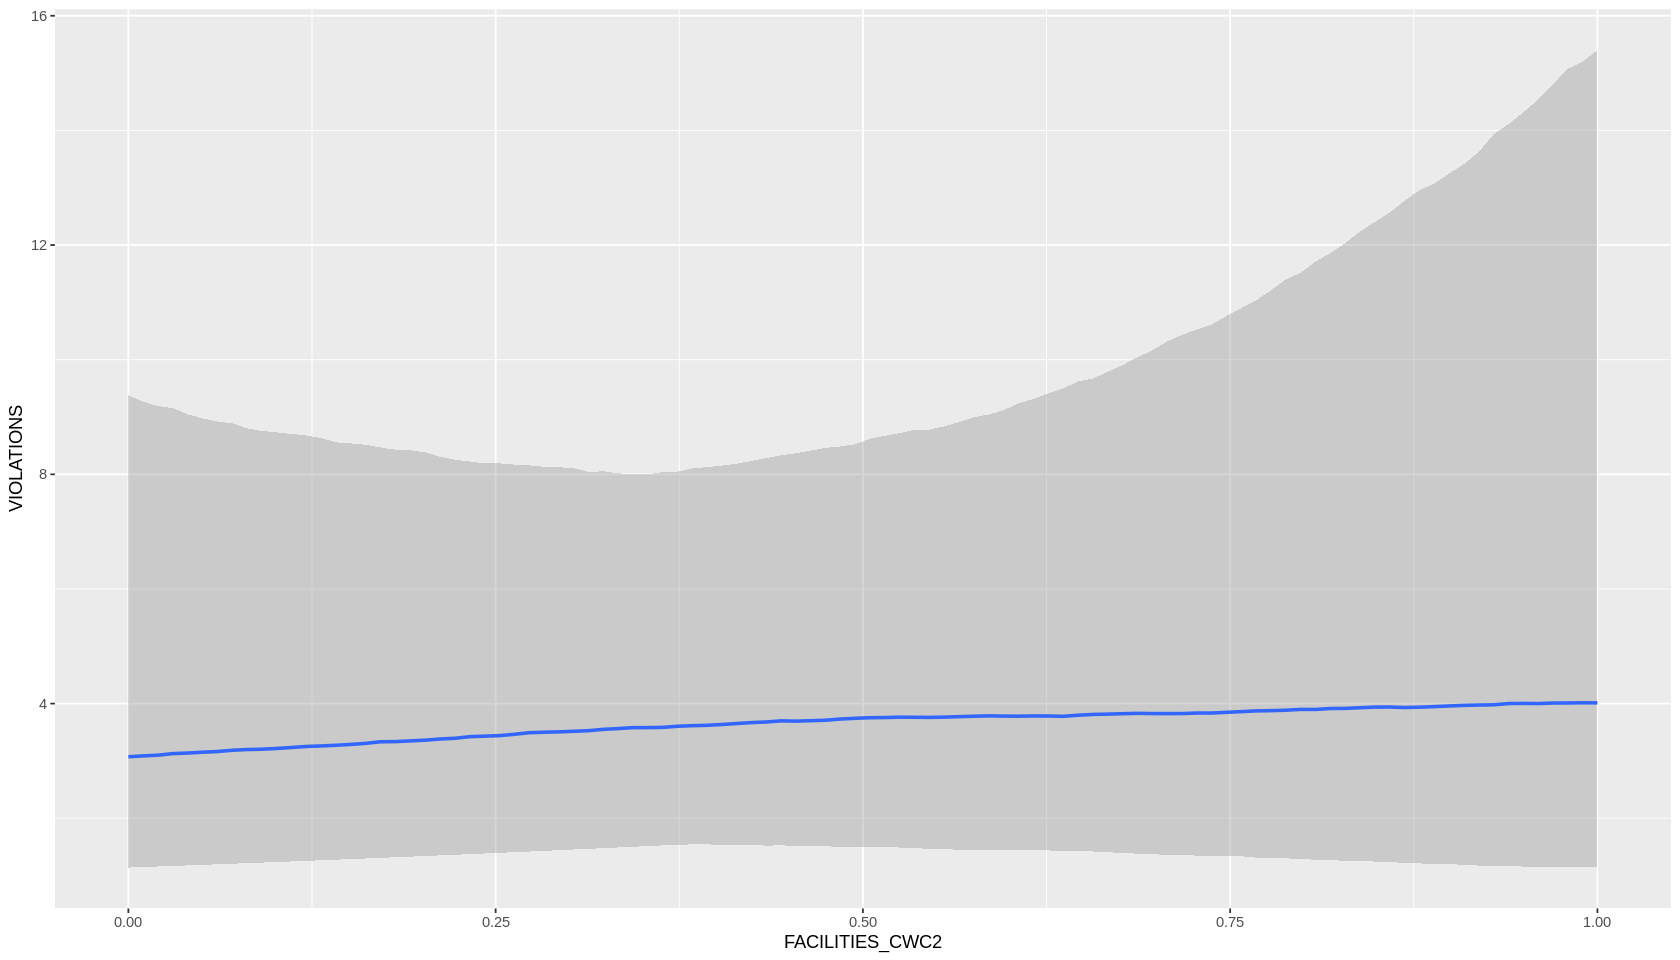

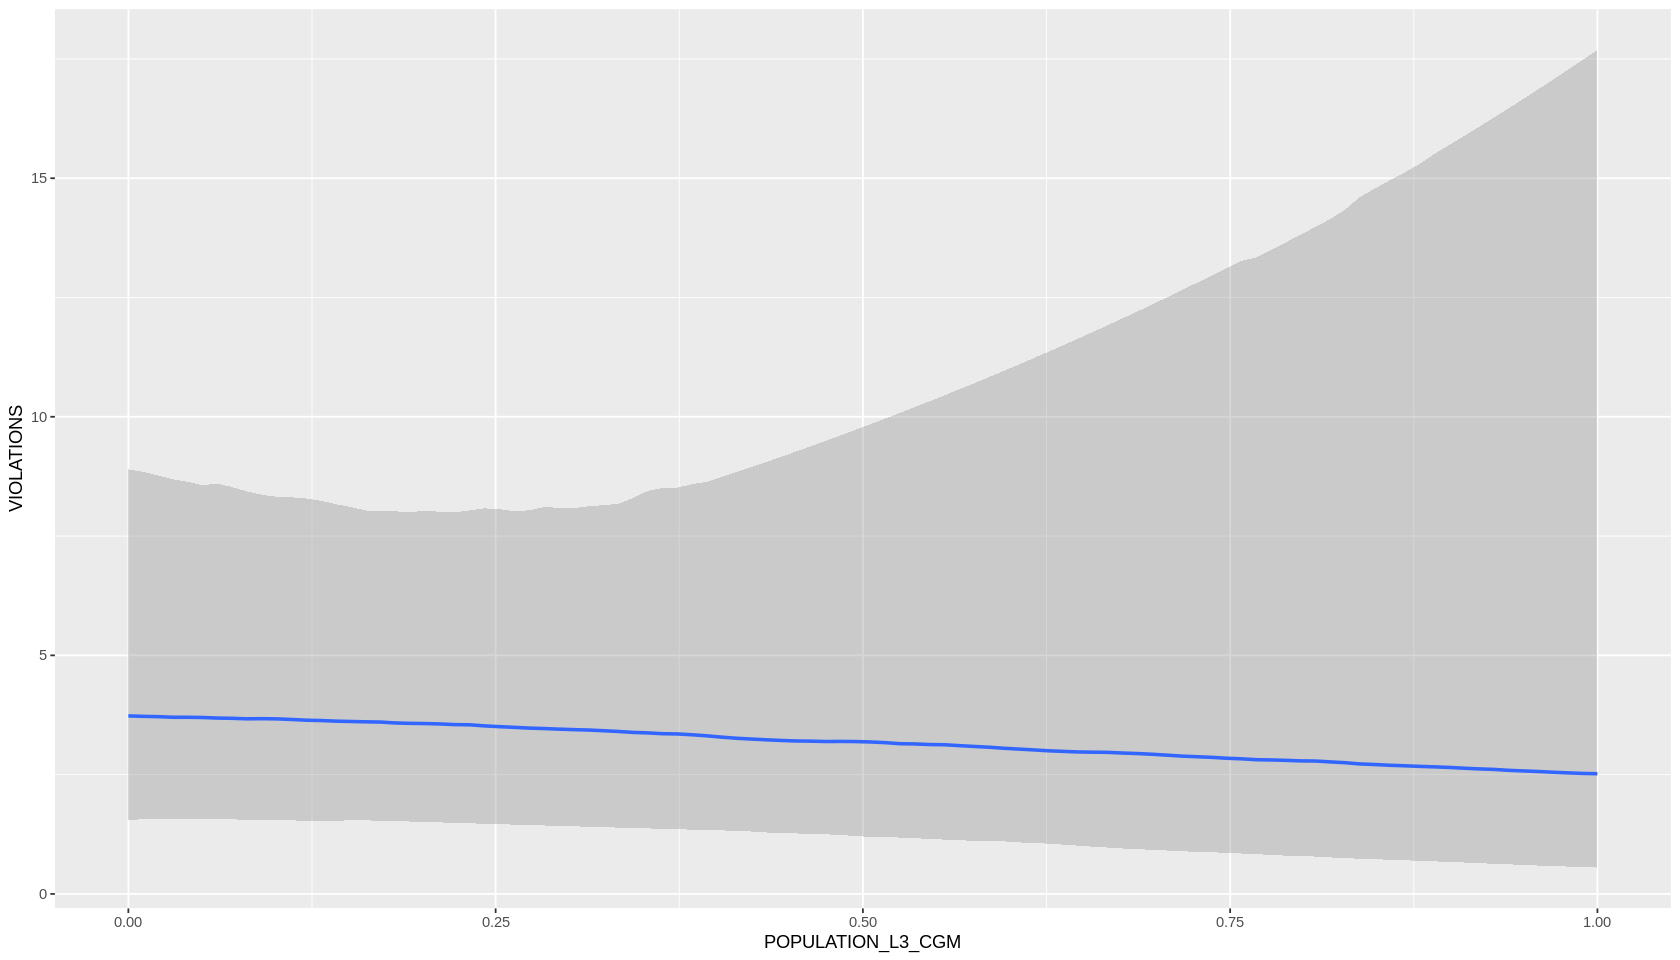

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


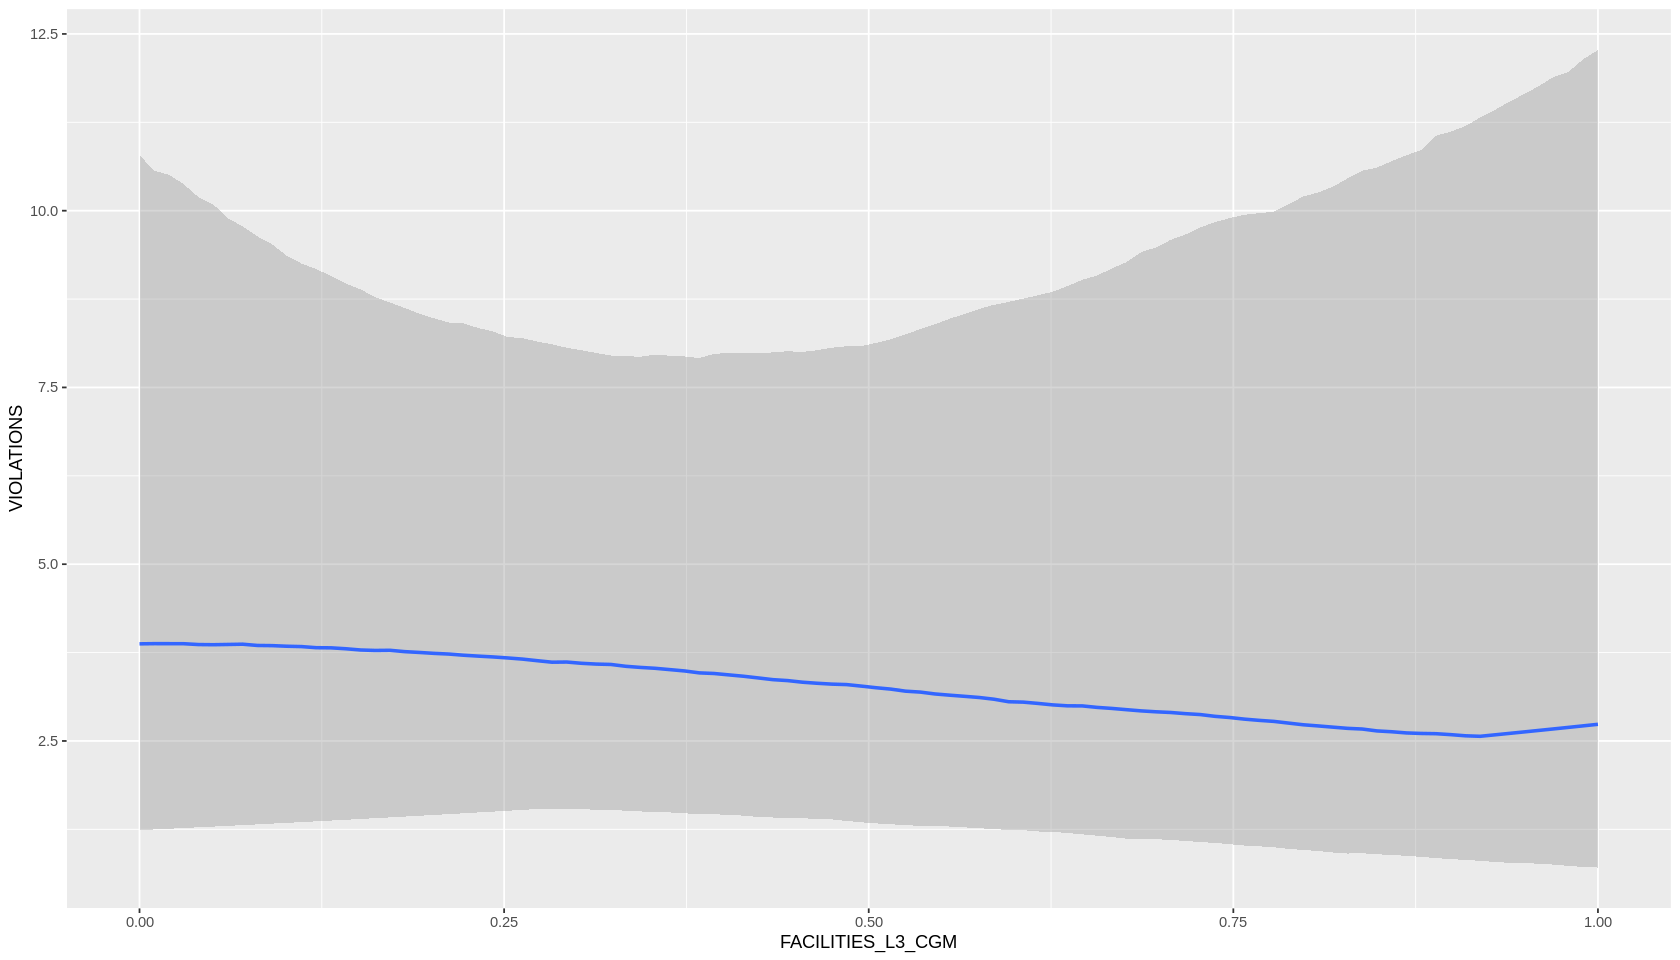

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


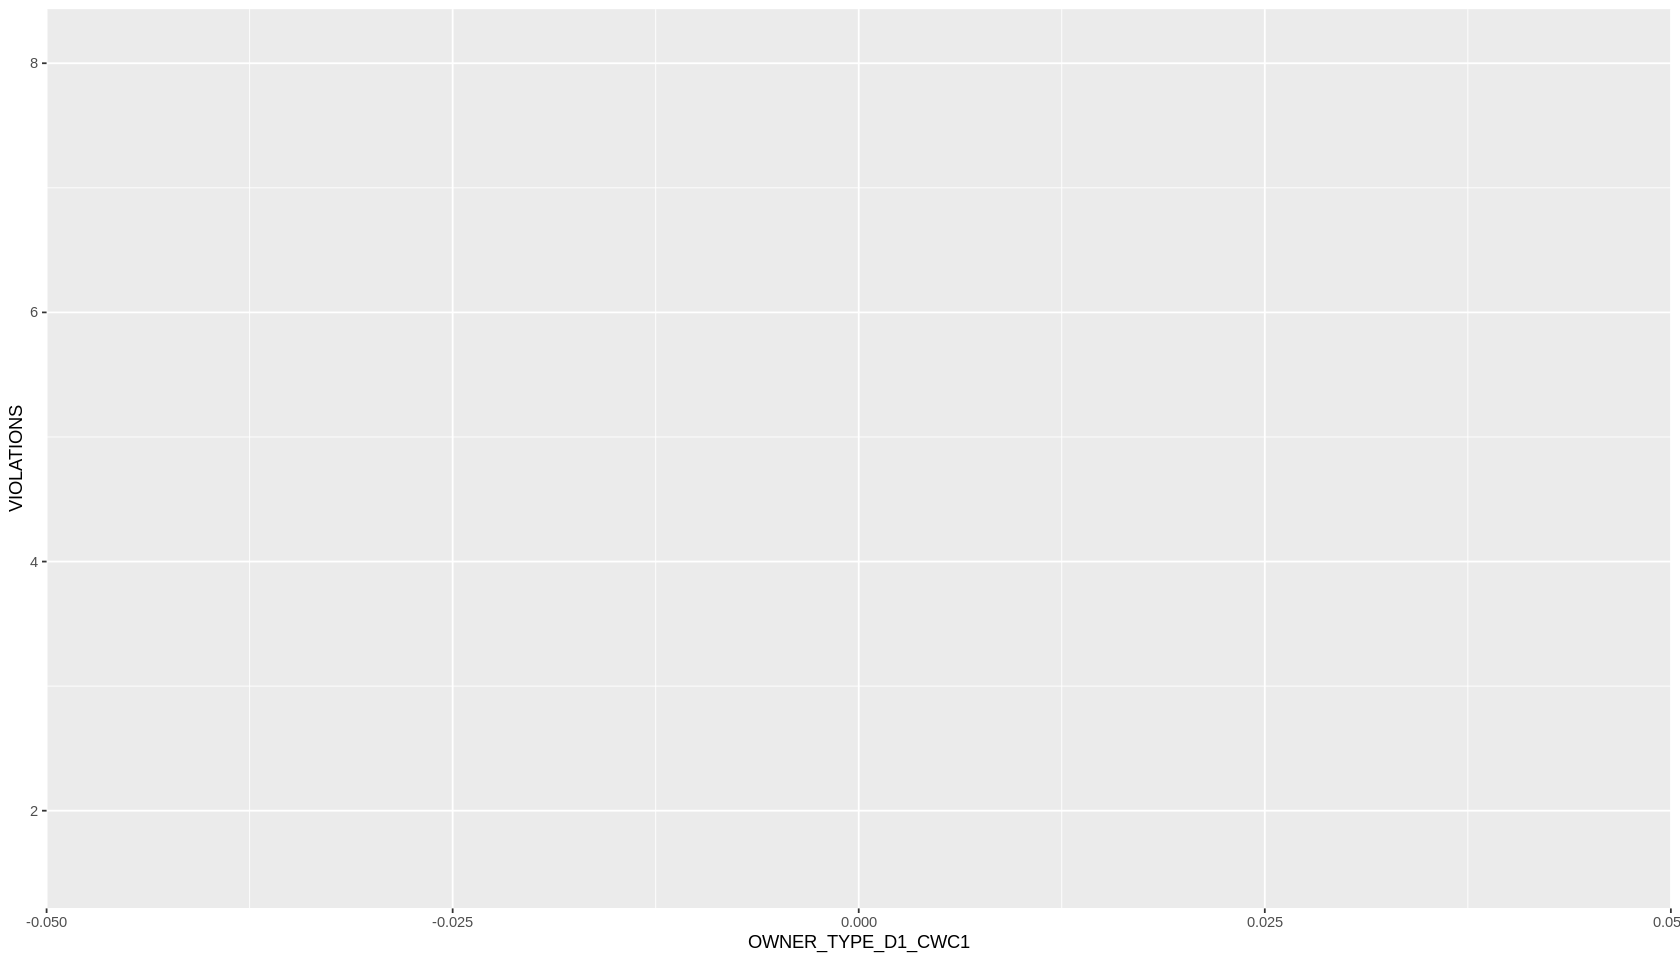

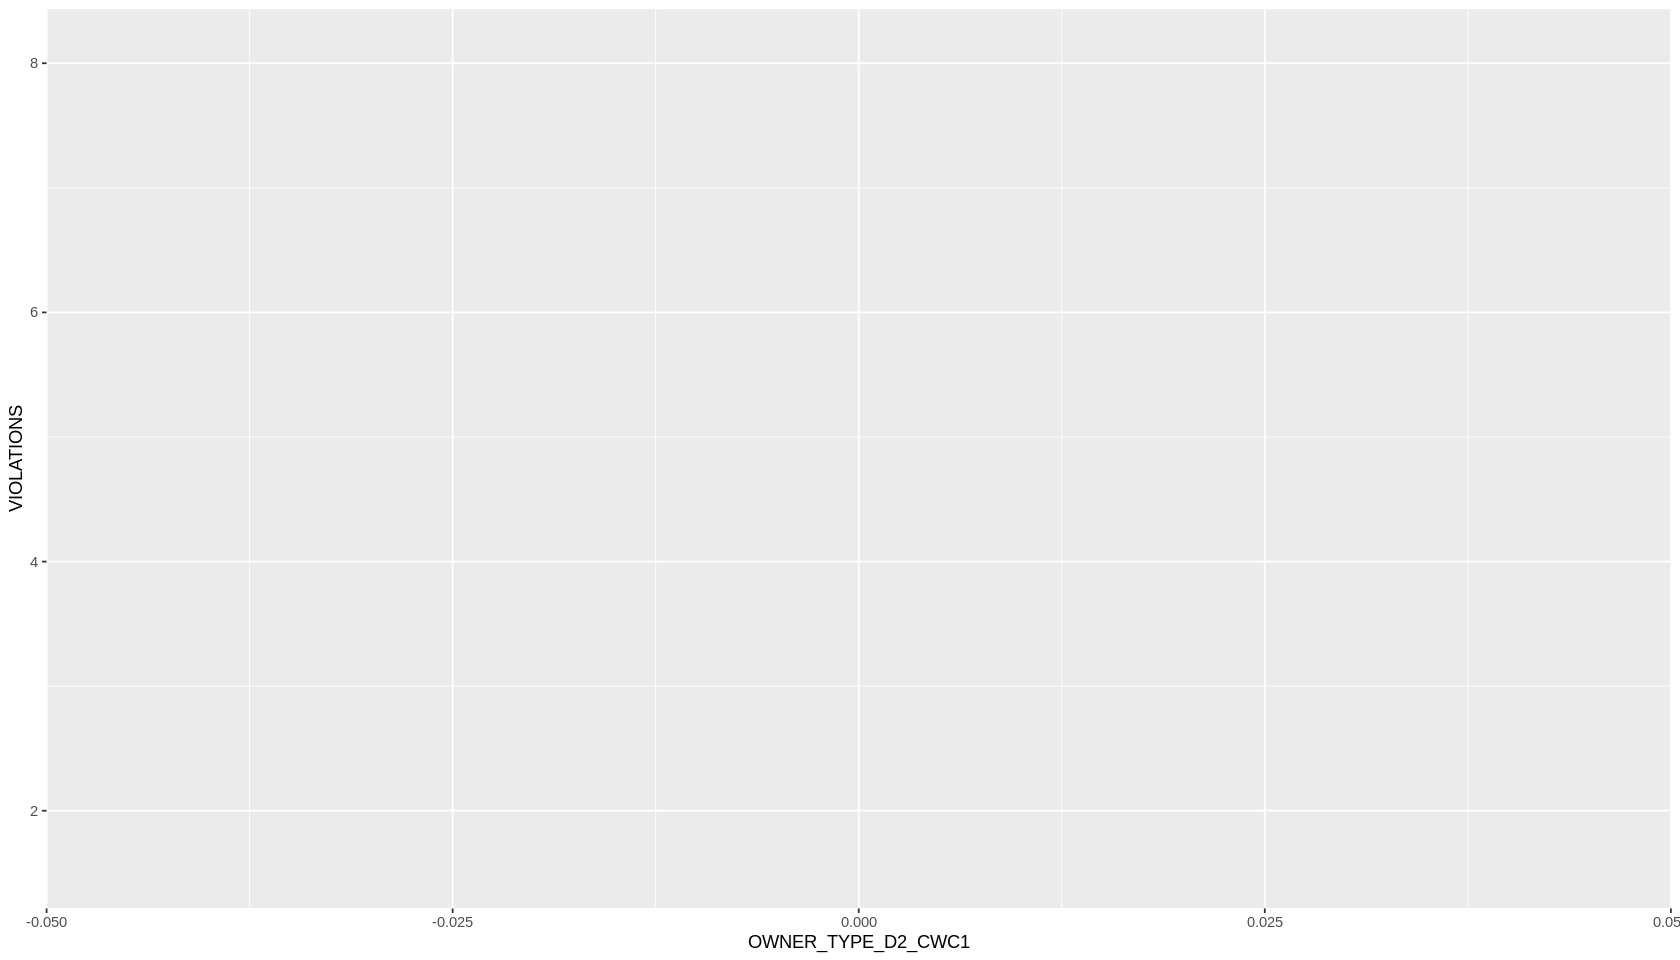

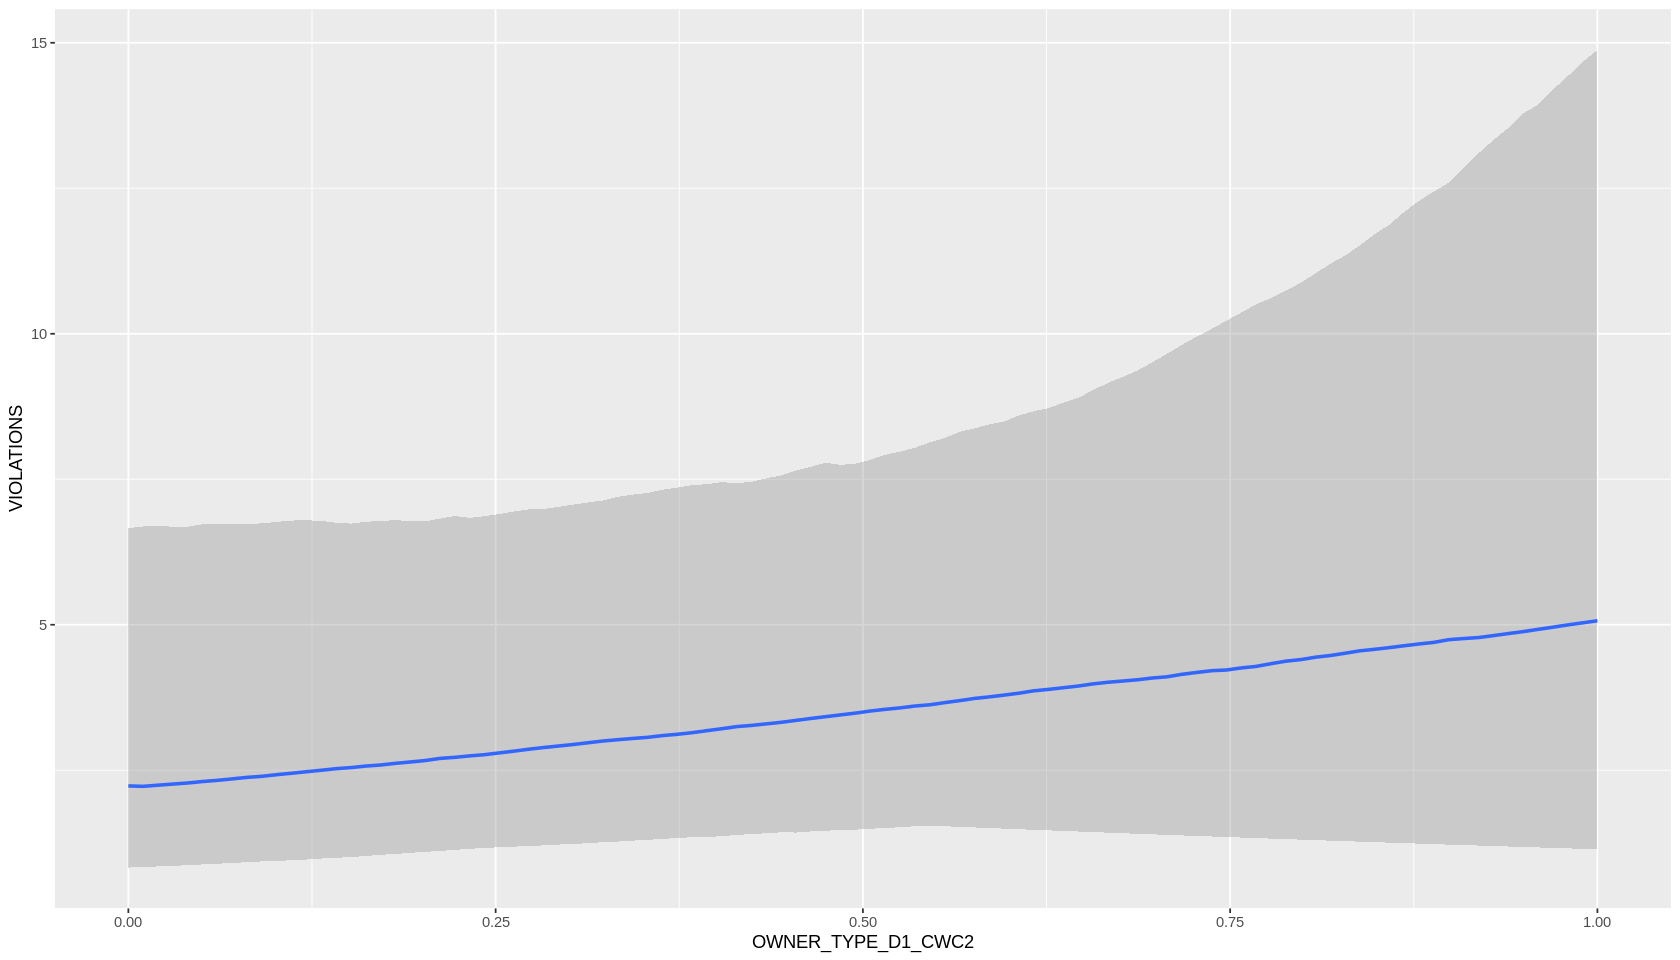

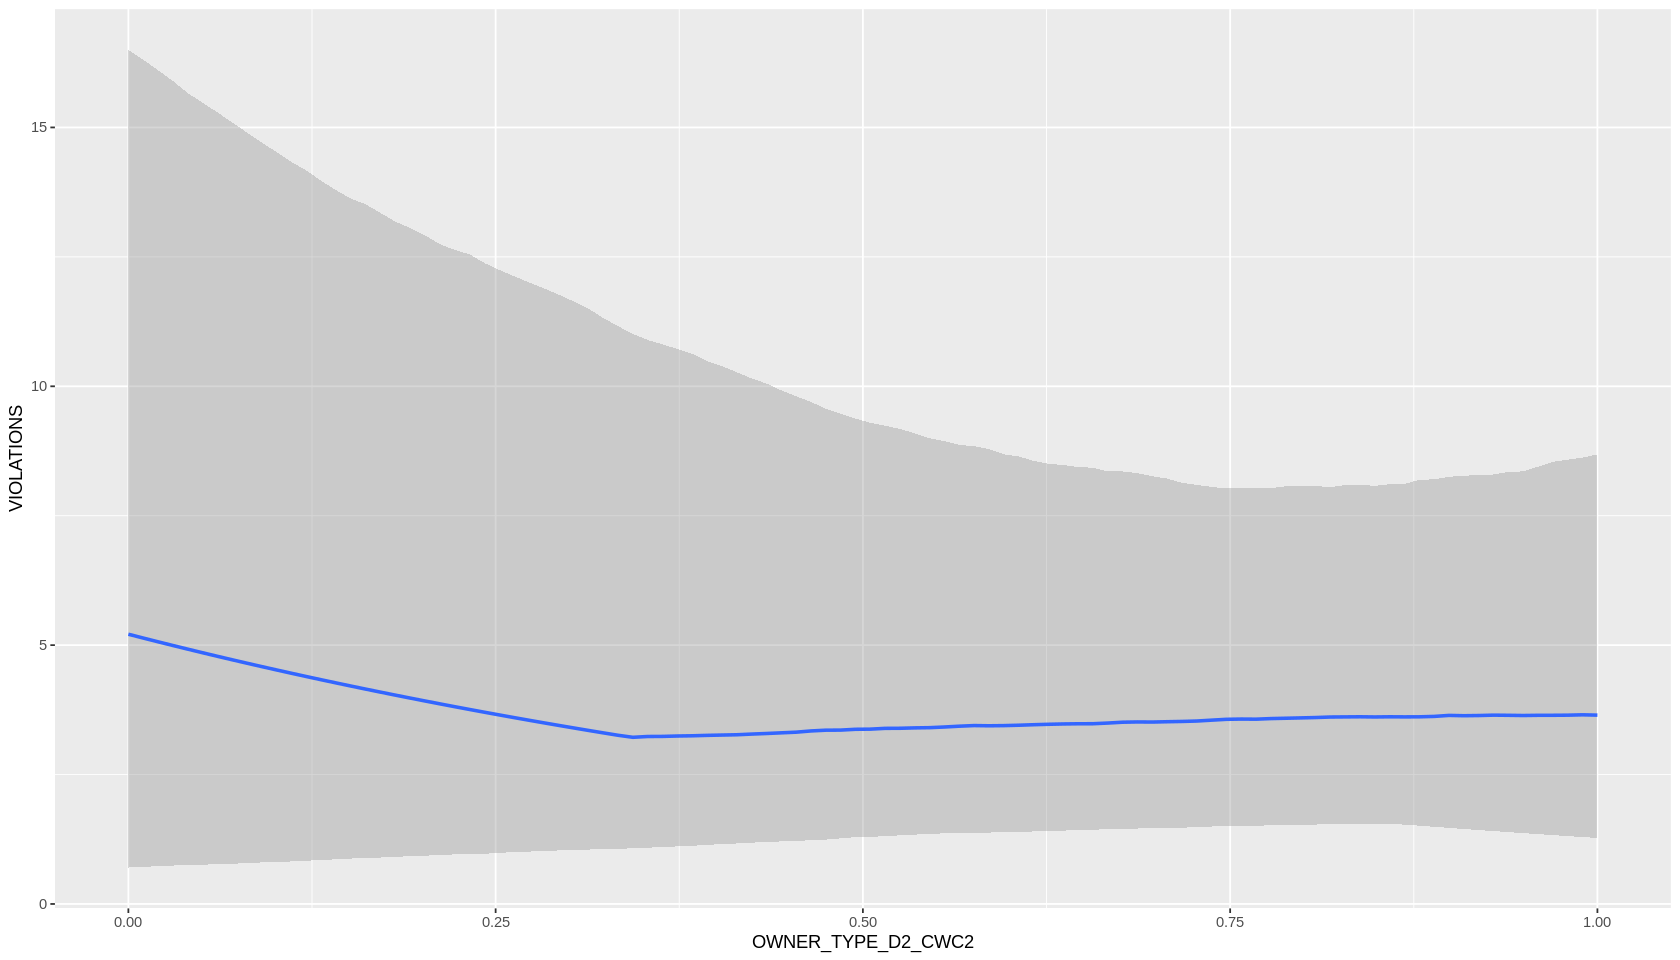

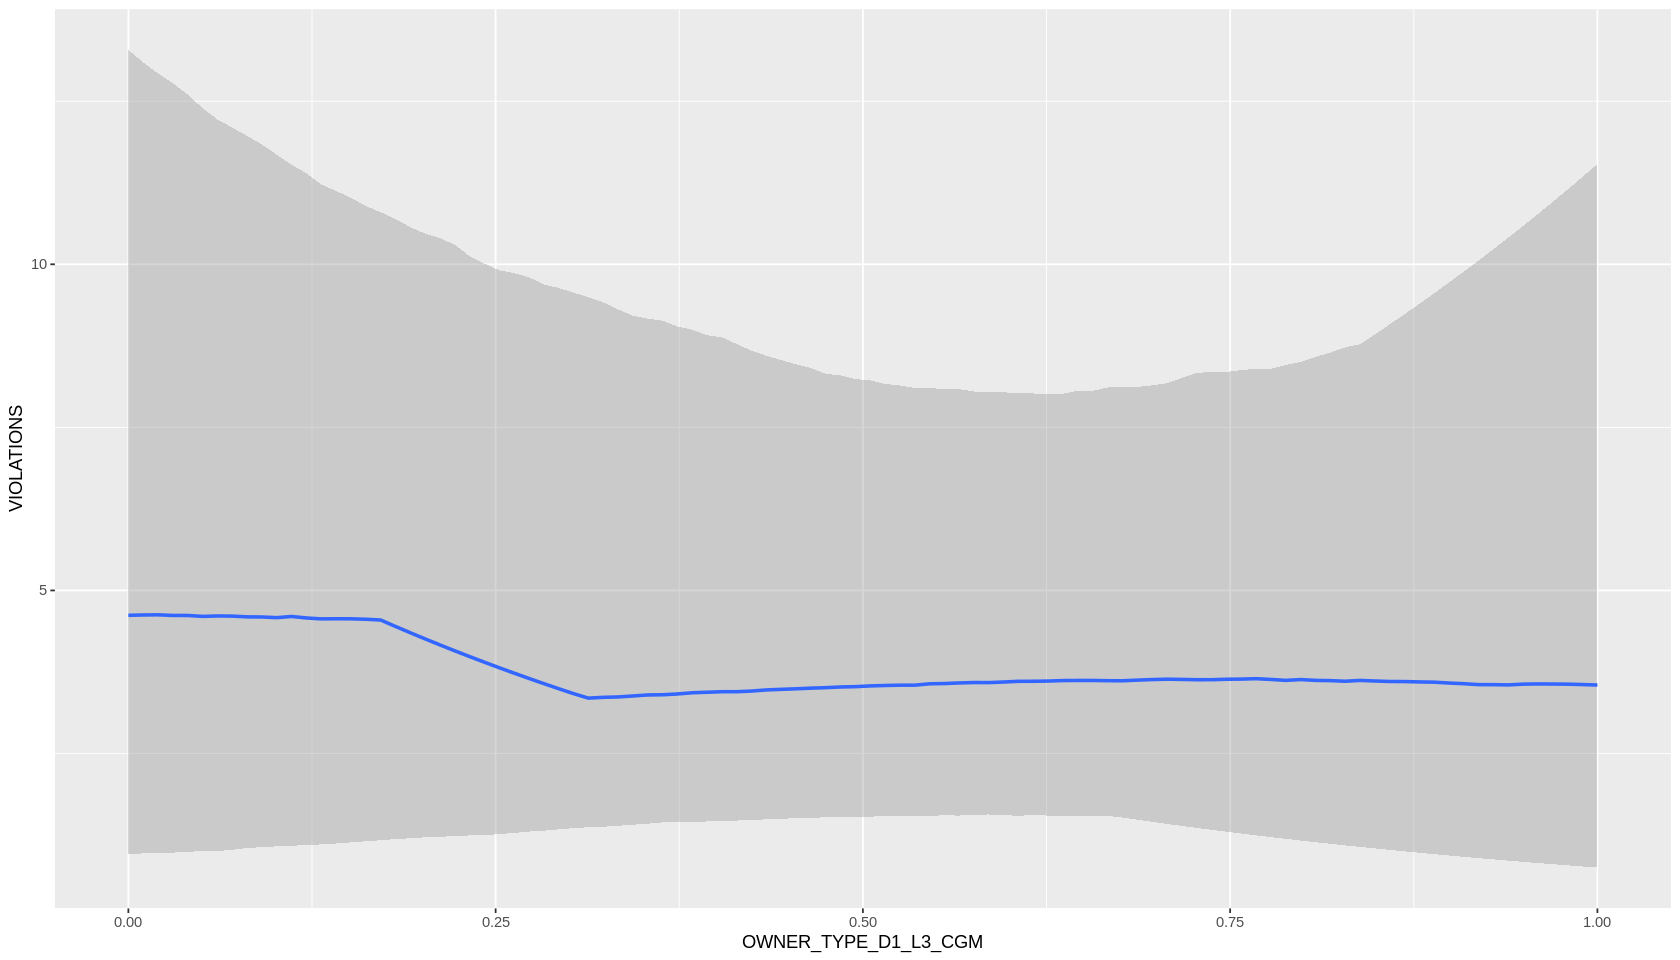

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


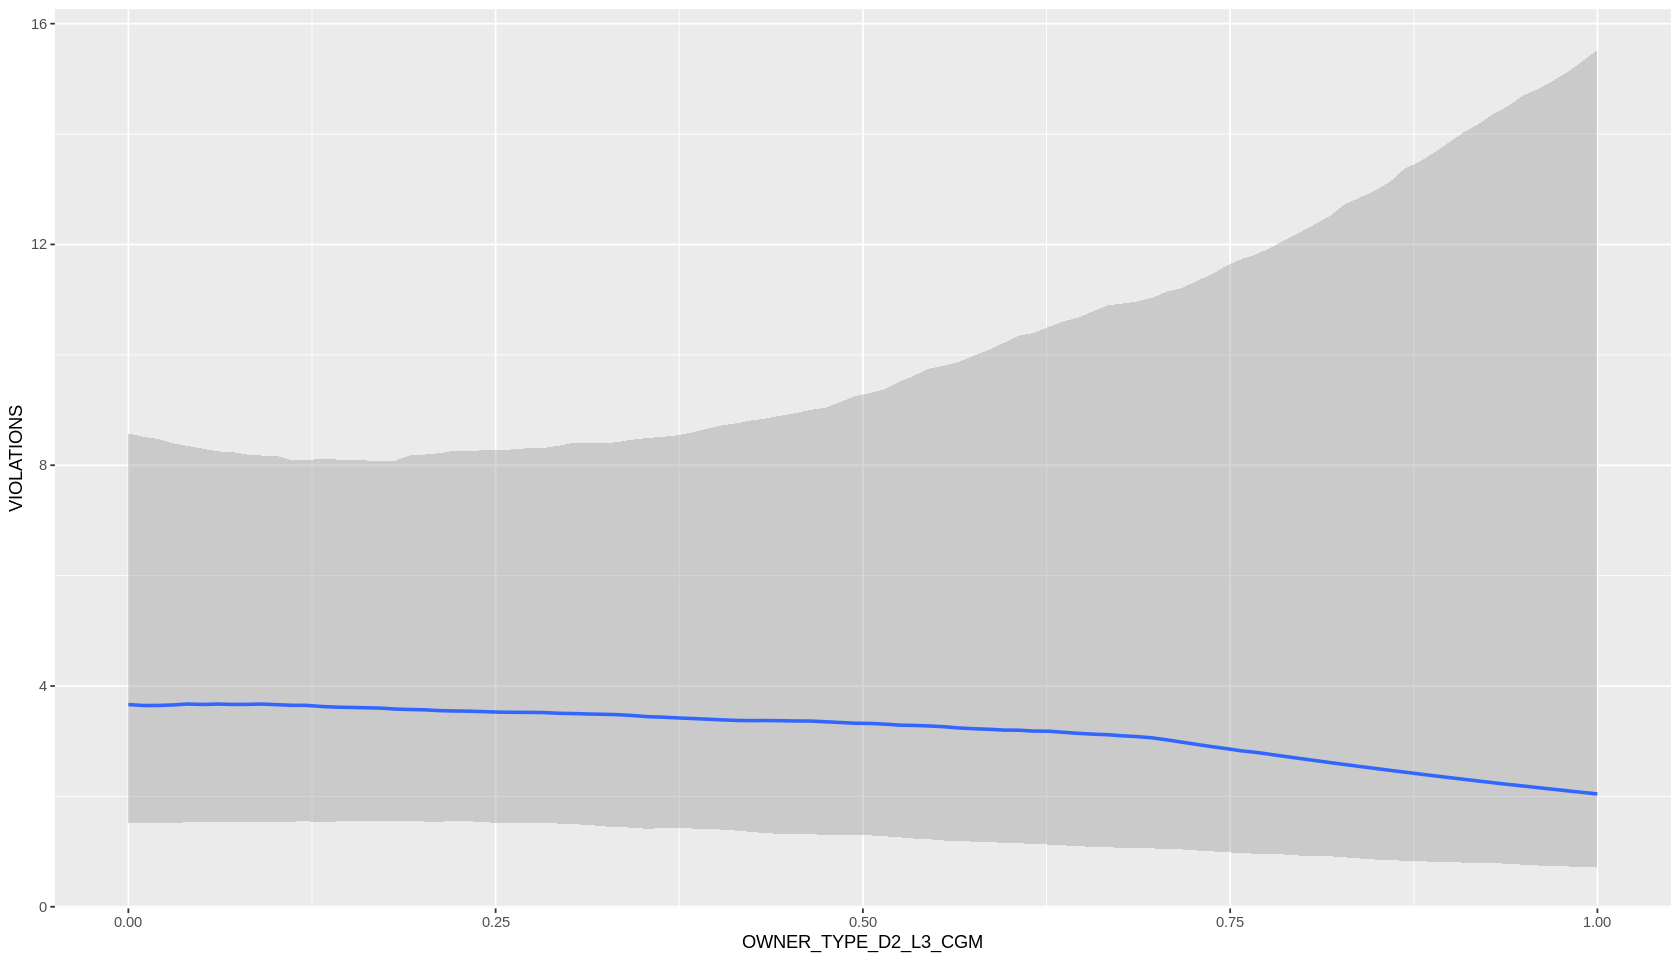

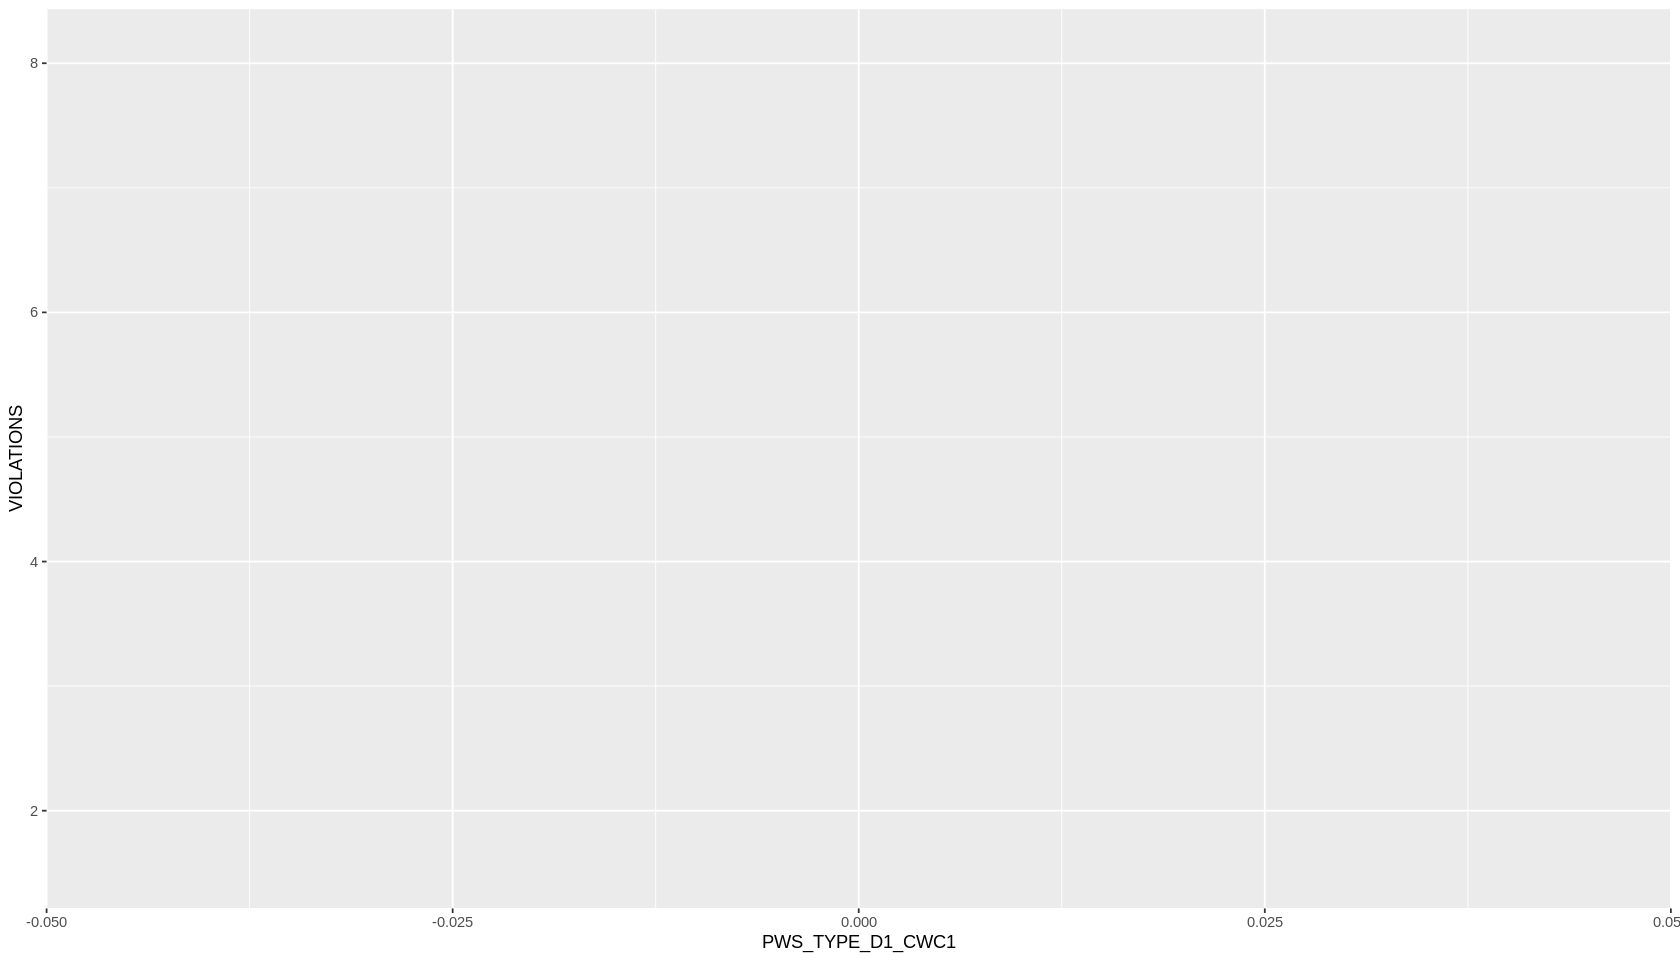

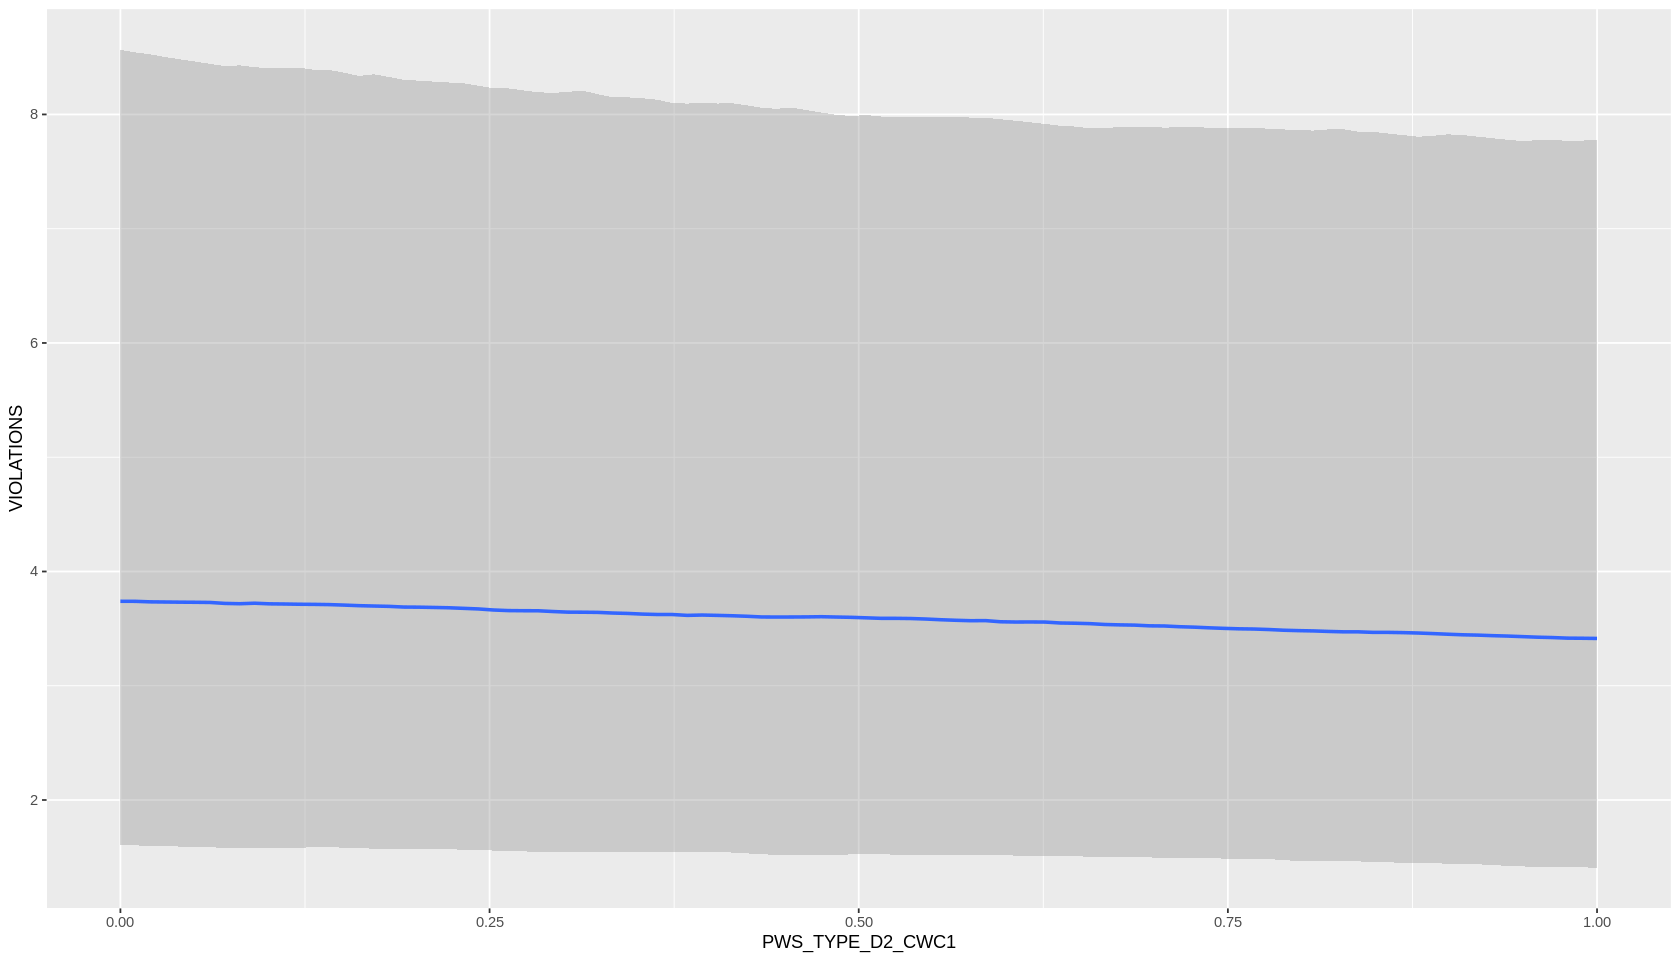

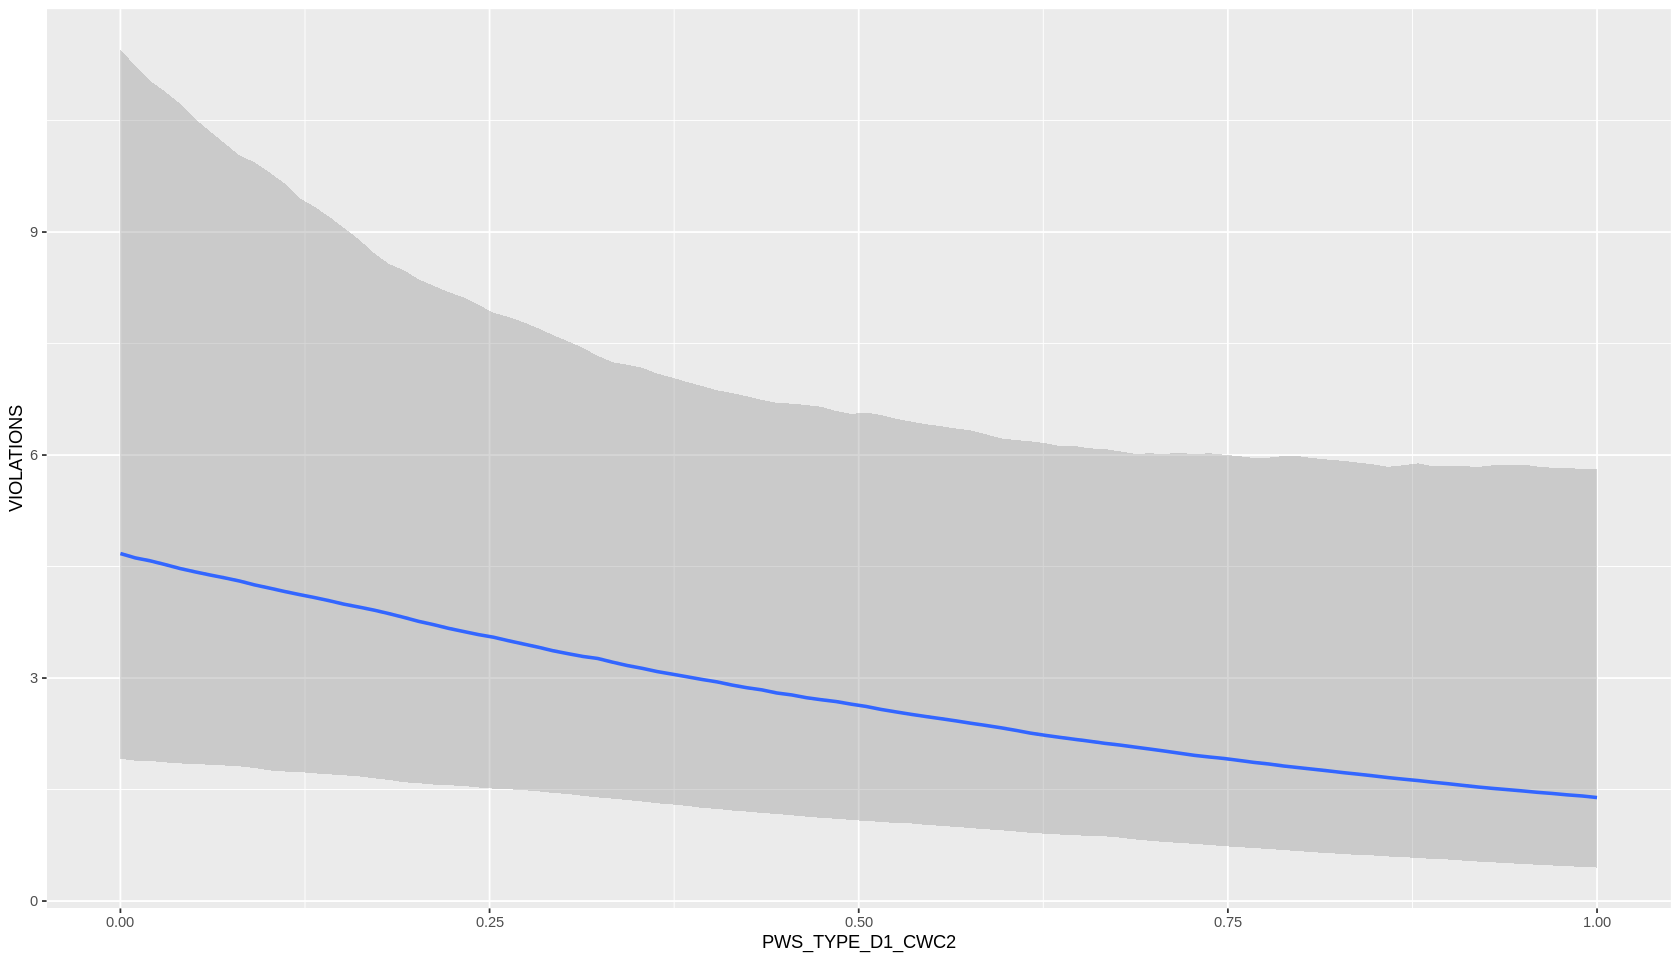

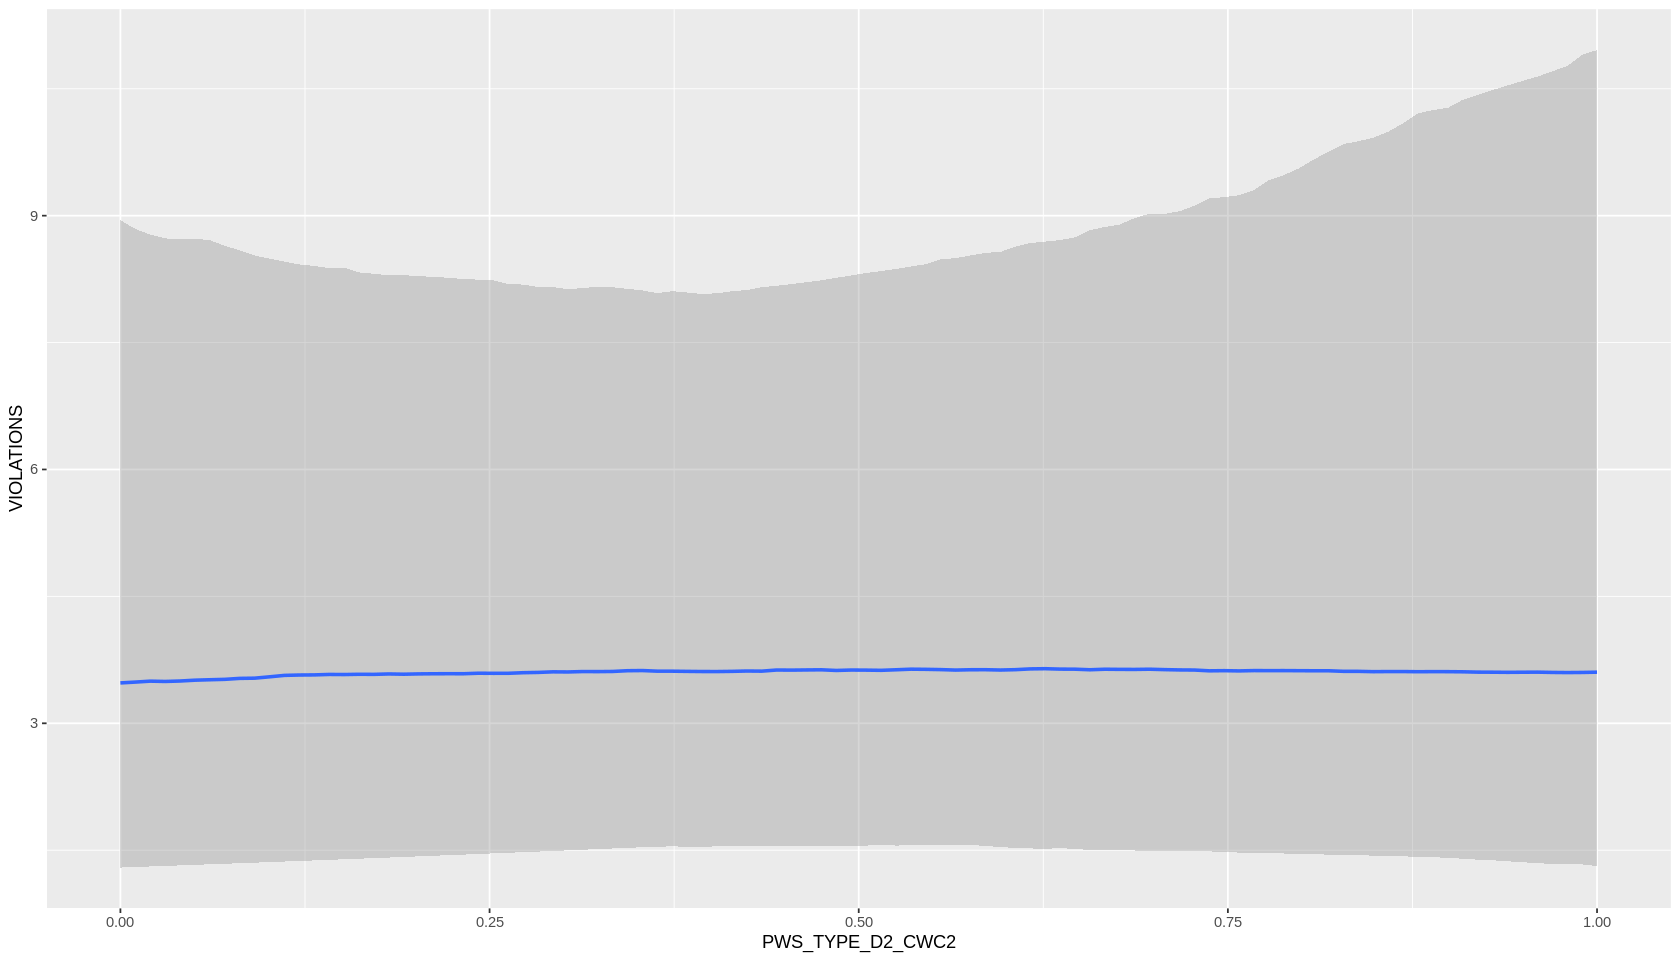

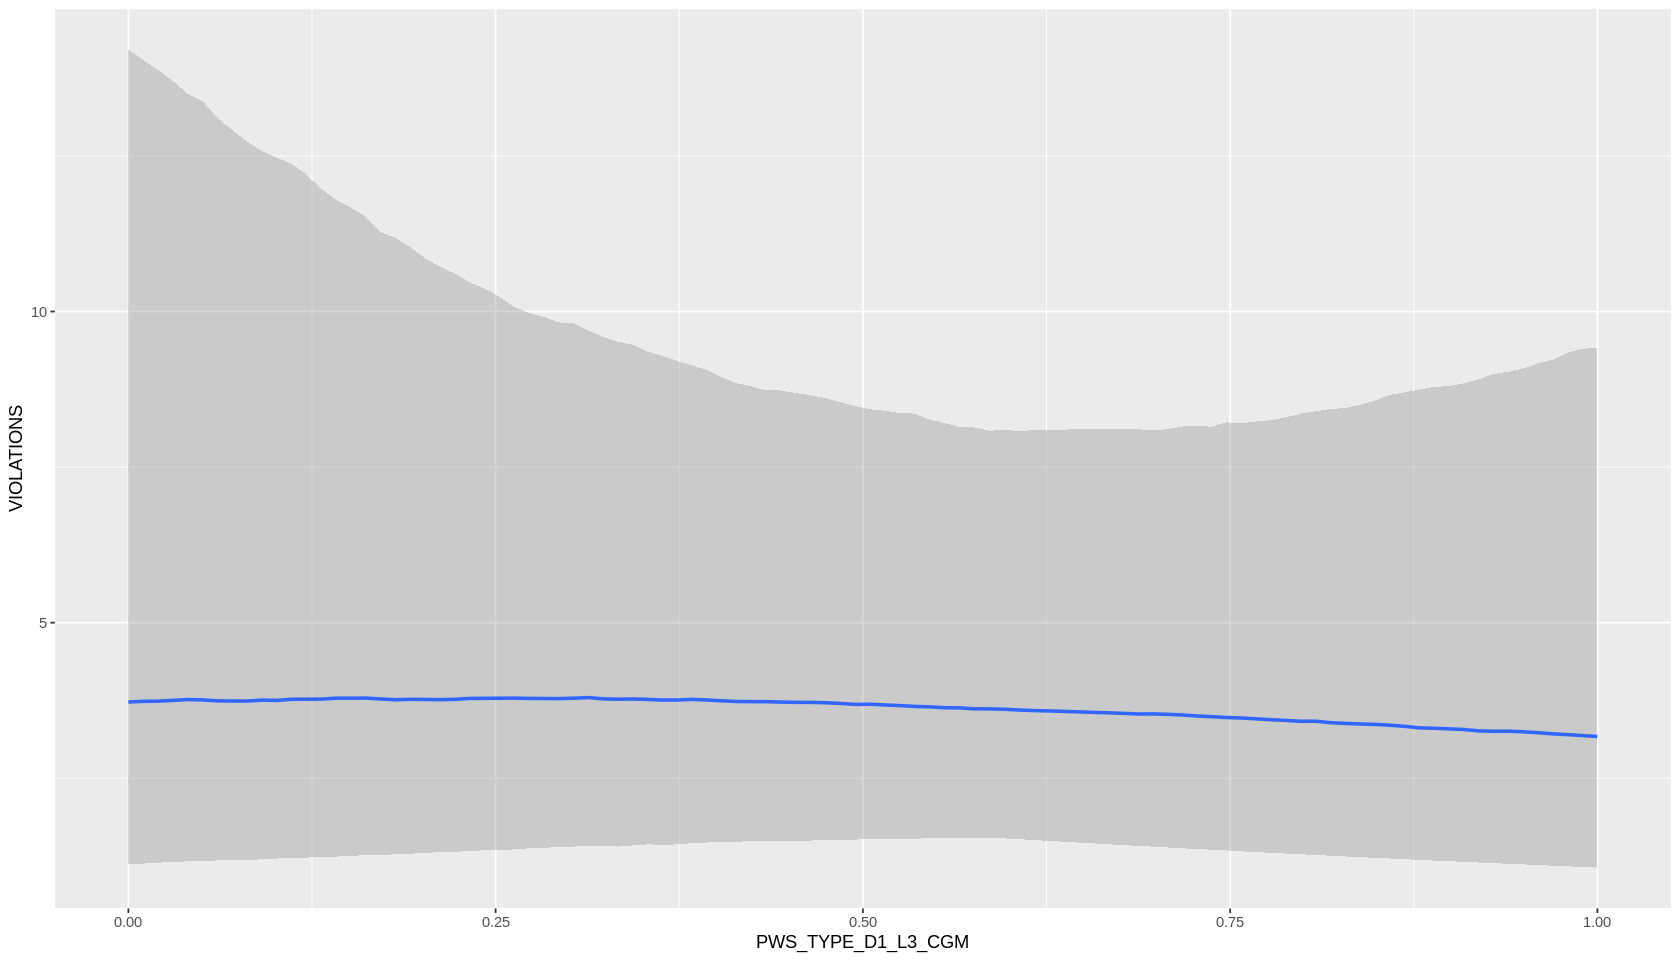

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


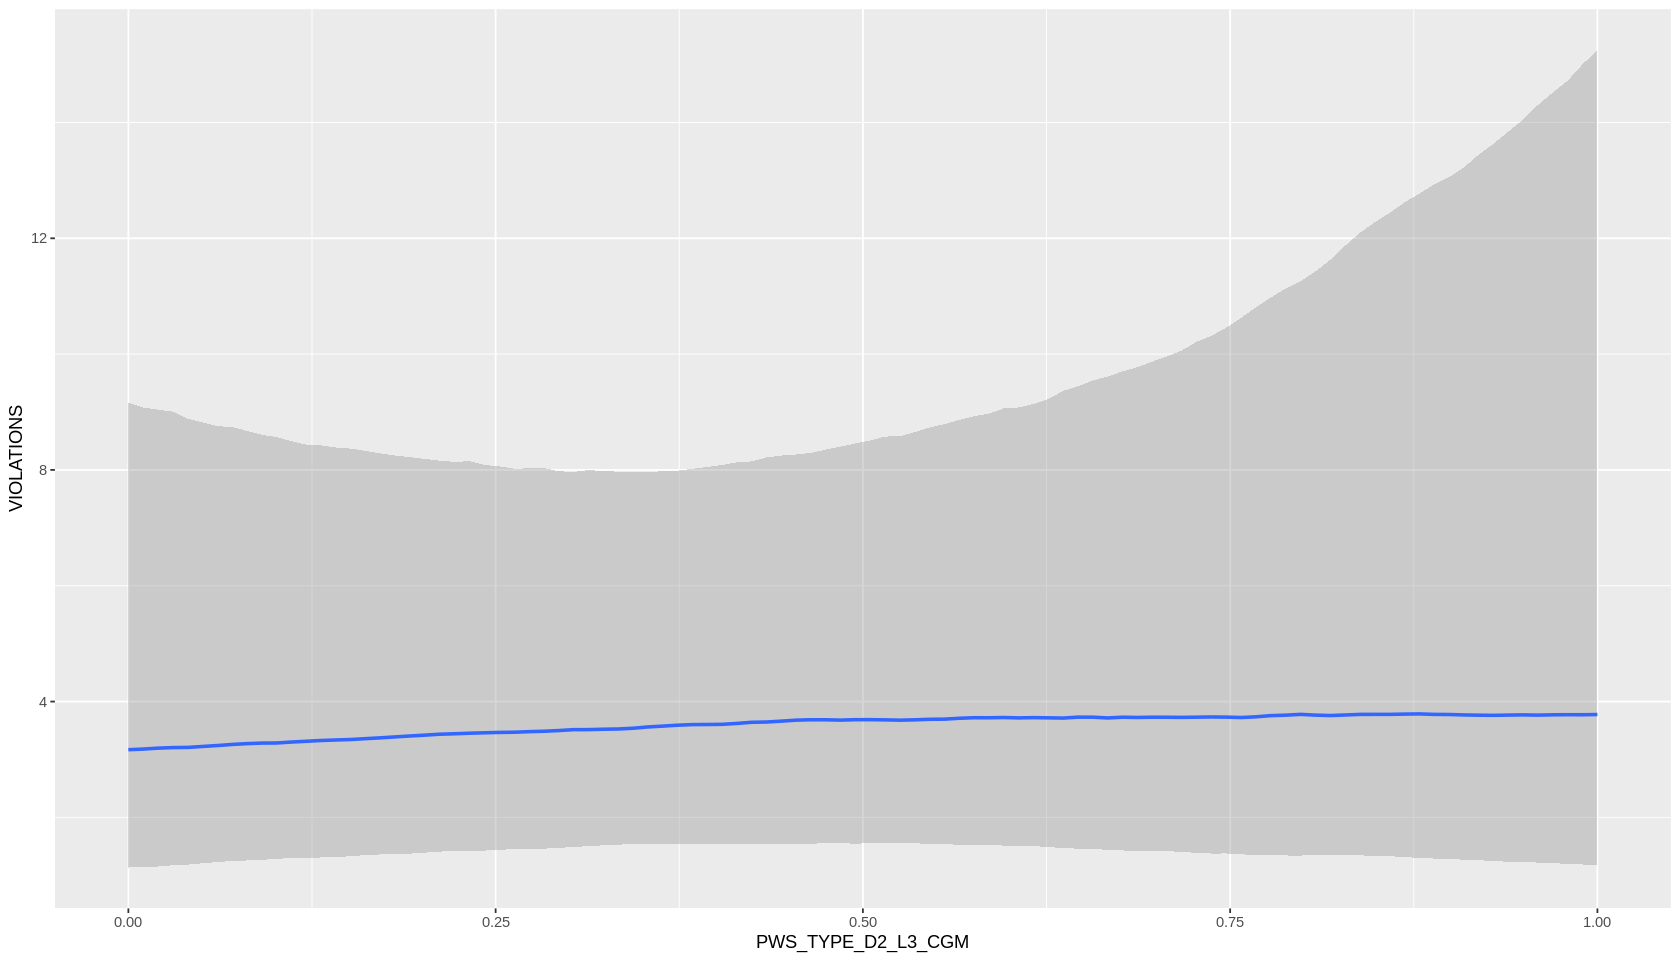

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


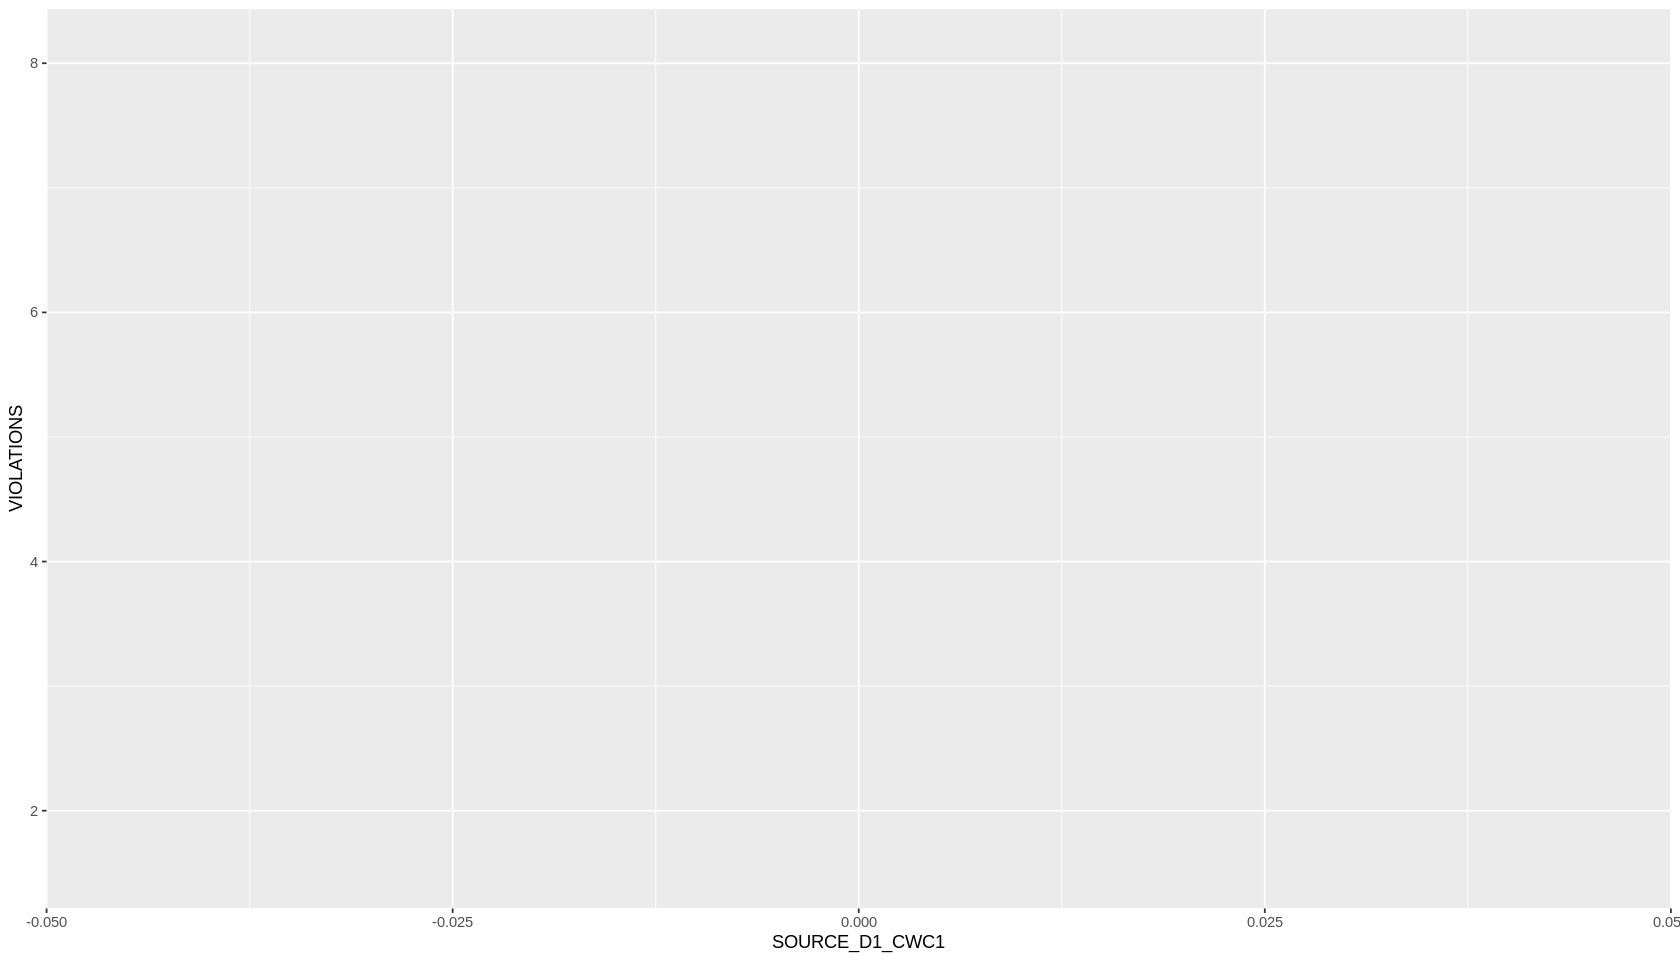

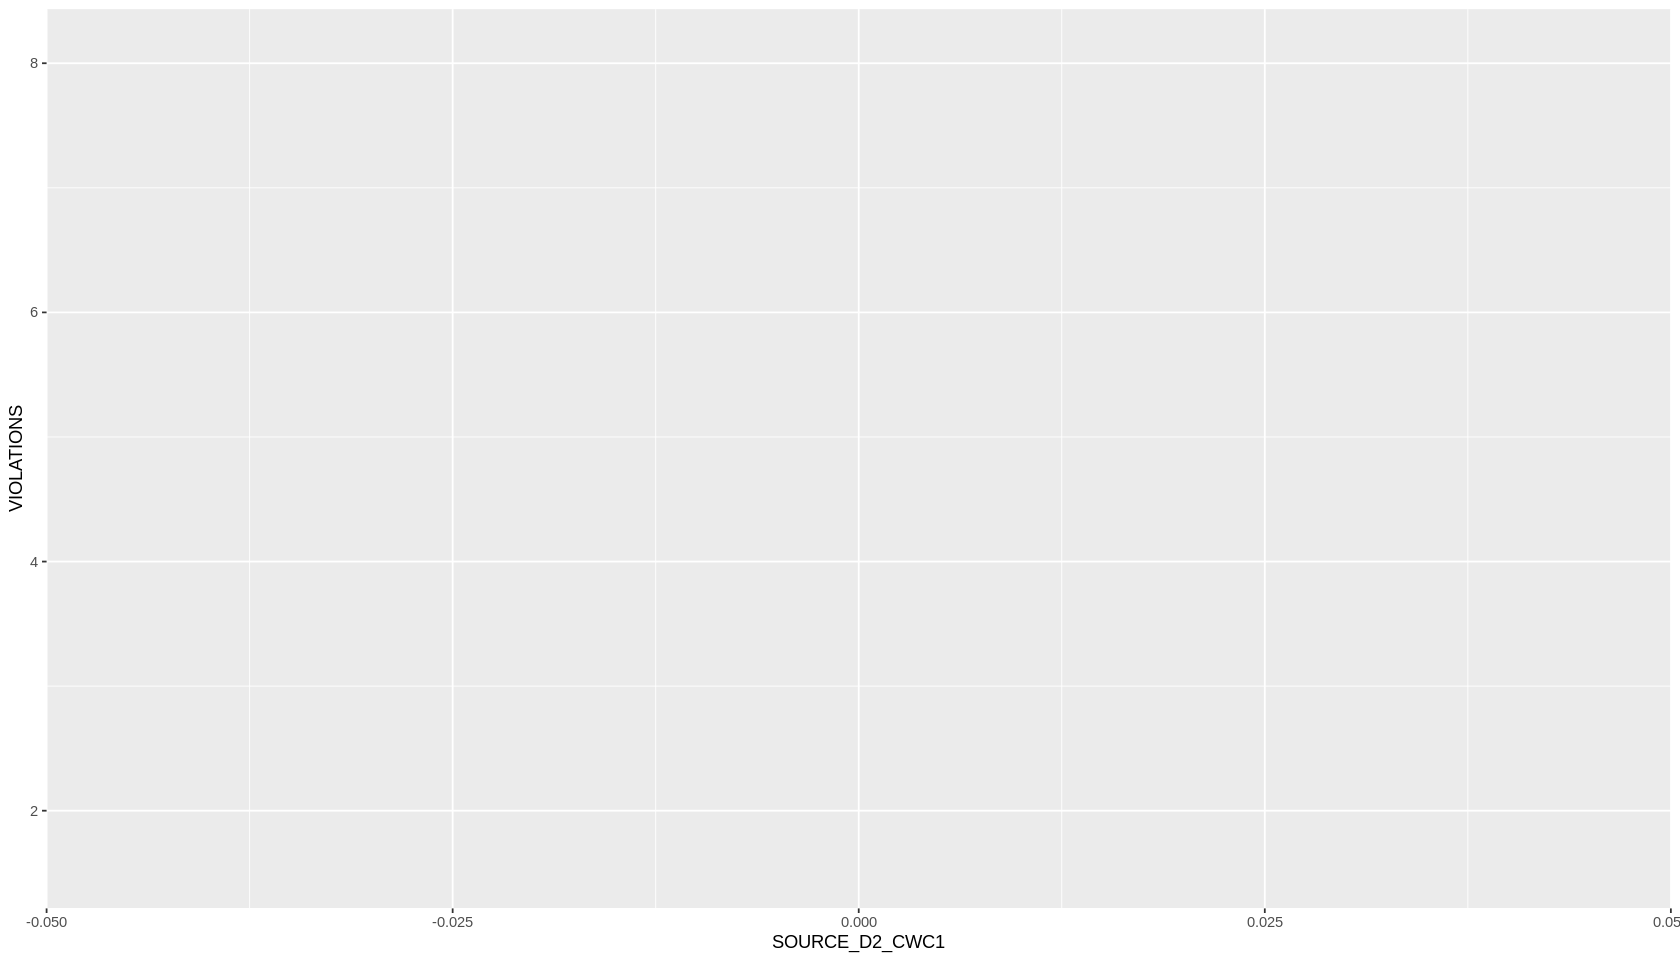

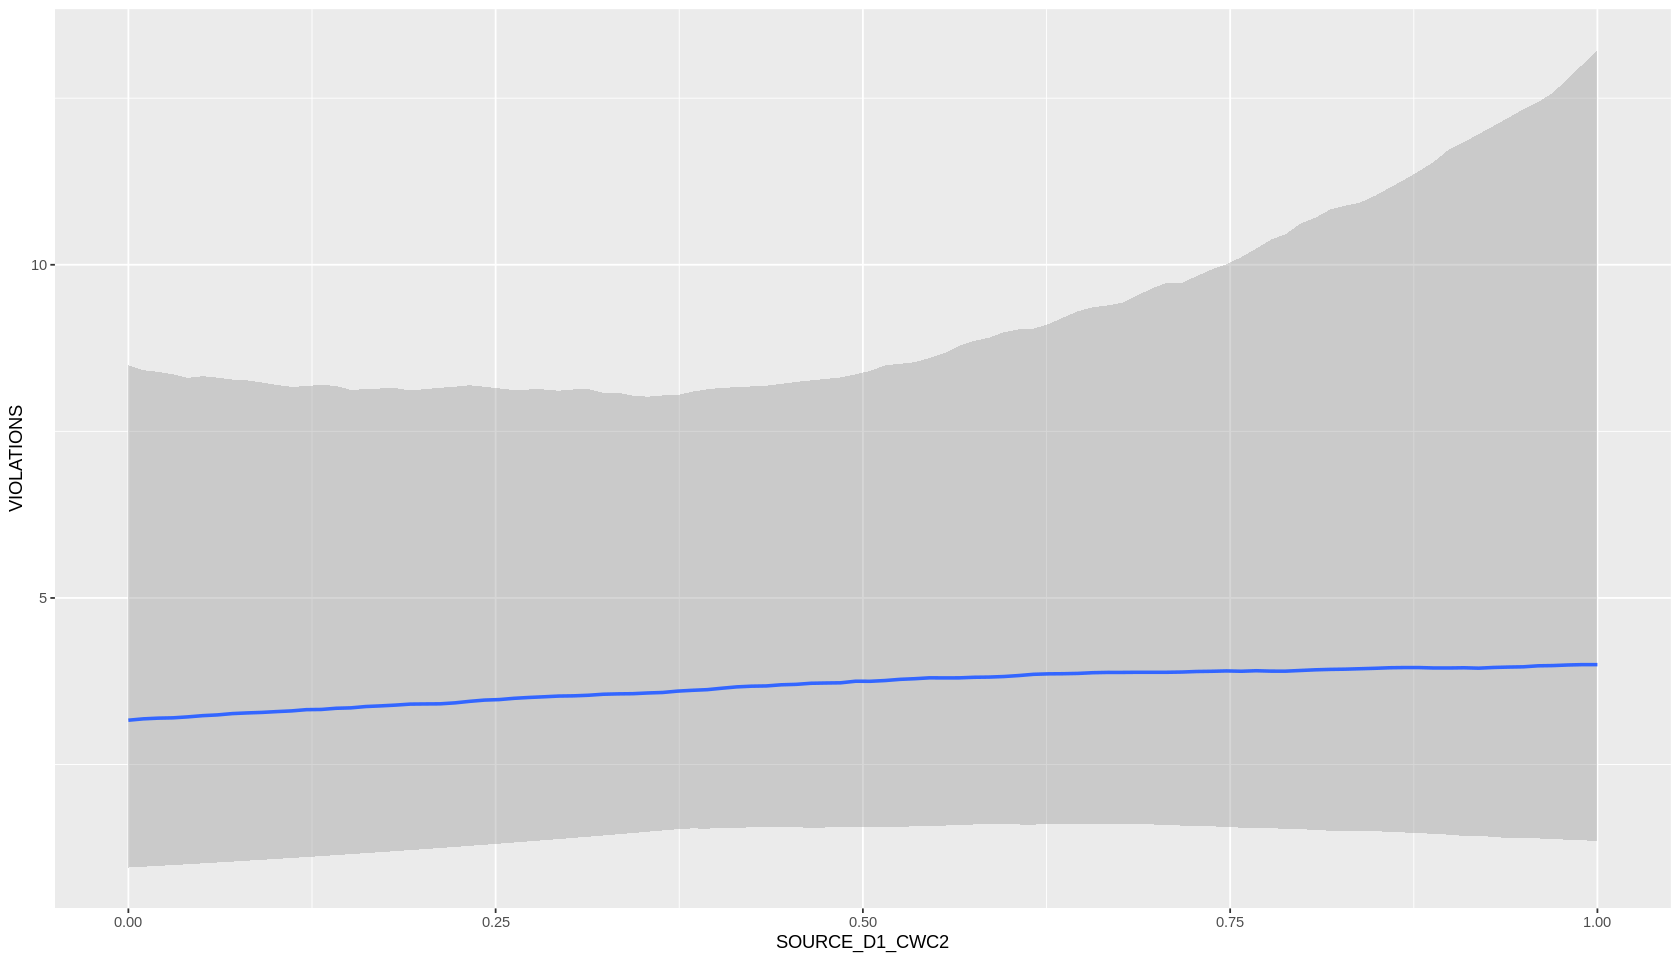

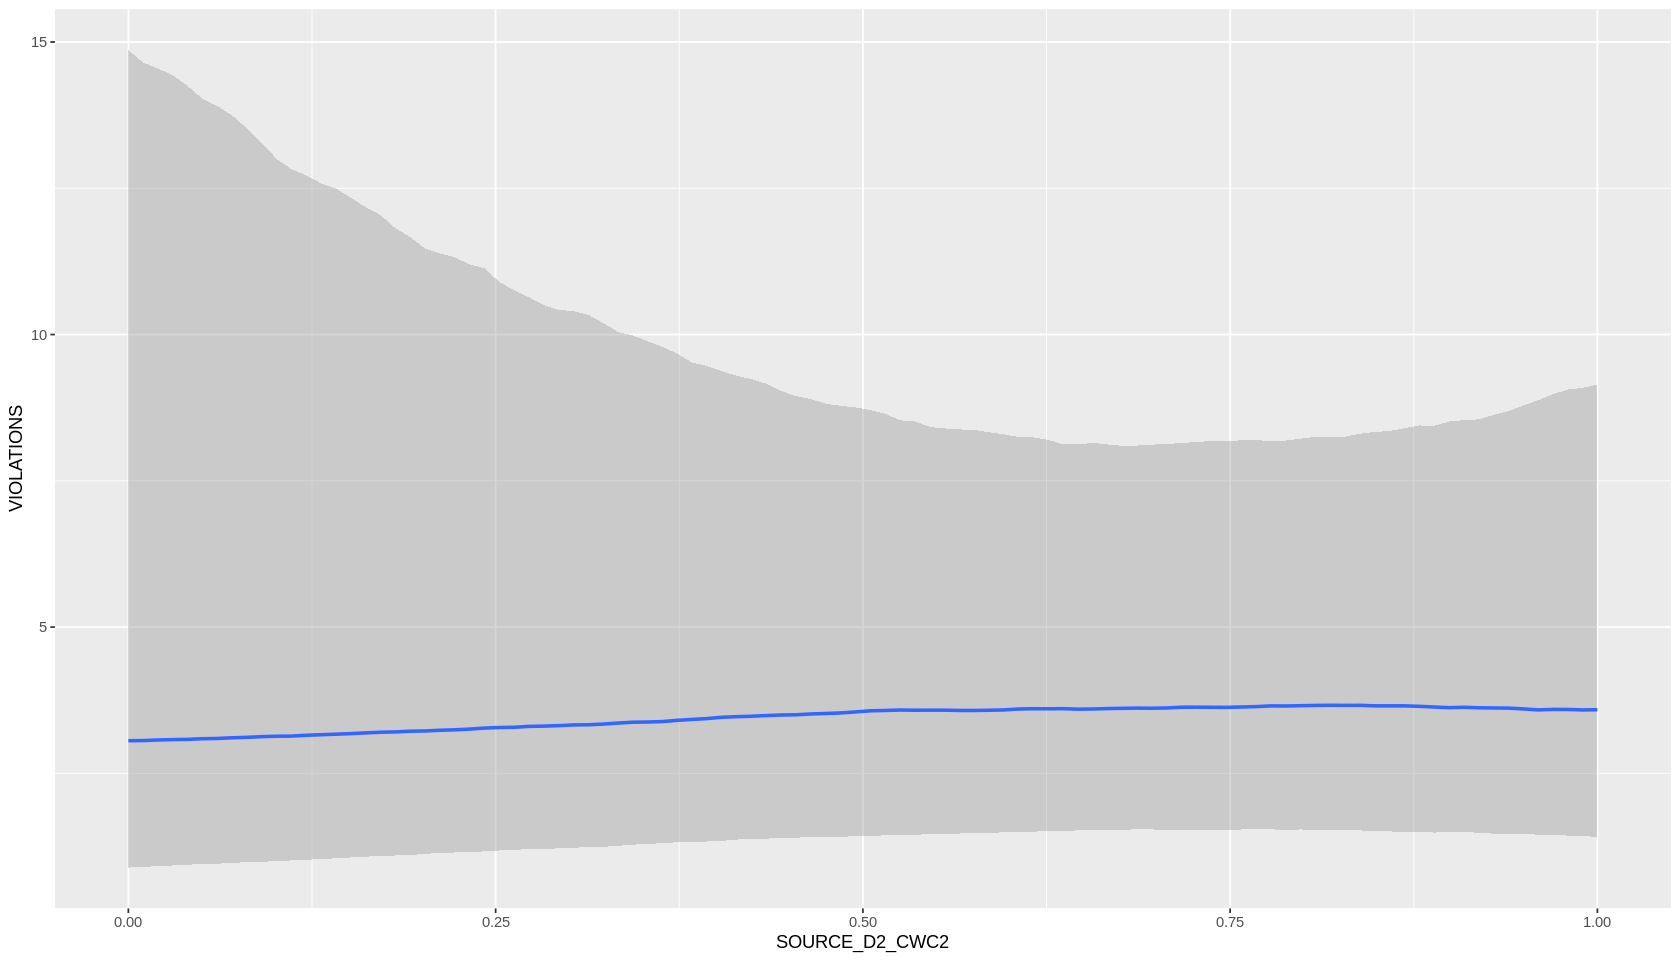

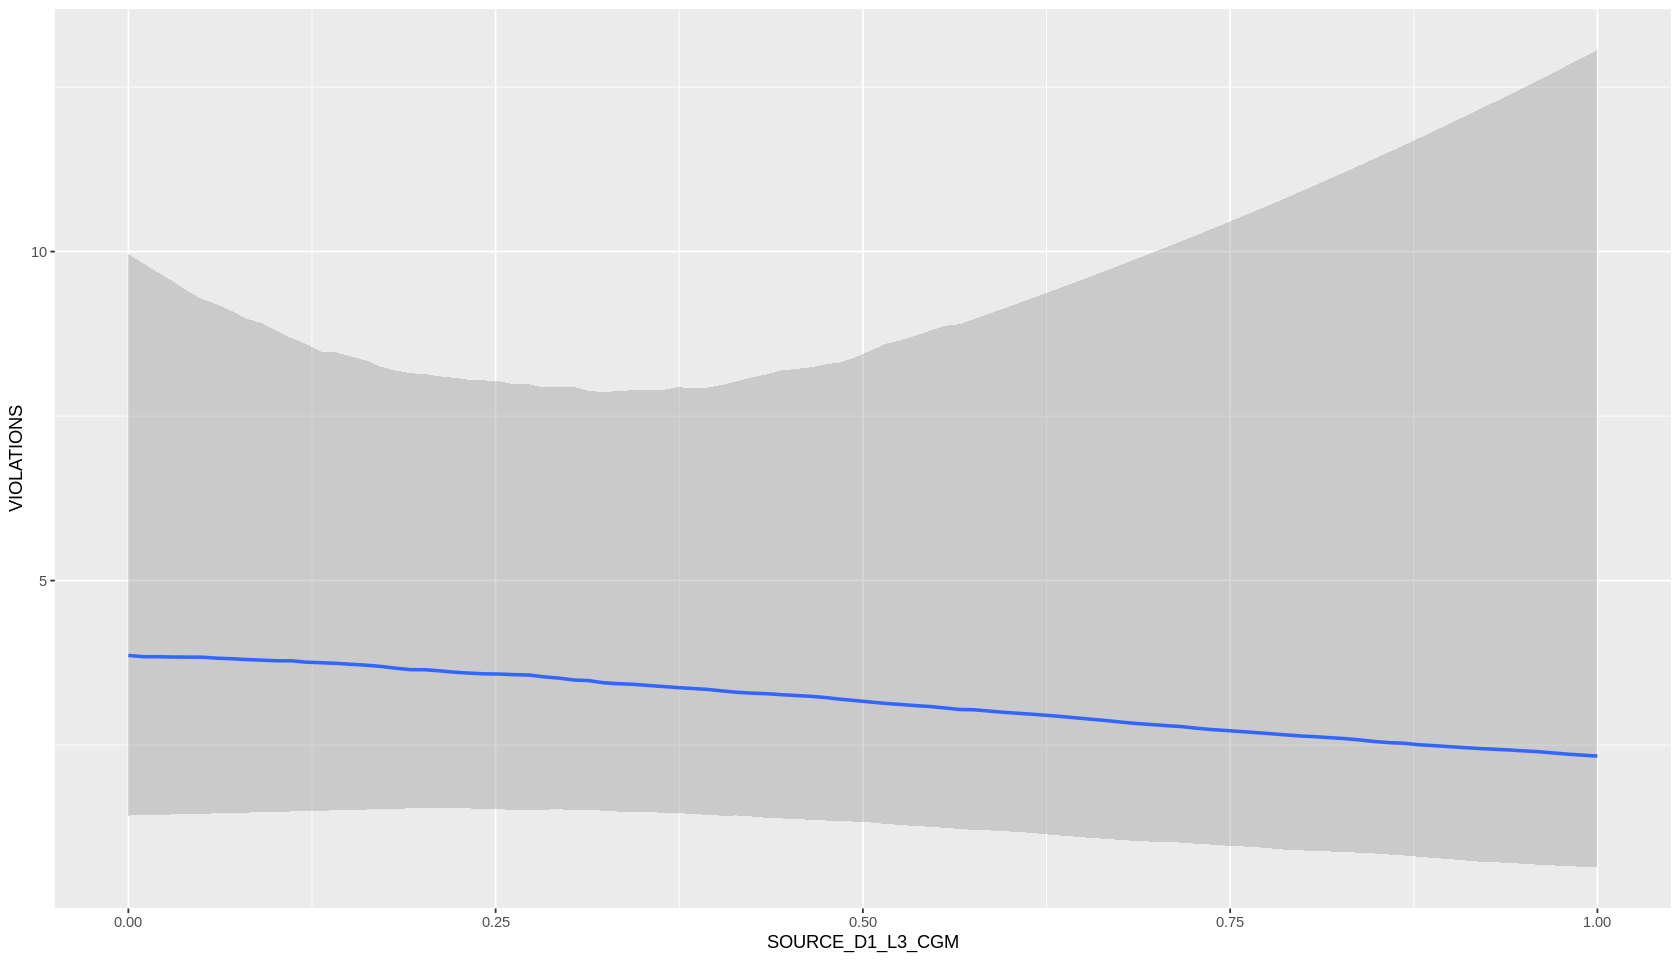

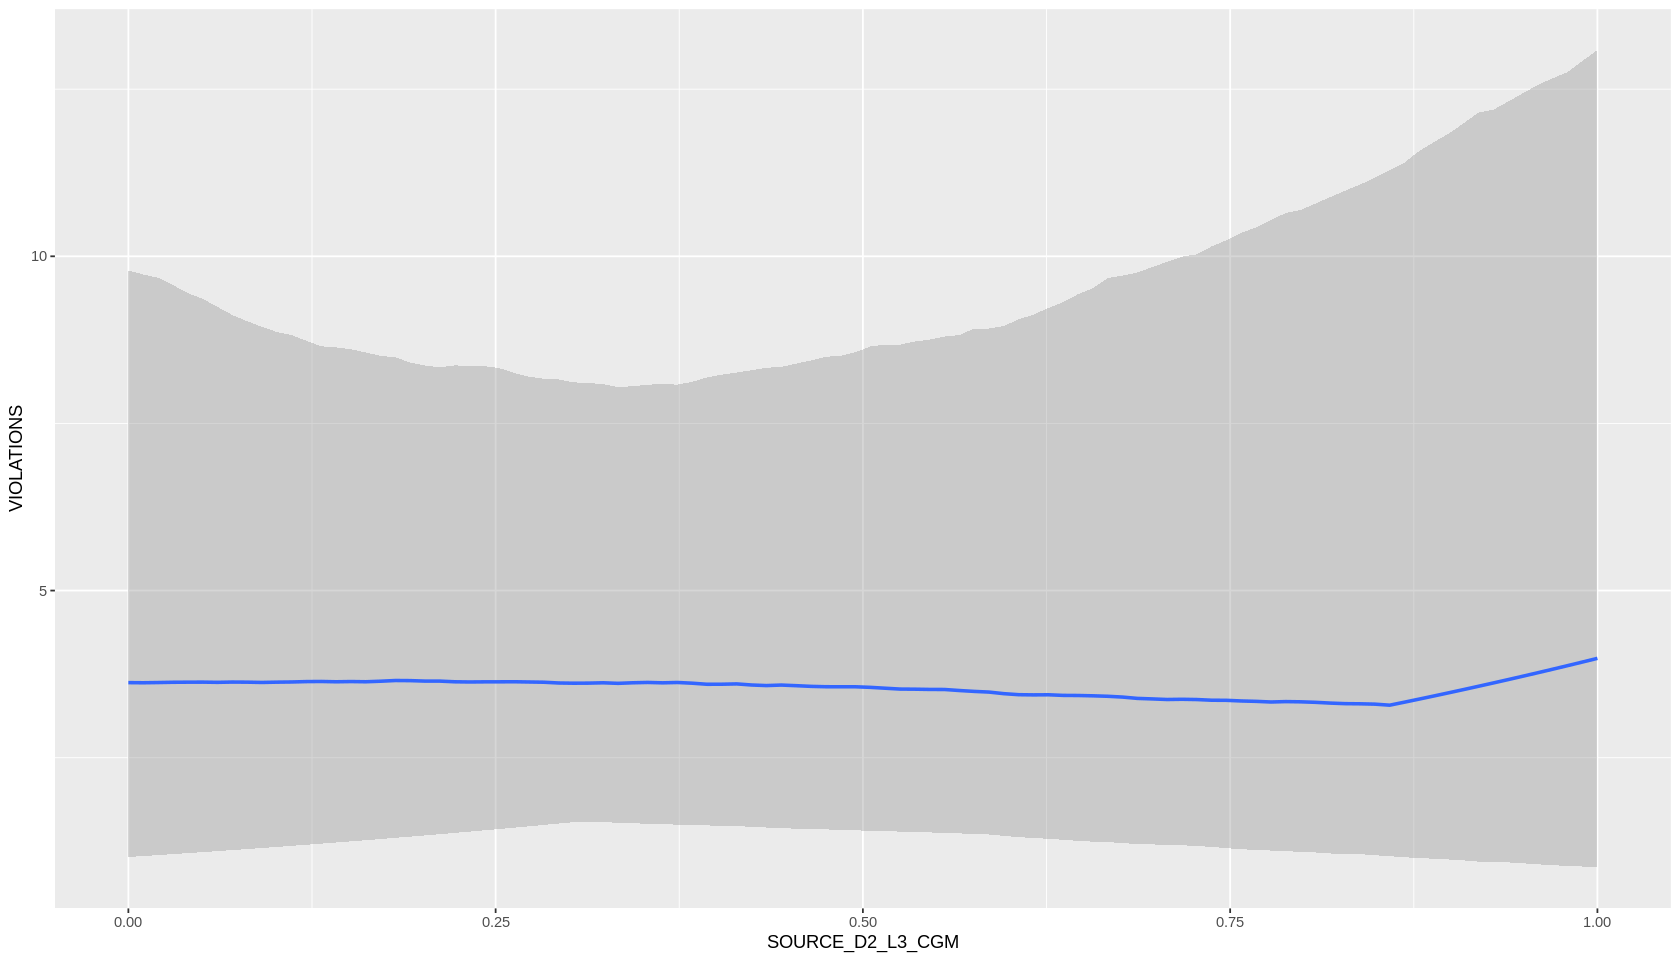

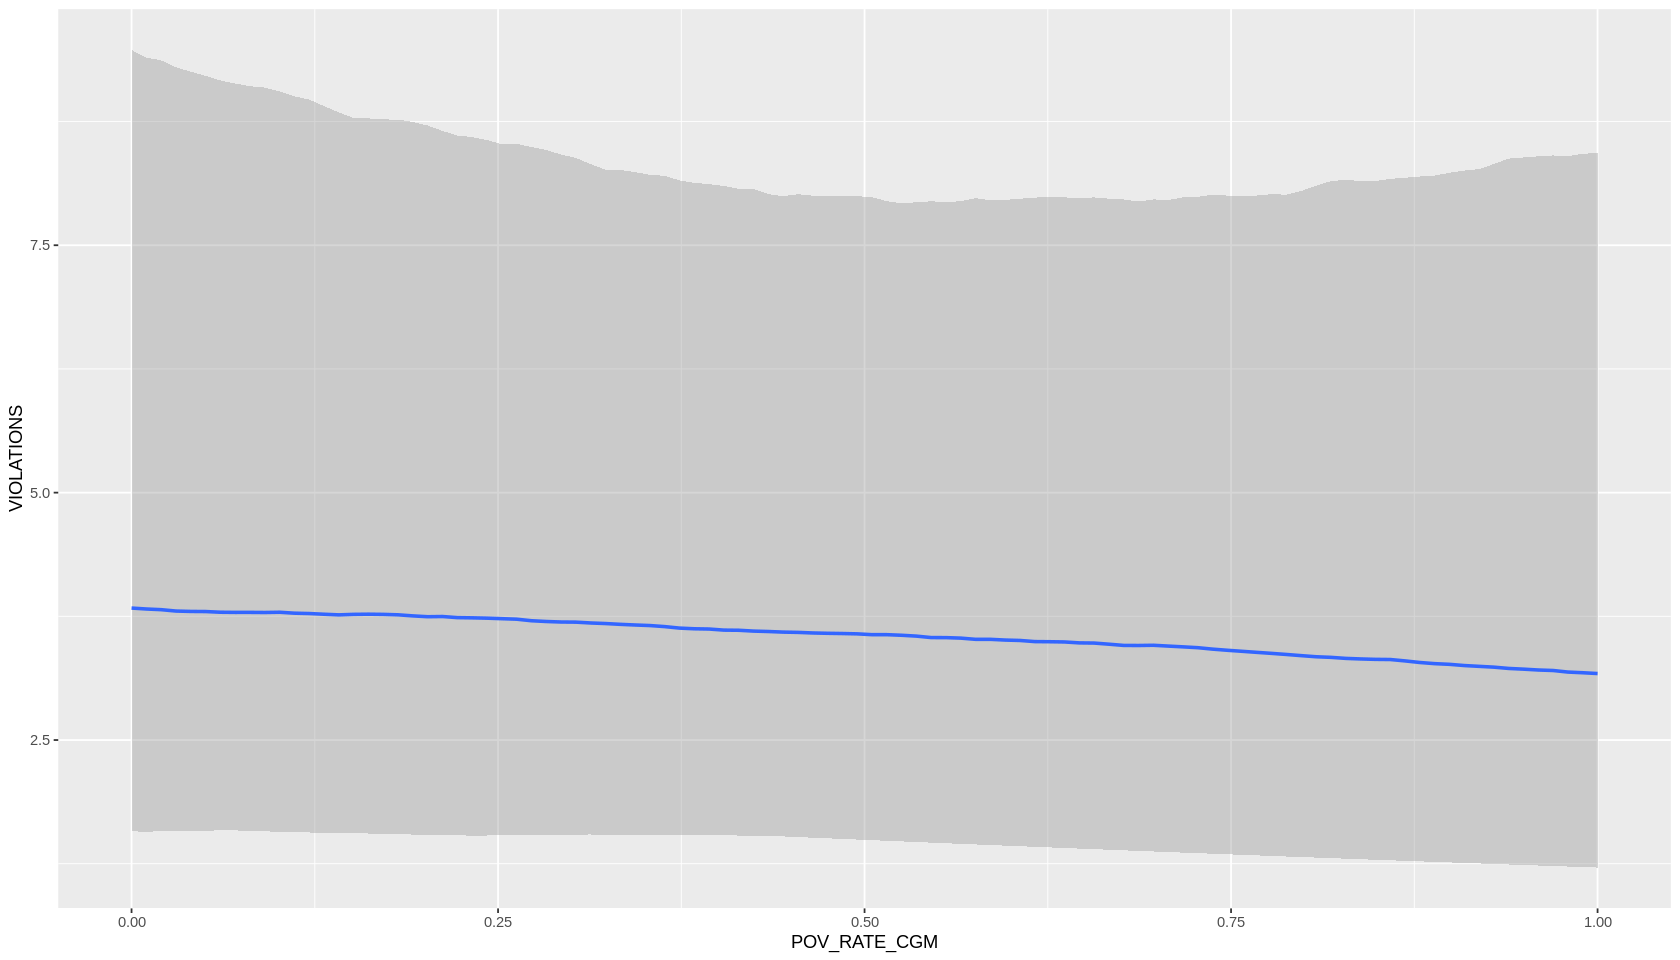

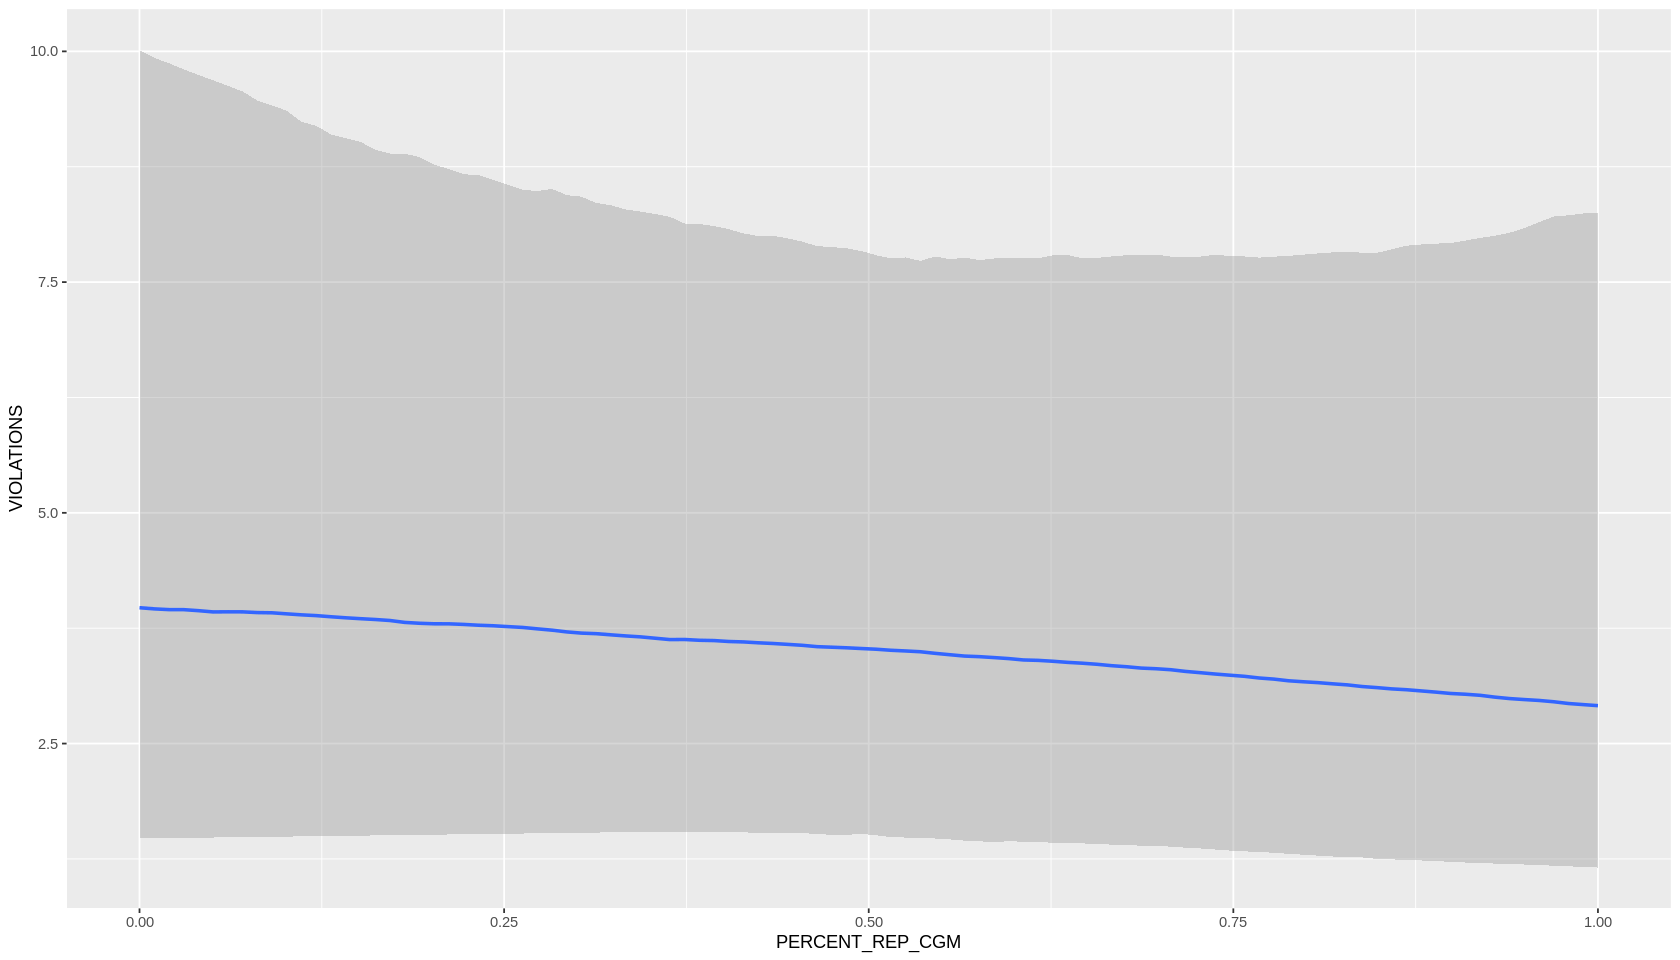

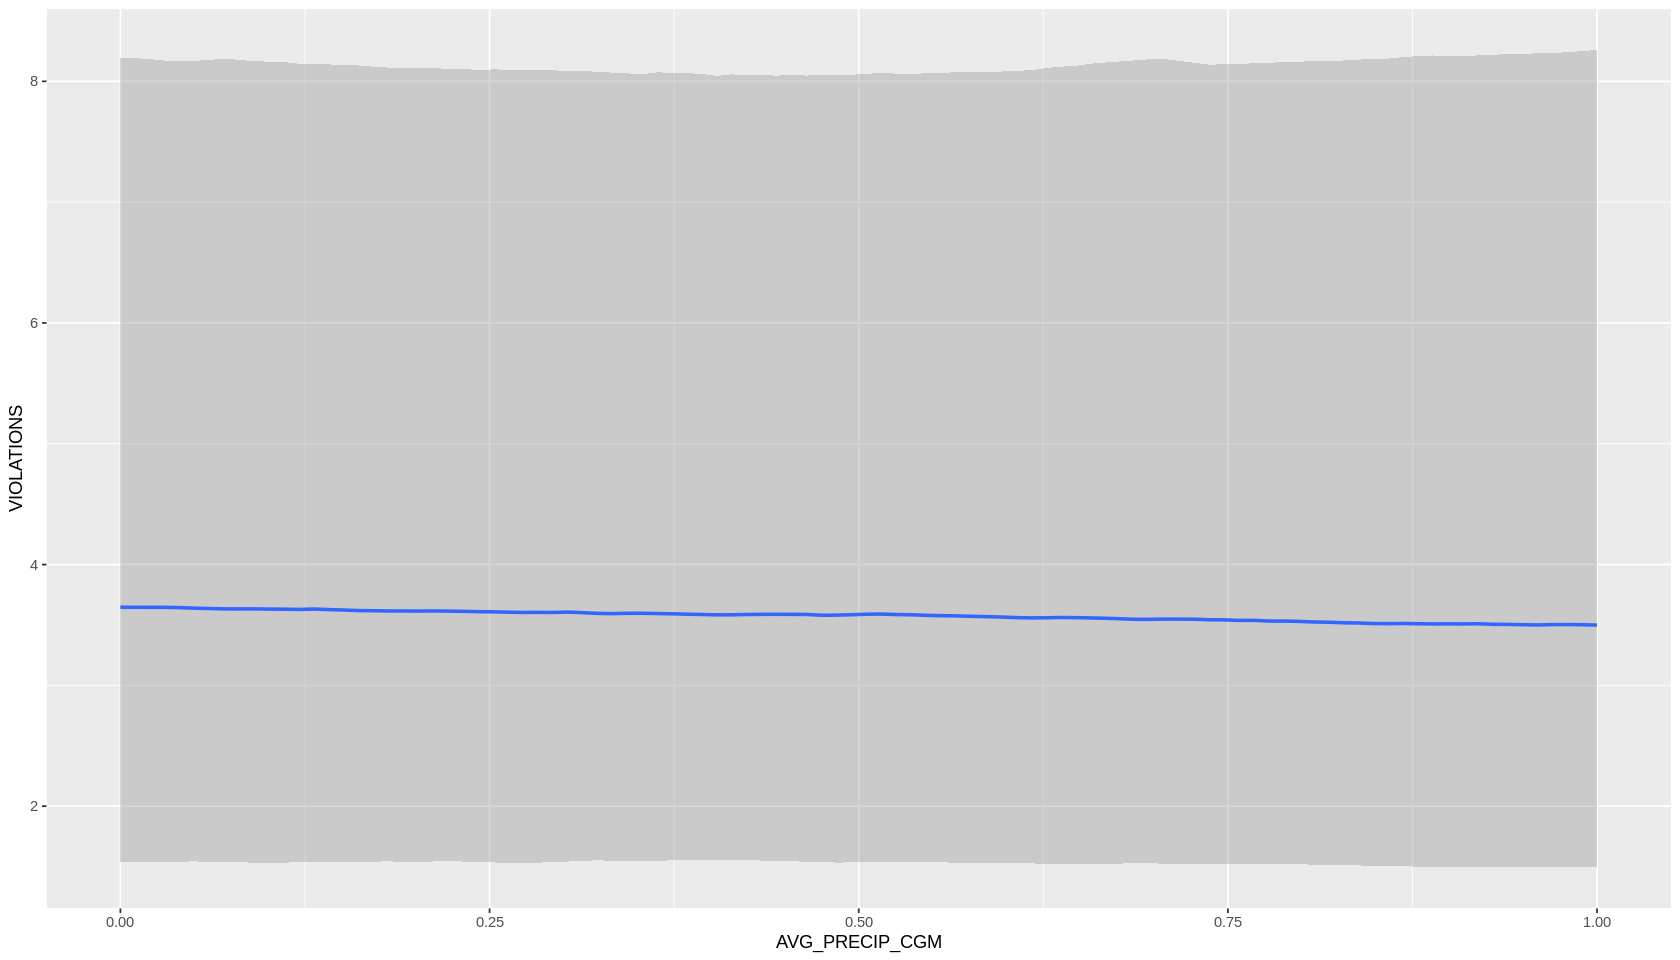

In [23]:
# Plot conditional effects
conditional_effects(rifs_model4_brms)

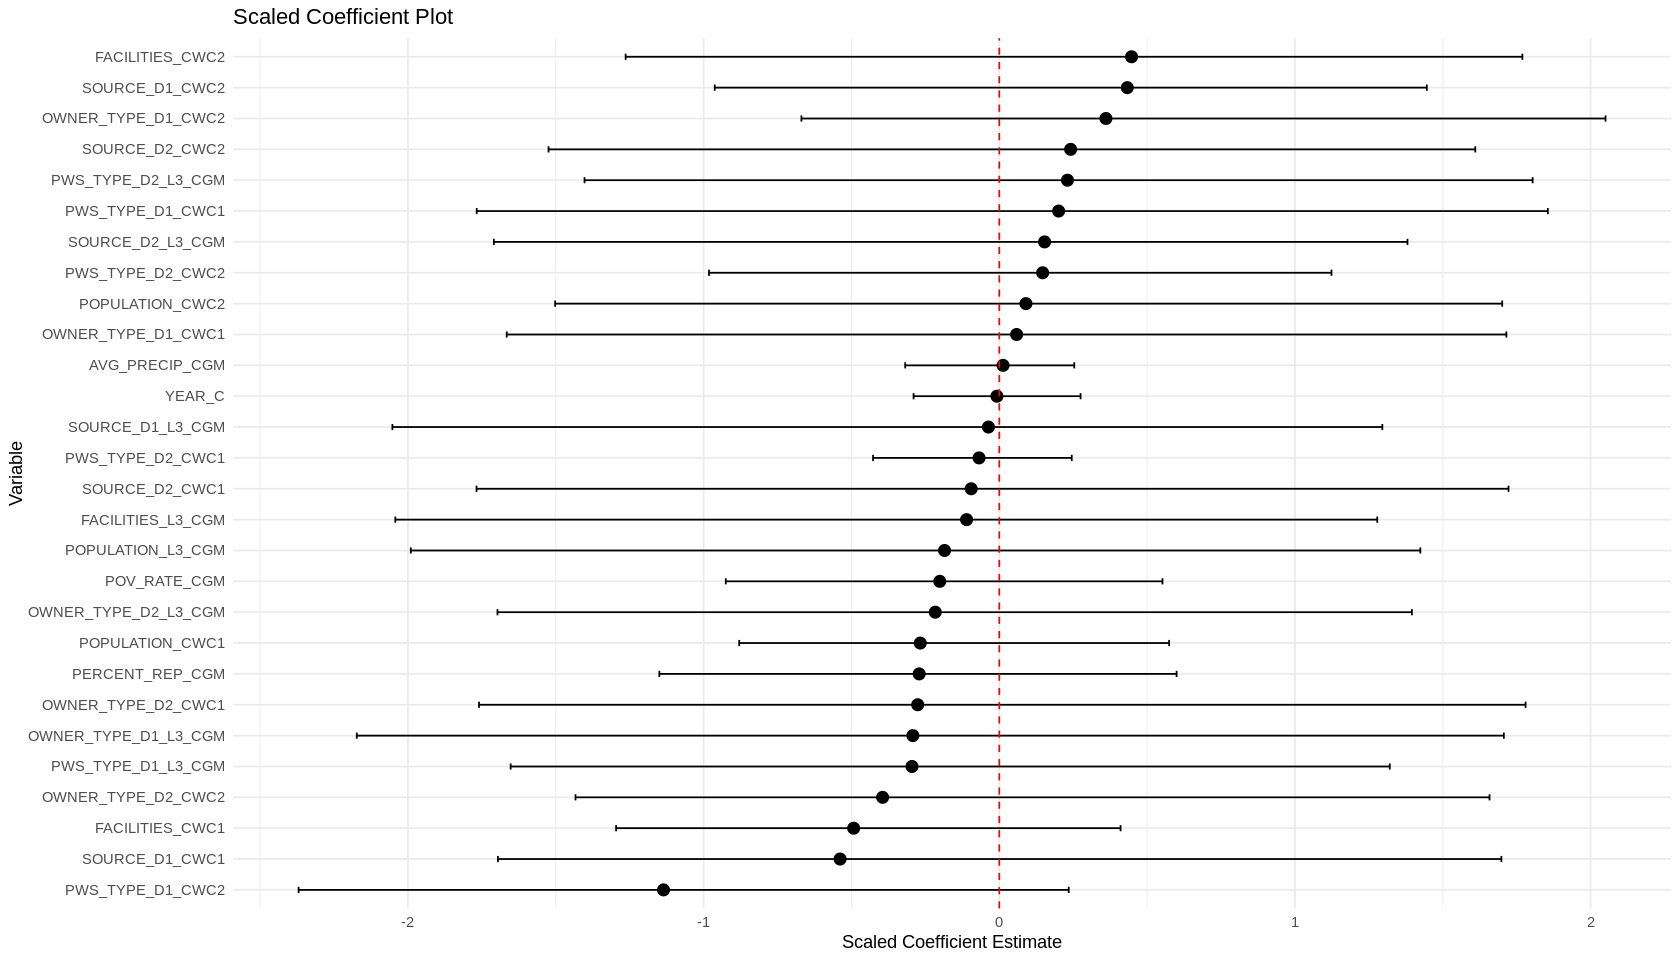

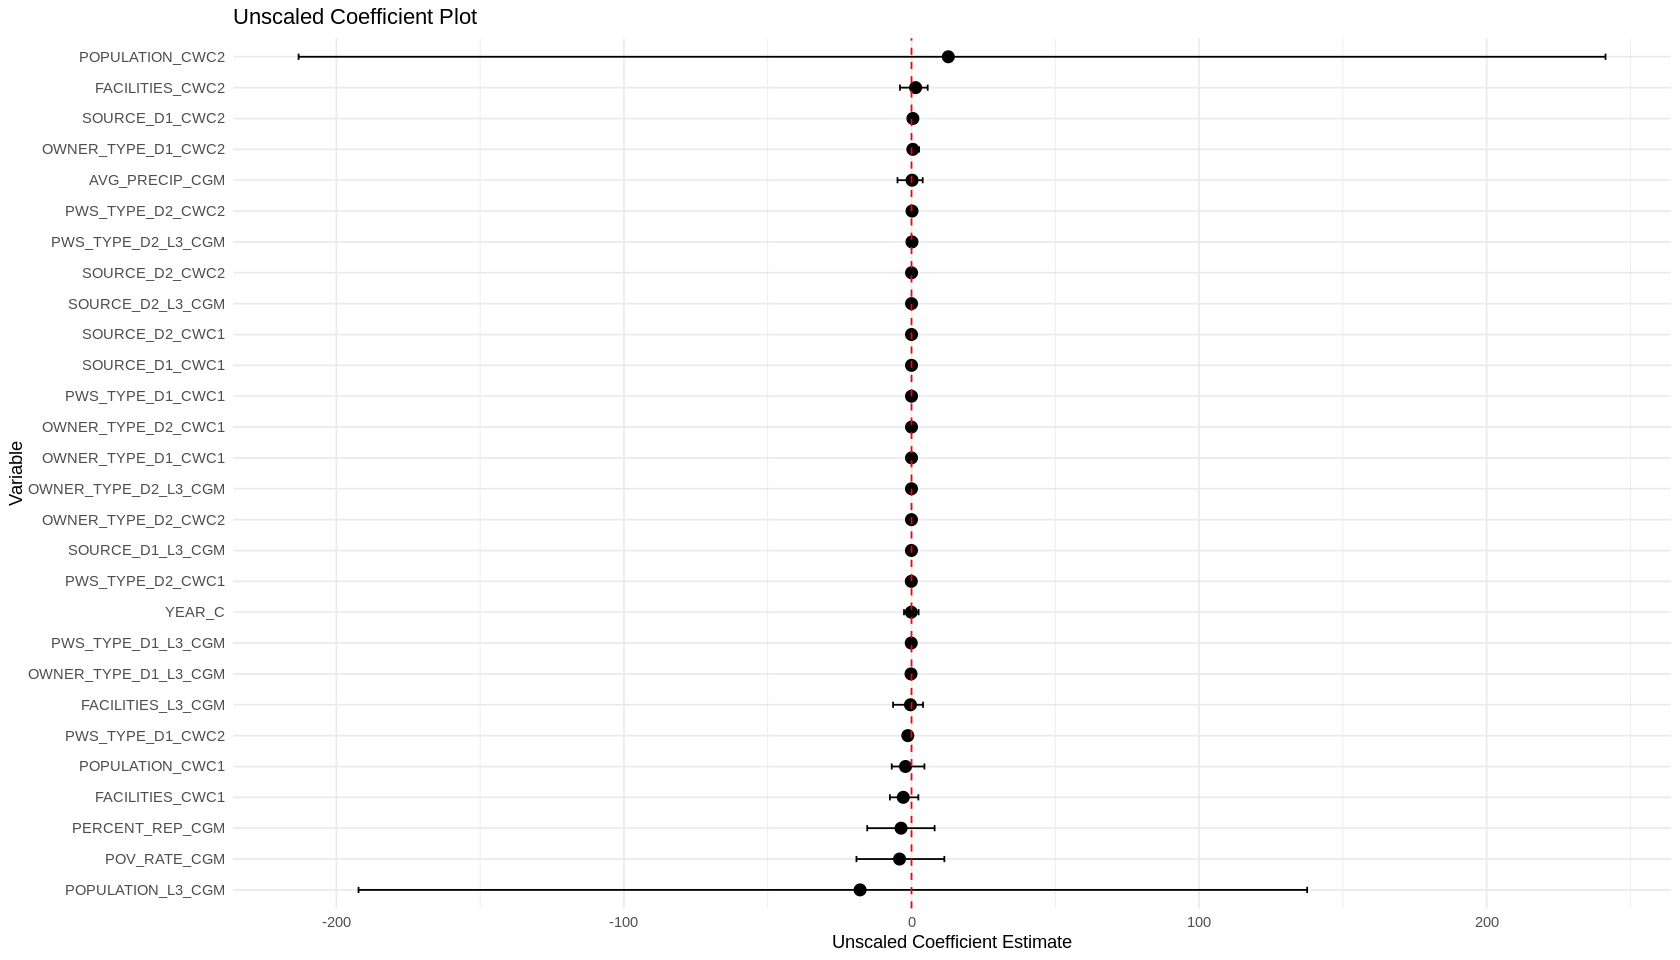

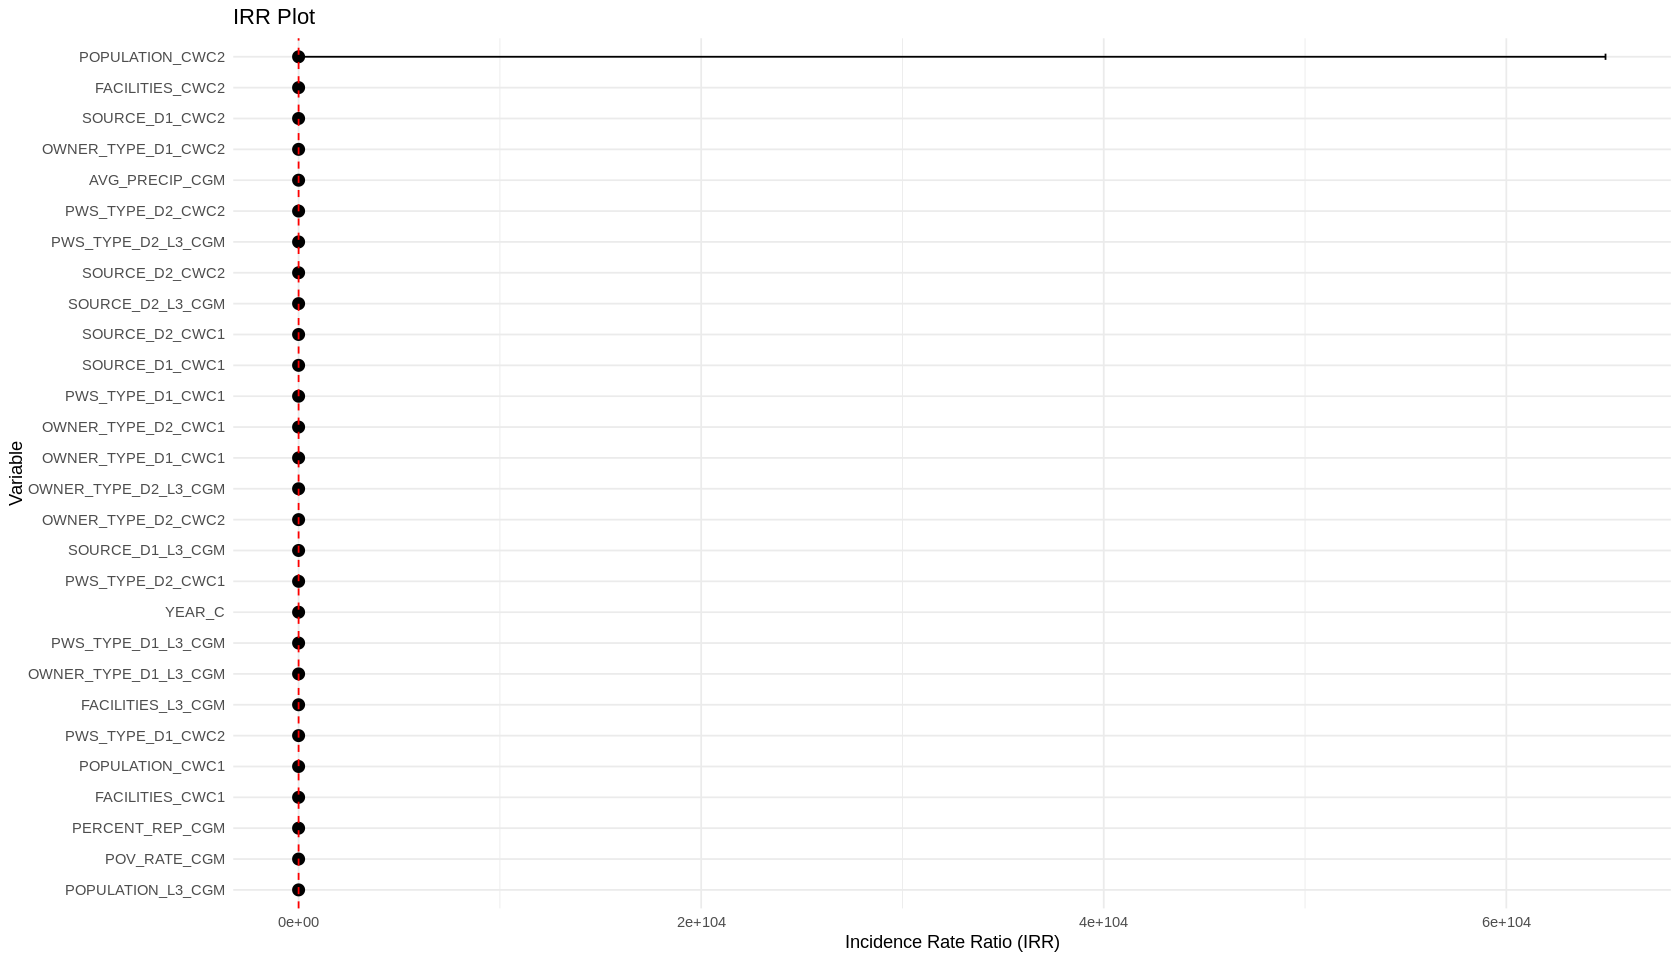

In [41]:
# Plot scaled coefficients
ggplot(coef_df, aes(x = Scaled_Coefficient, y = reorder(rownames(coef_df), Scaled_Coefficient))) +
  geom_point(size = 3) +
  geom_errorbar(aes(xmin = Scaled_CI_Lower, xmax = Scaled_CI_Upper), width = 0.2) +
  geom_vline(xintercept = 0, linetype = "dashed", color = "red") +
  theme_minimal() +
  labs(title = "Scaled Coefficient Plot",
       x = "Scaled Coefficient Estimate",
       y = "Variable")

# Plot unscaled coefficients
ggplot(coef_df, aes(x = Unscaled_Coefficient, y = reorder(rownames(coef_df), Unscaled_Coefficient))) +
  geom_point(size = 3) +
  geom_errorbar(aes(xmin = Unscaled_CI_Lower, xmax = Unscaled_CI_Upper), width = 0.2) +
  geom_vline(xintercept = 0, linetype = "dashed", color = "red") +
  theme_minimal() +
  labs(title = "Unscaled Coefficient Plot",
       x = "Unscaled Coefficient Estimate",
       y = "Variable")

# Plot IRRs
ggplot(coef_df, aes(x = IRR, y = reorder(rownames(coef_df), IRR))) +
  geom_point(size = 3) +
  geom_errorbar(aes(xmin = IRR_CI_Lower, xmax = IRR_CI_Upper), width = 0.2) +
  geom_vline(xintercept = 1, linetype = "dashed", color = "red") +
  theme_minimal() +
  labs(title = "IRR Plot",
       x = "Incidence Rate Ratio (IRR)",
       y = "Variable")